In [1]:
import keras
import pandas as pd
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.callbacks import ModelCheckpoint, EarlyStopping
# %reload_ext mermaid
# import IPython
# IPython.load_ipython_extensions(["nb-mermaid/nb-mermaid"]);

Using TensorFlow backend.


In [2]:
import tensorflow  as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, Input, Flatten, Lambda
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import Adadelta, SGD, Adam
from keras.utils import to_categorical
import keras.backend as K

In [3]:
tf_config = tf.ConfigProto(allow_soft_placement=False)
tf_config.gpu_options.allow_growth = True
s = tf.Session(config=tf_config)
K.set_session(s)

In [4]:
csv_data = pd.read_csv('15features.csv')
display(csv_data.head()), display(csv_data.shape)
train_path = 'seen-dataset/TrainingSet/'
train_images = os.listdir(train_path)

val_path = 'seen-dataset/ValidationSet/'
val_images = os.listdir(val_path)
len(train_images)+len(val_images)

imagename  pen_pressure  letter_spacing  size  dimension  \
0  0968c_num1.png             2               2     2          1   
1  0809c_num2.png             2               2     2          2   
2  0237b_num6.png             2               2     2          2   
3  0069b_num2.png             2               2     2          1   
4  0966c_num4.png             2               2     2          2   

   is_lowercase  is_continuous  slantness  tilt  entry_stroke_a  staff_of_a  \
0             2              2          3     2               1           2   
1             2              2          3     1               1           2   
2             2              2          2     2               1           2   
3             2              2          1     1               1           1   
4             2              2          2     1               1           2   

   formation_n  staff_of_d  exit_stroke_d  word_formation  constancy  
0            2           3              2               2          1  
1            2           3              1               2          2  
2            2           2              2               2          2  
3            1           1              1               1          1  
4            2           2              2               2          2

(13570, 16)

13798

In [5]:
# len(list(set(list(x[:4] for x in images['image'])))), len(list(set(list(x[:4] for x in csv_data['ImageId']))))

In [6]:
dataset_columns = csv_data.columns
csv_data['imagename'] = csv_data['imagename'].astype('str')
display(csv_data.head(20))
csv_data.shape

imagename  pen_pressure  letter_spacing  size  dimension  \
0   0968c_num1.png             2               2     2          1   
1   0809c_num2.png             2               2     2          2   
2   0237b_num6.png             2               2     2          2   
3   0069b_num2.png             2               2     2          1   
4   0966c_num4.png             2               2     2          2   
5   1316a_num2.png             2               2     1          1   
6   1503c_num2.png             2               1     2          2   
7   0113c_num1.png             2               3     2          2   
8   0221a_num6.png             2               2     2          2   
9   0068a_num4.png             1               1     2          2   
10  1094b_num1.png             2               3     1          1   
11  0337c_num6.png             2               2     2          2   
12  0837a_num4.png             2               2     2          2   
13  0941b_num3.png             2               2     2          2   
14  0260a_num3.png             2               2     2          2   
15  0598c_num4.png             1               3     2          2   
16  0380a_num2.png             2               2     2          2   
17  0384b_num2.png             2               2     2          2   
18  1224a_num3.png             2               2     2          2   
19  1131b_num3.png             2               2     2          2   

    is_lowercase  is_continuous  slantness  tilt  entry_stroke_a  staff_of_a  \
0              2              2          3     2               1           2   
1              2              2          3     1               1           2   
2              2              2          2     2               1           2   
3              2              2          1     1               1           1   
4              2              2          2     1               1           2   
5              2              2          3     1               1           2   
6              2              2          2     1               1           3   
7              2              1          2     1               1           1   
8              2              1          1     1               1           4   
9              2              2          1     1               1           2   
10             2              2          2     1               1           1   
11             2              2          3     1               1           2   
12             2              2          1     1               1           3   
13             2              2          2     1               1           1   
14             2              2          2     1               1           2   
15             1              1          2     1               1           1   
16             2              2          4     1               1           2   
17             2              2          2     1               1           2   
18             2              2          1     1               1           4   
19             2              2          1     1               1           2   

    formation_n  staff_of_d  exit_stroke_d  word_formation  constancy  
0             2           3              2               2          1  
1             2           3              1               2          2  
2             2           2              2               2          2  
3             1           1              1               1          1  
4             2           2              2               2          2  
5             2           2              3               2          2  
6             2           2              3               2          2  
7             2           2              2               2          2  
8             1           2              3               1          2  
9             2           2              2               2          2  
10            1           3              2               1          1  
11            

(13570, 16)

In [7]:
# train_csv_data =  csv_data[:700]
# val_csv_data =  csv_data[700:]
# train_csv_data.shape, val_csv_data.shape

In [8]:
f = []
for col in dataset_columns[1:]:
    f.append(csv_data[col].unique().shape[0])
f,len(f)

([2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2], 15)

In [9]:

# # model = Sequential()
# input_layer = Input((64,64,1))
# model = BatchNormalization()(input_layer)

# model = Conv2D(activation='relu',filters=8, kernel_size=(3,3), padding='same')(model)
# model = Conv2D(activation='relu',filters=16, kernel_size=(3,3), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)

# model = Conv2D(activation='relu',filters=32, kernel_size=(3,3), padding='same')(model)
# model = Conv2D(activation='relu',filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)

# model = Conv2D(activation='relu',filters=128, kernel_size=(3,3), padding='same')(model)
# model = Conv2D(activation='relu',filters=256, kernel_size=(3,3), strides=(1,1), padding='same')(model)
# model = MaxPool2D((2,2))(model)
# model = Dropout(0.25)(model)
# # model = Flatten()(model)

# dense_layer = Dense(512, activation='relu')(model)
# dense_layer = Dropout(0.5)(dense_layer)
# out_dense_layer=[]
# for i in range(1,len(f)+1):
#     out_dense_layer.append(Dense(f[i-1] , activation='softmax', name = 'out_feature_'+str(i))(Flatten()(Dense(64 , activation='relu', name = 'dense_layer_'+str(i))(dense_layer))))

# human_features = Model(inputs=[input_layer], outputs=out_dense_layer)
# human_features.summary()


# model = Sequential()
input_layer = Input((64,64,1))
model = BatchNormalization()(input_layer)

model = Conv2D(activation='relu',filters=32, kernel_size=(32,32), padding='same')(model)
model = Conv2D(activation='relu',filters=64, kernel_size=(32,32), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(16,16), padding='same')(model)
model = Conv2D(activation='relu',filters=256, kernel_size=(16,16), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)

model = Conv2D(activation='relu',filters=128, kernel_size=(8,8), padding='same')(model)
model = Conv2D(activation='relu',filters=256, kernel_size=(8,8), strides=(1,1), padding='same')(model)
model = MaxPool2D((2,2))(model)
model = Dropout(0.25)(model)
# model = Flatten()(model)

dense_layer = Dense(512, activation='relu')(model)
dense_layer = Dropout(0.5)(dense_layer)
out_dense_layer=[]
for i in range(1,len(f)+1):
    out_dense_layer.append(Dense(f[i-1] , activation='softmax', name = 'out_feature_'+str(i))(Flatten()(Dense(64 , activation='relu', name = 'dense_layer_'+str(i))(dense_layer))))

human_features = Model(inputs=[input_layer], outputs=out_dense_layer)
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    80          batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 16)   1168        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

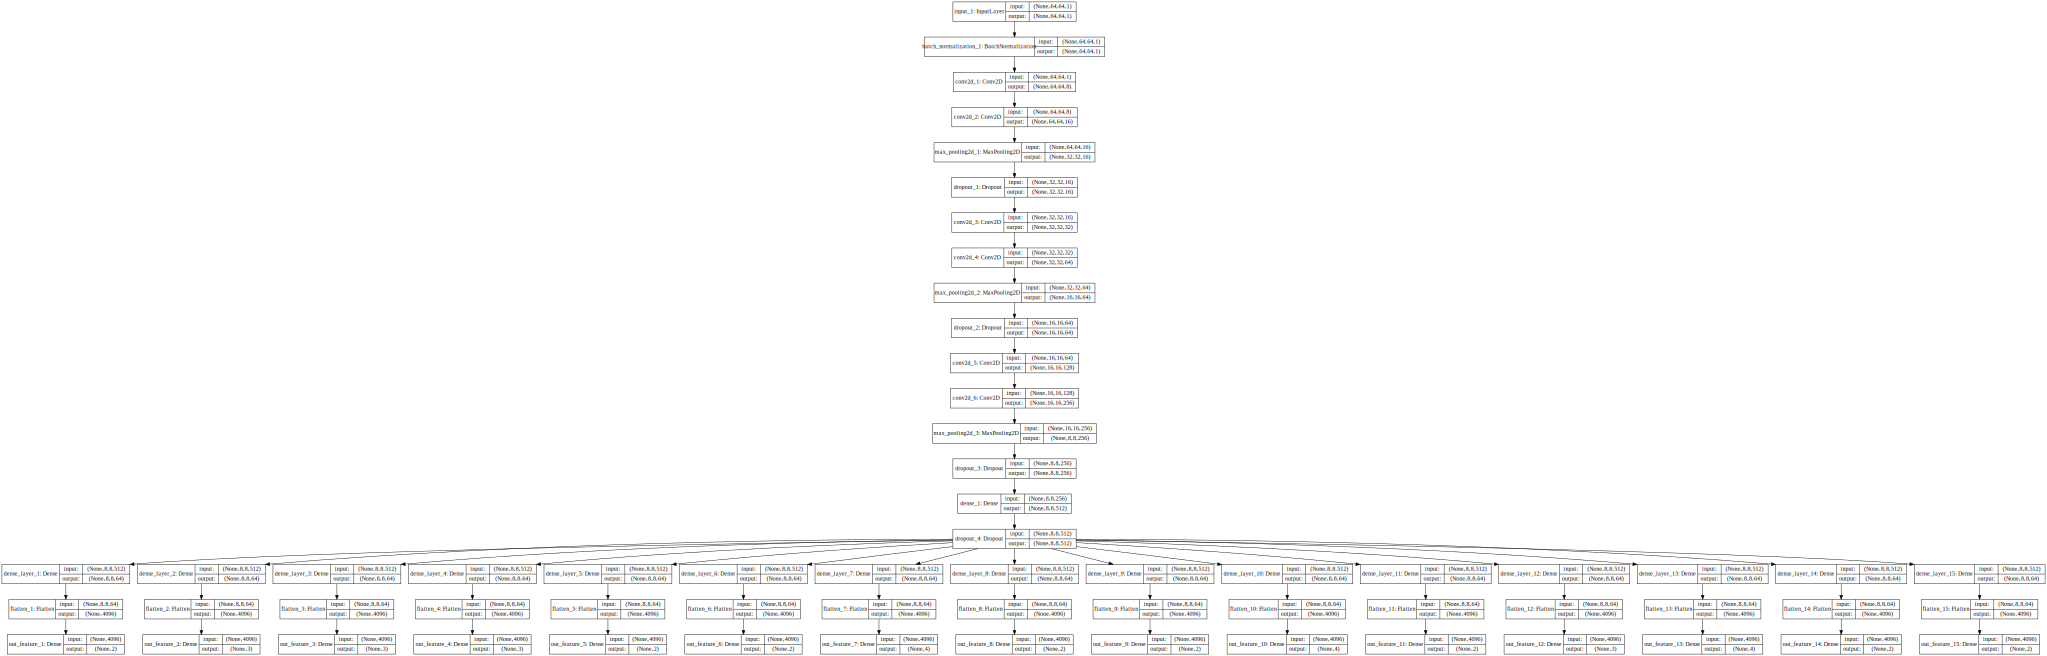

In [10]:
SVG(model_to_dot(human_features, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
feature_lengths = {}
for col in dataset_columns[1:]:
    feature_lengths[col] = len(csv_data[col].unique())
feature_lengths = list(feature_lengths.values())
feature_lengths

[2, 3, 3, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2]

In [12]:
# df_data[df_data['f8']==2]

In [13]:
# im = images[images['image'].str.match('1229b')]
# im.iloc[0]['image']

In [14]:

# stop_at = 20
# identitycounter = 1
# unique_writers = list(set(list(x[:4] for x in df_data['ImageId'])))
# for writer in unique_writers:
#     print(identitycounter*100/stop_at, end='\r')
#     writer_samples = list(images[images['image'].str.match(writer)]['image'])
# #     print('lne',len(writer_samples))
#     f,ax = plt.subplots(1,len(writer_samples))
#     f.subplots_adjust(hspace = .5, wspace=.15)
#     f.set_size_inches(15,15)
#     imgcounter = 0
#     for sample in writer_samples:
#         imagepath = os.path.join(image_path,sample)
#         raw_img = cv2.imread(imagepath)
#         if len(writer_samples)>1:
#             ax[imgcounter].imshow(raw_img)
#             ax[imgcounter].set_title(writer+'\n'+sample)
#         else:
#             ax.imshow(raw_img)
#             ax.set_title(writer+'\n'+sample)
# #         ax[imgcounter].axis('off')
#         imgcounter+=1
#         if imgcounter == stop_at:
#             break
#     imgcounter=0
#     identitycounter += 1
#     if identitycounter == stop_at+1:
#         break

In [15]:
# csv_data[csv_data['ImageId'].str.match('1302c')]

In [16]:

def datagen(batch_size,image_path,list_of_writers, vshift = (-64,64) ,vis=False):
    counter = 0
    w_ids,ids,x,y,imagenames, feature_list = [],[],[],[],[],[]
    while True:
#         counter = 0
        # for writer in unique_writers:
        #     print(identitycounter*100/stop_at, end='\r')
        
        writer_index = np.random.randint(0,len(list_of_writers))
        
#         for writer_index in writer_indexes:
#             class_vectors = []
#             features = None
        imagename = list_of_writers[writer_index]
#             print('-->',csv_data['imagename'][0],imagename)
#             display(csv_data[csv_data['imagename']==imagename].values[0][1:])
        features = csv_data[csv_data['imagename']==imagename].values
        if len(features)==0:
#             print('no features', imagename)
            continue
        features = features[0][1:]-1
#             print(features)
#             print(writer)
#             writer_samples = list(images[images['image'].str.match(writer)]['image'])
#             print('writer:',writer,', writer_samples:',writer_samples)
#             if len(writer_samples) == 0:
#                 continue
#             writer_sample_index = np.random.randint(0,len(writer_samples))

#             #     unique_writers_count[writer] = len(writer_samples)
# #             print('writer_sample_index:',writer_sample_index)
#             csv_writer = writer_samples[writer_sample_index][:5]


        loaded_image = cv2.imread(os.path.join(image_path,imagename),0)
        rand = np.random.randint(vshift[0],vshift[1])
        loaded_image_shifted=np.roll(axis=0,a=loaded_image,shift=rand)

        x.append(255.0-loaded_image_shifted.reshape((64,64,1)))
        y.append(255.0-loaded_image.reshape((64,64,1)))
        w_ids.append(imagename[:4])
        imagenames.append(imagename)
        ids.append(writer_index)
        feature_list.append(features)
#         print(imagename)
        counter+=1
#         print('counter:', counter, end='\r')
        if counter == batch_size:
            counter=0
            feature_list = np.array(feature_list)
            feature_list = feature_list.transpose()
            out_cat_features = []
            for i in range(len(feature_list)):
#                 print(feature_list[1])
                out_cat_features.append(to_categorical(feature_list[i],num_classes=feature_lengths[i]))
            if vis== True:
                yield np.array(x)/255.0,[np.array(w_ids),np.array(imagenames)]
            else:
                yield np.array(x)/255.0,out_cat_features
            w_ids,ids,x,y,imagenames,feature_list =[], [],[], [],[],[]    

In [17]:

batch_size = 64

tg = datagen(batch_size,image_path=train_path,vshift=(-10,10),list_of_writers=train_images)
vg = datagen(batch_size,image_path=val_path,vshift=(-10,10), list_of_writers=val_images)


In [18]:
# images
inputs,o = next(tg)
print(inputs.shape)
for op in o:
    print((np.argmax(op, axis=1)+1)[0])
#     print('------')
# feature_list

(64, 64, 64, 1)
2
1
2
1
2
2
3
1
1
2
1
1
1
1
1


In [19]:
csv_data[csv_data['imagename']=='0066c_num3.png'].values[0][1:]

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1], dtype=object)

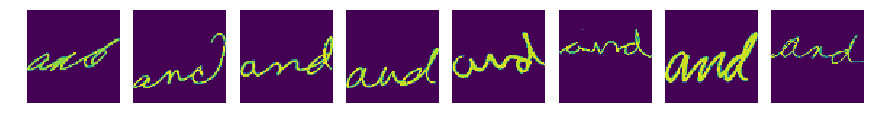

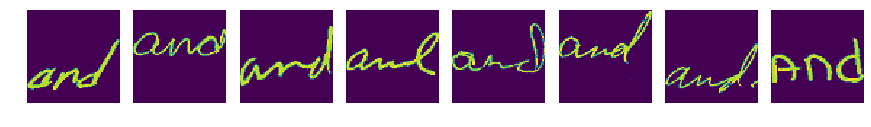

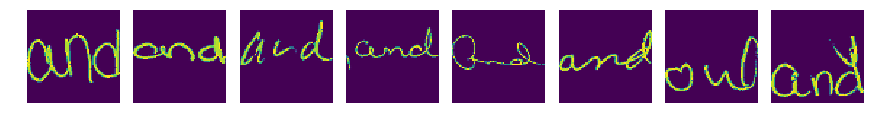

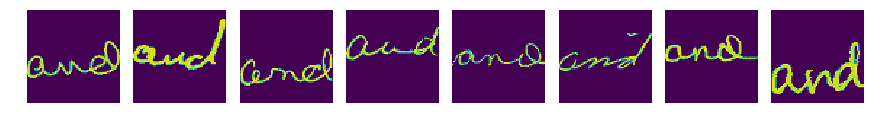

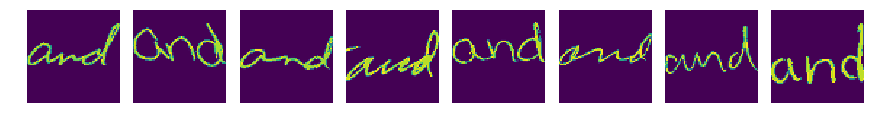

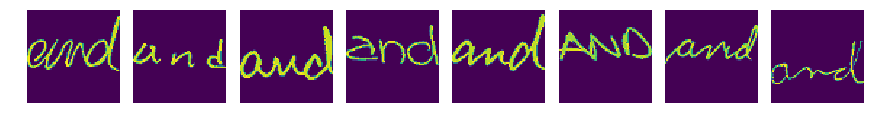

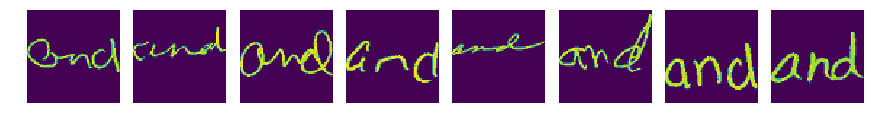

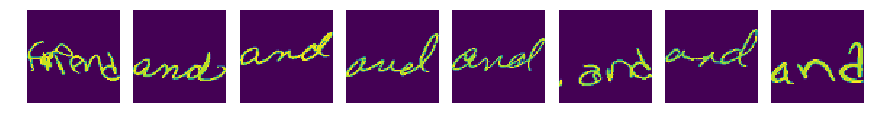

In [20]:
for r in range(8):
    f,ax = plt.subplots(1,8)
    f.subplots_adjust(hspace = .00, wspace=.15)
    f.set_size_inches(15,5)
    for c in range (8):
        ax[c].imshow(inputs[c+r*8].reshape((64,64)))
        ax[c].axis('off')

In [21]:
losses = {}
lossWeights = {}
for i in range(1,16):
    losses["out_feature_"+str(i)] = "categorical_crossentropy"
    lossWeights["out_feature_"+str(i)] = 1.0
# lossWeights["out_feature_1"] = 10.0
# lossWeights["out_feature_2"] = 8.0
# lossWeights["out_feature_3"] = 0.1
# lossWeights["out_feature_4"] = 8.0
# lossWeights["out_feature_5"] = 1.0
# lossWeights["out_feature_6"] = 5.0
# lossWeights["out_feature_7"] = 5.0
# lossWeights["out_feature_8"] = 10.0


In [22]:
mc = ModelCheckpoint(filepath='15_human_features_weights_seen_v1.h5', monitor='val_loss',period=1,save_best_only=True,save_weights_only=True,mode='auto',verbose=3)
es = EarlyStopping(patience=10000, monitor='val_loss', min_delta=0.0005, mode='auto')

In [23]:
EPOCHS = 50000
INIT_LR = 0.0001
# opt = SGD(lr=INIT_LR, decay=1e-6, momentum=0.95, nesterov=True)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
opt = Adadelta(lr=INIT_LR, decay=1e-04)

# feat_extractor.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])


human_features.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,metrics=["accuracy"])
human_features.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 1)    4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    80          batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 16)   1168        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [24]:
# human_features.load_weights('human_features_weights_v3.h5')
# inputs,o = next(vg)
# for i in range(64):
#     print(i)
#     f_probs = human_features.predict(np.expand_dims(inputs[i],0))
# #     print(f_probs)
#     for prob in f_probs:
#         print(np.argmax(prob),end=',')
#     print('++++++++++++')
human_features.load_weights('15_human_features_weights_seen_v1.h5')

In [25]:

hist = human_features.fit_generator(tg, callbacks=[mc,es]
                                    , epochs=EPOCHS
                                    , steps_per_epoch = 1
                                    , validation_data = vg
                                    , validation_steps = 1
                                    , verbose = 3
                                    
                                   )

Epoch 1/50000

Epoch 00001: val_loss improved from inf to 11.61676, saving model to 15_human_features_weights_seen_v1.h5
Epoch 2/50000

Epoch 00002: val_loss did not improve from 11.61676
Epoch 3/50000

Epoch 00003: val_loss did not improve from 11.61676
Epoch 4/50000

Epoch 00004: val_loss did not improve from 11.61676
Epoch 5/50000

Epoch 00005: val_loss did not improve from 11.61676
Epoch 6/50000

Epoch 00006: val_loss did not improve from 11.61676
Epoch 7/50000

Epoch 00007: val_loss did not improve from 11.61676
Epoch 8/50000

Epoch 00008: val_loss improved from 11.61676 to 11.53896, saving model to 15_human_features_weights_seen_v1.h5
Epoch 9/50000

Epoch 00009: val_loss improved from 11.53896 to 11.50712, saving model to 15_human_features_weights_seen_v1.h5
Epoch 10/50000

Epoch 00010: val_loss did not improve from 11.50712
Epoch 11/50000

Epoch 00011: val_loss did not improve from 11.50712
Epoch 12/50000

Epoch 00012: val_loss improved from 11.50712 to 11.45515, saving model to


Epoch 00117: val_loss did not improve from 11.36353
Epoch 118/50000

Epoch 00118: val_loss did not improve from 11.36353
Epoch 119/50000

Epoch 00119: val_loss did not improve from 11.36353
Epoch 120/50000

Epoch 00120: val_loss did not improve from 11.36353
Epoch 121/50000

Epoch 00121: val_loss did not improve from 11.36353
Epoch 122/50000

Epoch 00122: val_loss did not improve from 11.36353
Epoch 123/50000

Epoch 00123: val_loss did not improve from 11.36353
Epoch 124/50000

Epoch 00124: val_loss did not improve from 11.36353
Epoch 125/50000

Epoch 00125: val_loss did not improve from 11.36353
Epoch 126/50000

Epoch 00126: val_loss did not improve from 11.36353
Epoch 127/50000

Epoch 00127: val_loss did not improve from 11.36353
Epoch 128/50000

Epoch 00128: val_loss did not improve from 11.36353
Epoch 129/50000

Epoch 00129: val_loss did not improve from 11.36353
Epoch 130/50000

Epoch 00130: val_loss did not improve from 11.36353
Epoch 131/50000

Epoch 00131: val_loss did not imp


Epoch 00236: val_loss improved from 11.36353 to 11.35886, saving model to 15_human_features_weights_seen_v1.h5
Epoch 237/50000

Epoch 00237: val_loss did not improve from 11.35886
Epoch 238/50000

Epoch 00238: val_loss did not improve from 11.35886
Epoch 239/50000

Epoch 00239: val_loss did not improve from 11.35886
Epoch 240/50000

Epoch 00240: val_loss did not improve from 11.35886
Epoch 241/50000

Epoch 00241: val_loss did not improve from 11.35886
Epoch 242/50000

Epoch 00242: val_loss did not improve from 11.35886
Epoch 243/50000

Epoch 00243: val_loss did not improve from 11.35886
Epoch 244/50000

Epoch 00244: val_loss did not improve from 11.35886
Epoch 245/50000

Epoch 00245: val_loss did not improve from 11.35886
Epoch 246/50000

Epoch 00246: val_loss did not improve from 11.35886
Epoch 247/50000

Epoch 00247: val_loss did not improve from 11.35886
Epoch 248/50000

Epoch 00248: val_loss did not improve from 11.35886
Epoch 249/50000

Epoch 00249: val_loss did not improve from 


Epoch 00354: val_loss did not improve from 11.32528
Epoch 355/50000

Epoch 00355: val_loss did not improve from 11.32528
Epoch 356/50000

Epoch 00356: val_loss did not improve from 11.32528
Epoch 357/50000

Epoch 00357: val_loss did not improve from 11.32528
Epoch 358/50000

Epoch 00358: val_loss did not improve from 11.32528
Epoch 359/50000

Epoch 00359: val_loss did not improve from 11.32528
Epoch 360/50000

Epoch 00360: val_loss did not improve from 11.32528
Epoch 361/50000

Epoch 00361: val_loss did not improve from 11.32528
Epoch 362/50000

Epoch 00362: val_loss did not improve from 11.32528
Epoch 363/50000

Epoch 00363: val_loss did not improve from 11.32528
Epoch 364/50000

Epoch 00364: val_loss did not improve from 11.32528
Epoch 365/50000

Epoch 00365: val_loss did not improve from 11.32528
Epoch 366/50000

Epoch 00366: val_loss did not improve from 11.32528
Epoch 367/50000

Epoch 00367: val_loss did not improve from 11.32528
Epoch 368/50000

Epoch 00368: val_loss improved fr


Epoch 00472: val_loss did not improve from 11.28562
Epoch 473/50000

Epoch 00473: val_loss did not improve from 11.28562
Epoch 474/50000

Epoch 00474: val_loss did not improve from 11.28562
Epoch 475/50000

Epoch 00475: val_loss did not improve from 11.28562
Epoch 476/50000

Epoch 00476: val_loss did not improve from 11.28562
Epoch 477/50000

Epoch 00477: val_loss did not improve from 11.28562
Epoch 478/50000

Epoch 00478: val_loss did not improve from 11.28562
Epoch 479/50000

Epoch 00479: val_loss did not improve from 11.28562
Epoch 480/50000

Epoch 00480: val_loss did not improve from 11.28562
Epoch 481/50000

Epoch 00481: val_loss did not improve from 11.28562
Epoch 482/50000

Epoch 00482: val_loss did not improve from 11.28562
Epoch 483/50000

Epoch 00483: val_loss did not improve from 11.28562
Epoch 484/50000

Epoch 00484: val_loss did not improve from 11.28562
Epoch 485/50000

Epoch 00485: val_loss did not improve from 11.28562
Epoch 486/50000

Epoch 00486: val_loss did not imp


Epoch 00591: val_loss did not improve from 11.28562
Epoch 592/50000

Epoch 00592: val_loss did not improve from 11.28562
Epoch 593/50000

Epoch 00593: val_loss did not improve from 11.28562
Epoch 594/50000

Epoch 00594: val_loss did not improve from 11.28562
Epoch 595/50000

Epoch 00595: val_loss did not improve from 11.28562
Epoch 596/50000

Epoch 00596: val_loss did not improve from 11.28562
Epoch 597/50000

Epoch 00597: val_loss did not improve from 11.28562
Epoch 598/50000

Epoch 00598: val_loss did not improve from 11.28562
Epoch 599/50000

Epoch 00599: val_loss did not improve from 11.28562
Epoch 600/50000

Epoch 00600: val_loss did not improve from 11.28562
Epoch 601/50000

Epoch 00601: val_loss did not improve from 11.28562
Epoch 602/50000

Epoch 00602: val_loss did not improve from 11.28562
Epoch 603/50000

Epoch 00603: val_loss did not improve from 11.28562
Epoch 604/50000

Epoch 00604: val_loss did not improve from 11.28562
Epoch 605/50000

Epoch 00605: val_loss did not imp


Epoch 00710: val_loss did not improve from 11.28562
Epoch 711/50000

Epoch 00711: val_loss did not improve from 11.28562
Epoch 712/50000

Epoch 00712: val_loss did not improve from 11.28562
Epoch 713/50000

Epoch 00713: val_loss did not improve from 11.28562
Epoch 714/50000

Epoch 00714: val_loss did not improve from 11.28562
Epoch 715/50000

Epoch 00715: val_loss did not improve from 11.28562
Epoch 716/50000

Epoch 00716: val_loss did not improve from 11.28562
Epoch 717/50000

Epoch 00717: val_loss did not improve from 11.28562
Epoch 718/50000

Epoch 00718: val_loss did not improve from 11.28562
Epoch 719/50000

Epoch 00719: val_loss did not improve from 11.28562
Epoch 720/50000

Epoch 00720: val_loss did not improve from 11.28562
Epoch 721/50000

Epoch 00721: val_loss did not improve from 11.28562
Epoch 722/50000

Epoch 00722: val_loss did not improve from 11.28562
Epoch 723/50000

Epoch 00723: val_loss did not improve from 11.28562
Epoch 724/50000

Epoch 00724: val_loss did not imp


Epoch 00829: val_loss did not improve from 11.28562
Epoch 830/50000

Epoch 00830: val_loss did not improve from 11.28562
Epoch 831/50000

Epoch 00831: val_loss did not improve from 11.28562
Epoch 832/50000

Epoch 00832: val_loss did not improve from 11.28562
Epoch 833/50000

Epoch 00833: val_loss did not improve from 11.28562
Epoch 834/50000

Epoch 00834: val_loss did not improve from 11.28562
Epoch 835/50000

Epoch 00835: val_loss did not improve from 11.28562
Epoch 836/50000

Epoch 00836: val_loss did not improve from 11.28562
Epoch 837/50000

Epoch 00837: val_loss did not improve from 11.28562
Epoch 838/50000

Epoch 00838: val_loss did not improve from 11.28562
Epoch 839/50000

Epoch 00839: val_loss did not improve from 11.28562
Epoch 840/50000

Epoch 00840: val_loss did not improve from 11.28562
Epoch 841/50000

Epoch 00841: val_loss did not improve from 11.28562
Epoch 842/50000

Epoch 00842: val_loss did not improve from 11.28562
Epoch 843/50000

Epoch 00843: val_loss did not imp


Epoch 00948: val_loss did not improve from 11.28562
Epoch 949/50000

Epoch 00949: val_loss did not improve from 11.28562
Epoch 950/50000

Epoch 00950: val_loss did not improve from 11.28562
Epoch 951/50000

Epoch 00951: val_loss did not improve from 11.28562
Epoch 952/50000

Epoch 00952: val_loss did not improve from 11.28562
Epoch 953/50000

Epoch 00953: val_loss did not improve from 11.28562
Epoch 954/50000

Epoch 00954: val_loss did not improve from 11.28562
Epoch 955/50000

Epoch 00955: val_loss did not improve from 11.28562
Epoch 956/50000

Epoch 00956: val_loss did not improve from 11.28562
Epoch 957/50000

Epoch 00957: val_loss did not improve from 11.28562
Epoch 958/50000

Epoch 00958: val_loss did not improve from 11.28562
Epoch 959/50000

Epoch 00959: val_loss did not improve from 11.28562
Epoch 960/50000

Epoch 00960: val_loss did not improve from 11.28562
Epoch 961/50000

Epoch 00961: val_loss did not improve from 11.28562
Epoch 962/50000

Epoch 00962: val_loss did not imp


Epoch 01066: val_loss did not improve from 11.28562
Epoch 1067/50000

Epoch 01067: val_loss did not improve from 11.28562
Epoch 1068/50000

Epoch 01068: val_loss did not improve from 11.28562
Epoch 1069/50000

Epoch 01069: val_loss did not improve from 11.28562
Epoch 1070/50000

Epoch 01070: val_loss did not improve from 11.28562
Epoch 1071/50000

Epoch 01071: val_loss did not improve from 11.28562
Epoch 1072/50000

Epoch 01072: val_loss did not improve from 11.28562
Epoch 1073/50000

Epoch 01073: val_loss did not improve from 11.28562
Epoch 1074/50000

Epoch 01074: val_loss did not improve from 11.28562
Epoch 1075/50000

Epoch 01075: val_loss did not improve from 11.28562
Epoch 1076/50000

Epoch 01076: val_loss did not improve from 11.28562
Epoch 1077/50000

Epoch 01077: val_loss did not improve from 11.28562
Epoch 1078/50000

Epoch 01078: val_loss did not improve from 11.28562
Epoch 1079/50000

Epoch 01079: val_loss did not improve from 11.28562
Epoch 1080/50000

Epoch 01080: val_lo


Epoch 01184: val_loss did not improve from 11.28562
Epoch 1185/50000

Epoch 01185: val_loss did not improve from 11.28562
Epoch 1186/50000

Epoch 01186: val_loss did not improve from 11.28562
Epoch 1187/50000

Epoch 01187: val_loss did not improve from 11.28562
Epoch 1188/50000

Epoch 01188: val_loss did not improve from 11.28562
Epoch 1189/50000

Epoch 01189: val_loss did not improve from 11.28562
Epoch 1190/50000

Epoch 01190: val_loss did not improve from 11.28562
Epoch 1191/50000

Epoch 01191: val_loss did not improve from 11.28562
Epoch 1192/50000

Epoch 01192: val_loss did not improve from 11.28562
Epoch 1193/50000

Epoch 01193: val_loss did not improve from 11.28562
Epoch 1194/50000

Epoch 01194: val_loss did not improve from 11.28562
Epoch 1195/50000

Epoch 01195: val_loss did not improve from 11.28562
Epoch 1196/50000

Epoch 01196: val_loss did not improve from 11.28562
Epoch 1197/50000

Epoch 01197: val_loss did not improve from 11.28562
Epoch 1198/50000

Epoch 01198: val_lo


Epoch 01302: val_loss did not improve from 11.28562
Epoch 1303/50000

Epoch 01303: val_loss did not improve from 11.28562
Epoch 1304/50000

Epoch 01304: val_loss did not improve from 11.28562
Epoch 1305/50000

Epoch 01305: val_loss did not improve from 11.28562
Epoch 1306/50000

Epoch 01306: val_loss did not improve from 11.28562
Epoch 1307/50000

Epoch 01307: val_loss did not improve from 11.28562
Epoch 1308/50000

Epoch 01308: val_loss did not improve from 11.28562
Epoch 1309/50000

Epoch 01309: val_loss did not improve from 11.28562
Epoch 1310/50000

Epoch 01310: val_loss did not improve from 11.28562
Epoch 1311/50000

Epoch 01311: val_loss did not improve from 11.28562
Epoch 1312/50000

Epoch 01312: val_loss did not improve from 11.28562
Epoch 1313/50000

Epoch 01313: val_loss did not improve from 11.28562
Epoch 1314/50000

Epoch 01314: val_loss did not improve from 11.28562
Epoch 1315/50000

Epoch 01315: val_loss did not improve from 11.28562
Epoch 1316/50000

Epoch 01316: val_lo


Epoch 01419: val_loss did not improve from 11.27229
Epoch 1420/50000

Epoch 01420: val_loss did not improve from 11.27229
Epoch 1421/50000

Epoch 01421: val_loss did not improve from 11.27229
Epoch 1422/50000

Epoch 01422: val_loss did not improve from 11.27229
Epoch 1423/50000

Epoch 01423: val_loss did not improve from 11.27229
Epoch 1424/50000

Epoch 01424: val_loss did not improve from 11.27229
Epoch 1425/50000

Epoch 01425: val_loss did not improve from 11.27229
Epoch 1426/50000

Epoch 01426: val_loss did not improve from 11.27229
Epoch 1427/50000

Epoch 01427: val_loss did not improve from 11.27229
Epoch 1428/50000

Epoch 01428: val_loss did not improve from 11.27229
Epoch 1429/50000

Epoch 01429: val_loss did not improve from 11.27229
Epoch 1430/50000

Epoch 01430: val_loss did not improve from 11.27229
Epoch 1431/50000

Epoch 01431: val_loss did not improve from 11.27229
Epoch 1432/50000

Epoch 01432: val_loss did not improve from 11.27229
Epoch 1433/50000

Epoch 01433: val_lo


Epoch 01537: val_loss did not improve from 11.27229
Epoch 1538/50000

Epoch 01538: val_loss did not improve from 11.27229
Epoch 1539/50000

Epoch 01539: val_loss did not improve from 11.27229
Epoch 1540/50000

Epoch 01540: val_loss did not improve from 11.27229
Epoch 1541/50000

Epoch 01541: val_loss did not improve from 11.27229
Epoch 1542/50000

Epoch 01542: val_loss did not improve from 11.27229
Epoch 1543/50000

Epoch 01543: val_loss did not improve from 11.27229
Epoch 1544/50000

Epoch 01544: val_loss did not improve from 11.27229
Epoch 1545/50000

Epoch 01545: val_loss did not improve from 11.27229
Epoch 1546/50000

Epoch 01546: val_loss did not improve from 11.27229
Epoch 1547/50000

Epoch 01547: val_loss did not improve from 11.27229
Epoch 1548/50000

Epoch 01548: val_loss did not improve from 11.27229
Epoch 1549/50000

Epoch 01549: val_loss did not improve from 11.27229
Epoch 1550/50000

Epoch 01550: val_loss did not improve from 11.27229
Epoch 1551/50000

Epoch 01551: val_lo


Epoch 01655: val_loss did not improve from 11.27229
Epoch 1656/50000

Epoch 01656: val_loss did not improve from 11.27229
Epoch 1657/50000

Epoch 01657: val_loss did not improve from 11.27229
Epoch 1658/50000

Epoch 01658: val_loss did not improve from 11.27229
Epoch 1659/50000

Epoch 01659: val_loss did not improve from 11.27229
Epoch 1660/50000

Epoch 01660: val_loss did not improve from 11.27229
Epoch 1661/50000

Epoch 01661: val_loss did not improve from 11.27229
Epoch 1662/50000

Epoch 01662: val_loss did not improve from 11.27229
Epoch 1663/50000

Epoch 01663: val_loss did not improve from 11.27229
Epoch 1664/50000

Epoch 01664: val_loss did not improve from 11.27229
Epoch 1665/50000

Epoch 01665: val_loss did not improve from 11.27229
Epoch 1666/50000

Epoch 01666: val_loss did not improve from 11.27229
Epoch 1667/50000

Epoch 01667: val_loss did not improve from 11.27229
Epoch 1668/50000

Epoch 01668: val_loss did not improve from 11.27229
Epoch 1669/50000

Epoch 01669: val_lo


Epoch 01773: val_loss did not improve from 11.27229
Epoch 1774/50000

Epoch 01774: val_loss did not improve from 11.27229
Epoch 1775/50000

Epoch 01775: val_loss did not improve from 11.27229
Epoch 1776/50000

Epoch 01776: val_loss did not improve from 11.27229
Epoch 1777/50000

Epoch 01777: val_loss did not improve from 11.27229
Epoch 1778/50000

Epoch 01778: val_loss did not improve from 11.27229
Epoch 1779/50000

Epoch 01779: val_loss did not improve from 11.27229
Epoch 1780/50000

Epoch 01780: val_loss did not improve from 11.27229
Epoch 1781/50000

Epoch 01781: val_loss did not improve from 11.27229
Epoch 1782/50000

Epoch 01782: val_loss did not improve from 11.27229
Epoch 1783/50000

Epoch 01783: val_loss did not improve from 11.27229
Epoch 1784/50000

Epoch 01784: val_loss did not improve from 11.27229
Epoch 1785/50000

Epoch 01785: val_loss did not improve from 11.27229
Epoch 1786/50000

Epoch 01786: val_loss did not improve from 11.27229
Epoch 1787/50000

Epoch 01787: val_lo


Epoch 01891: val_loss did not improve from 11.27229
Epoch 1892/50000

Epoch 01892: val_loss did not improve from 11.27229
Epoch 1893/50000

Epoch 01893: val_loss did not improve from 11.27229
Epoch 1894/50000

Epoch 01894: val_loss did not improve from 11.27229
Epoch 1895/50000

Epoch 01895: val_loss did not improve from 11.27229
Epoch 1896/50000

Epoch 01896: val_loss did not improve from 11.27229
Epoch 1897/50000

Epoch 01897: val_loss did not improve from 11.27229
Epoch 1898/50000

Epoch 01898: val_loss did not improve from 11.27229
Epoch 1899/50000

Epoch 01899: val_loss did not improve from 11.27229
Epoch 1900/50000

Epoch 01900: val_loss did not improve from 11.27229
Epoch 1901/50000

Epoch 01901: val_loss did not improve from 11.27229
Epoch 1902/50000

Epoch 01902: val_loss did not improve from 11.27229
Epoch 1903/50000

Epoch 01903: val_loss did not improve from 11.27229
Epoch 1904/50000

Epoch 01904: val_loss did not improve from 11.27229
Epoch 1905/50000

Epoch 01905: val_lo


Epoch 02009: val_loss did not improve from 11.27229
Epoch 2010/50000

Epoch 02010: val_loss did not improve from 11.27229
Epoch 2011/50000

Epoch 02011: val_loss did not improve from 11.27229
Epoch 2012/50000

Epoch 02012: val_loss did not improve from 11.27229
Epoch 2013/50000

Epoch 02013: val_loss did not improve from 11.27229
Epoch 2014/50000

Epoch 02014: val_loss did not improve from 11.27229
Epoch 2015/50000

Epoch 02015: val_loss did not improve from 11.27229
Epoch 2016/50000

Epoch 02016: val_loss did not improve from 11.27229
Epoch 2017/50000

Epoch 02017: val_loss did not improve from 11.27229
Epoch 2018/50000

Epoch 02018: val_loss did not improve from 11.27229
Epoch 2019/50000

Epoch 02019: val_loss did not improve from 11.27229
Epoch 2020/50000

Epoch 02020: val_loss did not improve from 11.27229
Epoch 2021/50000

Epoch 02021: val_loss did not improve from 11.27229
Epoch 2022/50000

Epoch 02022: val_loss did not improve from 11.27229
Epoch 2023/50000

Epoch 02023: val_lo


Epoch 02127: val_loss did not improve from 11.27229
Epoch 2128/50000

Epoch 02128: val_loss did not improve from 11.27229
Epoch 2129/50000

Epoch 02129: val_loss did not improve from 11.27229
Epoch 2130/50000

Epoch 02130: val_loss did not improve from 11.27229
Epoch 2131/50000

Epoch 02131: val_loss did not improve from 11.27229
Epoch 2132/50000

Epoch 02132: val_loss did not improve from 11.27229
Epoch 2133/50000

Epoch 02133: val_loss did not improve from 11.27229
Epoch 2134/50000

Epoch 02134: val_loss did not improve from 11.27229
Epoch 2135/50000

Epoch 02135: val_loss did not improve from 11.27229
Epoch 2136/50000

Epoch 02136: val_loss did not improve from 11.27229
Epoch 2137/50000

Epoch 02137: val_loss did not improve from 11.27229
Epoch 2138/50000

Epoch 02138: val_loss did not improve from 11.27229
Epoch 2139/50000

Epoch 02139: val_loss did not improve from 11.27229
Epoch 2140/50000

Epoch 02140: val_loss did not improve from 11.27229
Epoch 2141/50000

Epoch 02141: val_lo


Epoch 02245: val_loss did not improve from 11.27229
Epoch 2246/50000

Epoch 02246: val_loss did not improve from 11.27229
Epoch 2247/50000

Epoch 02247: val_loss did not improve from 11.27229
Epoch 2248/50000

Epoch 02248: val_loss did not improve from 11.27229
Epoch 2249/50000

Epoch 02249: val_loss did not improve from 11.27229
Epoch 2250/50000

Epoch 02250: val_loss did not improve from 11.27229
Epoch 2251/50000

Epoch 02251: val_loss did not improve from 11.27229
Epoch 2252/50000

Epoch 02252: val_loss did not improve from 11.27229
Epoch 2253/50000

Epoch 02253: val_loss did not improve from 11.27229
Epoch 2254/50000

Epoch 02254: val_loss did not improve from 11.27229
Epoch 2255/50000

Epoch 02255: val_loss did not improve from 11.27229
Epoch 2256/50000

Epoch 02256: val_loss did not improve from 11.27229
Epoch 2257/50000

Epoch 02257: val_loss did not improve from 11.27229
Epoch 2258/50000

Epoch 02258: val_loss did not improve from 11.27229
Epoch 2259/50000

Epoch 02259: val_lo


Epoch 02363: val_loss did not improve from 11.27229
Epoch 2364/50000

Epoch 02364: val_loss did not improve from 11.27229
Epoch 2365/50000

Epoch 02365: val_loss did not improve from 11.27229
Epoch 2366/50000

Epoch 02366: val_loss did not improve from 11.27229
Epoch 2367/50000

Epoch 02367: val_loss did not improve from 11.27229
Epoch 2368/50000

Epoch 02368: val_loss did not improve from 11.27229
Epoch 2369/50000

Epoch 02369: val_loss did not improve from 11.27229
Epoch 2370/50000

Epoch 02370: val_loss did not improve from 11.27229
Epoch 2371/50000

Epoch 02371: val_loss did not improve from 11.27229
Epoch 2372/50000

Epoch 02372: val_loss did not improve from 11.27229
Epoch 2373/50000

Epoch 02373: val_loss did not improve from 11.27229
Epoch 2374/50000

Epoch 02374: val_loss did not improve from 11.27229
Epoch 2375/50000

Epoch 02375: val_loss did not improve from 11.27229
Epoch 2376/50000

Epoch 02376: val_loss did not improve from 11.27229
Epoch 2377/50000

Epoch 02377: val_lo


Epoch 02480: val_loss did not improve from 11.26783
Epoch 2481/50000

Epoch 02481: val_loss did not improve from 11.26783
Epoch 2482/50000

Epoch 02482: val_loss did not improve from 11.26783
Epoch 2483/50000

Epoch 02483: val_loss did not improve from 11.26783
Epoch 2484/50000

Epoch 02484: val_loss did not improve from 11.26783
Epoch 2485/50000

Epoch 02485: val_loss did not improve from 11.26783
Epoch 2486/50000

Epoch 02486: val_loss did not improve from 11.26783
Epoch 2487/50000

Epoch 02487: val_loss did not improve from 11.26783
Epoch 2488/50000

Epoch 02488: val_loss did not improve from 11.26783
Epoch 2489/50000

Epoch 02489: val_loss did not improve from 11.26783
Epoch 2490/50000

Epoch 02490: val_loss did not improve from 11.26783
Epoch 2491/50000

Epoch 02491: val_loss did not improve from 11.26783
Epoch 2492/50000

Epoch 02492: val_loss did not improve from 11.26783
Epoch 2493/50000

Epoch 02493: val_loss did not improve from 11.26783
Epoch 2494/50000

Epoch 02494: val_lo


Epoch 02598: val_loss did not improve from 11.26783
Epoch 2599/50000

Epoch 02599: val_loss did not improve from 11.26783
Epoch 2600/50000

Epoch 02600: val_loss did not improve from 11.26783
Epoch 2601/50000

Epoch 02601: val_loss did not improve from 11.26783
Epoch 2602/50000

Epoch 02602: val_loss did not improve from 11.26783
Epoch 2603/50000

Epoch 02603: val_loss did not improve from 11.26783
Epoch 2604/50000

Epoch 02604: val_loss did not improve from 11.26783
Epoch 2605/50000

Epoch 02605: val_loss did not improve from 11.26783
Epoch 2606/50000

Epoch 02606: val_loss did not improve from 11.26783
Epoch 2607/50000

Epoch 02607: val_loss did not improve from 11.26783
Epoch 2608/50000

Epoch 02608: val_loss did not improve from 11.26783
Epoch 2609/50000

Epoch 02609: val_loss did not improve from 11.26783
Epoch 2610/50000

Epoch 02610: val_loss did not improve from 11.26783
Epoch 2611/50000

Epoch 02611: val_loss did not improve from 11.26783
Epoch 2612/50000

Epoch 02612: val_lo


Epoch 02716: val_loss did not improve from 11.26783
Epoch 2717/50000

Epoch 02717: val_loss did not improve from 11.26783
Epoch 2718/50000

Epoch 02718: val_loss did not improve from 11.26783
Epoch 2719/50000

Epoch 02719: val_loss did not improve from 11.26783
Epoch 2720/50000

Epoch 02720: val_loss did not improve from 11.26783
Epoch 2721/50000

Epoch 02721: val_loss did not improve from 11.26783
Epoch 2722/50000

Epoch 02722: val_loss did not improve from 11.26783
Epoch 2723/50000

Epoch 02723: val_loss did not improve from 11.26783
Epoch 2724/50000

Epoch 02724: val_loss did not improve from 11.26783
Epoch 2725/50000

Epoch 02725: val_loss did not improve from 11.26783
Epoch 2726/50000

Epoch 02726: val_loss did not improve from 11.26783
Epoch 2727/50000

Epoch 02727: val_loss did not improve from 11.26783
Epoch 2728/50000

Epoch 02728: val_loss did not improve from 11.26783
Epoch 2729/50000

Epoch 02729: val_loss did not improve from 11.26783
Epoch 2730/50000

Epoch 02730: val_lo


Epoch 02833: val_loss did not improve from 11.24100
Epoch 2834/50000

Epoch 02834: val_loss did not improve from 11.24100
Epoch 2835/50000

Epoch 02835: val_loss did not improve from 11.24100
Epoch 2836/50000

Epoch 02836: val_loss did not improve from 11.24100
Epoch 2837/50000

Epoch 02837: val_loss did not improve from 11.24100
Epoch 2838/50000

Epoch 02838: val_loss did not improve from 11.24100
Epoch 2839/50000

Epoch 02839: val_loss did not improve from 11.24100
Epoch 2840/50000

Epoch 02840: val_loss did not improve from 11.24100
Epoch 2841/50000

Epoch 02841: val_loss did not improve from 11.24100
Epoch 2842/50000

Epoch 02842: val_loss did not improve from 11.24100
Epoch 2843/50000

Epoch 02843: val_loss did not improve from 11.24100
Epoch 2844/50000

Epoch 02844: val_loss did not improve from 11.24100
Epoch 2845/50000

Epoch 02845: val_loss did not improve from 11.24100
Epoch 2846/50000

Epoch 02846: val_loss did not improve from 11.24100
Epoch 2847/50000

Epoch 02847: val_lo


Epoch 02951: val_loss did not improve from 11.24100
Epoch 2952/50000

Epoch 02952: val_loss did not improve from 11.24100
Epoch 2953/50000

Epoch 02953: val_loss did not improve from 11.24100
Epoch 2954/50000

Epoch 02954: val_loss did not improve from 11.24100
Epoch 2955/50000

Epoch 02955: val_loss did not improve from 11.24100
Epoch 2956/50000

Epoch 02956: val_loss did not improve from 11.24100
Epoch 2957/50000

Epoch 02957: val_loss did not improve from 11.24100
Epoch 2958/50000

Epoch 02958: val_loss did not improve from 11.24100
Epoch 2959/50000

Epoch 02959: val_loss did not improve from 11.24100
Epoch 2960/50000

Epoch 02960: val_loss did not improve from 11.24100
Epoch 2961/50000

Epoch 02961: val_loss did not improve from 11.24100
Epoch 2962/50000

Epoch 02962: val_loss did not improve from 11.24100
Epoch 2963/50000

Epoch 02963: val_loss did not improve from 11.24100
Epoch 2964/50000

Epoch 02964: val_loss did not improve from 11.24100
Epoch 2965/50000

Epoch 02965: val_lo


Epoch 03069: val_loss did not improve from 11.24100
Epoch 3070/50000

Epoch 03070: val_loss did not improve from 11.24100
Epoch 3071/50000

Epoch 03071: val_loss did not improve from 11.24100
Epoch 3072/50000

Epoch 03072: val_loss did not improve from 11.24100
Epoch 3073/50000

Epoch 03073: val_loss did not improve from 11.24100
Epoch 3074/50000

Epoch 03074: val_loss did not improve from 11.24100
Epoch 3075/50000

Epoch 03075: val_loss did not improve from 11.24100
Epoch 3076/50000

Epoch 03076: val_loss did not improve from 11.24100
Epoch 3077/50000

Epoch 03077: val_loss did not improve from 11.24100
Epoch 3078/50000

Epoch 03078: val_loss did not improve from 11.24100
Epoch 3079/50000

Epoch 03079: val_loss did not improve from 11.24100
Epoch 3080/50000

Epoch 03080: val_loss did not improve from 11.24100
Epoch 3081/50000

Epoch 03081: val_loss did not improve from 11.24100
Epoch 3082/50000

Epoch 03082: val_loss did not improve from 11.24100
Epoch 3083/50000

Epoch 03083: val_lo


Epoch 03187: val_loss did not improve from 11.24100
Epoch 3188/50000

Epoch 03188: val_loss did not improve from 11.24100
Epoch 3189/50000

Epoch 03189: val_loss did not improve from 11.24100
Epoch 3190/50000

Epoch 03190: val_loss did not improve from 11.24100
Epoch 3191/50000

Epoch 03191: val_loss did not improve from 11.24100
Epoch 3192/50000

Epoch 03192: val_loss did not improve from 11.24100
Epoch 3193/50000

Epoch 03193: val_loss did not improve from 11.24100
Epoch 3194/50000

Epoch 03194: val_loss did not improve from 11.24100
Epoch 3195/50000

Epoch 03195: val_loss did not improve from 11.24100
Epoch 3196/50000

Epoch 03196: val_loss did not improve from 11.24100
Epoch 3197/50000

Epoch 03197: val_loss did not improve from 11.24100
Epoch 3198/50000

Epoch 03198: val_loss did not improve from 11.24100
Epoch 3199/50000

Epoch 03199: val_loss did not improve from 11.24100
Epoch 3200/50000

Epoch 03200: val_loss did not improve from 11.24100
Epoch 3201/50000

Epoch 03201: val_lo


Epoch 03305: val_loss did not improve from 11.24100
Epoch 3306/50000

Epoch 03306: val_loss did not improve from 11.24100
Epoch 3307/50000

Epoch 03307: val_loss did not improve from 11.24100
Epoch 3308/50000

Epoch 03308: val_loss did not improve from 11.24100
Epoch 3309/50000

Epoch 03309: val_loss did not improve from 11.24100
Epoch 3310/50000

Epoch 03310: val_loss did not improve from 11.24100
Epoch 3311/50000

Epoch 03311: val_loss did not improve from 11.24100
Epoch 3312/50000

Epoch 03312: val_loss did not improve from 11.24100
Epoch 3313/50000

Epoch 03313: val_loss did not improve from 11.24100
Epoch 3314/50000

Epoch 03314: val_loss did not improve from 11.24100
Epoch 3315/50000

Epoch 03315: val_loss did not improve from 11.24100
Epoch 3316/50000

Epoch 03316: val_loss did not improve from 11.24100
Epoch 3317/50000

Epoch 03317: val_loss did not improve from 11.24100
Epoch 3318/50000

Epoch 03318: val_loss did not improve from 11.24100
Epoch 3319/50000

Epoch 03319: val_lo


Epoch 03423: val_loss did not improve from 11.24100
Epoch 3424/50000

Epoch 03424: val_loss did not improve from 11.24100
Epoch 3425/50000

Epoch 03425: val_loss did not improve from 11.24100
Epoch 3426/50000

Epoch 03426: val_loss did not improve from 11.24100
Epoch 3427/50000

Epoch 03427: val_loss did not improve from 11.24100
Epoch 3428/50000

Epoch 03428: val_loss did not improve from 11.24100
Epoch 3429/50000

Epoch 03429: val_loss did not improve from 11.24100
Epoch 3430/50000

Epoch 03430: val_loss did not improve from 11.24100
Epoch 3431/50000

Epoch 03431: val_loss did not improve from 11.24100
Epoch 3432/50000

Epoch 03432: val_loss did not improve from 11.24100
Epoch 3433/50000

Epoch 03433: val_loss did not improve from 11.24100
Epoch 3434/50000

Epoch 03434: val_loss did not improve from 11.24100
Epoch 3435/50000

Epoch 03435: val_loss did not improve from 11.24100
Epoch 3436/50000

Epoch 03436: val_loss did not improve from 11.24100
Epoch 3437/50000

Epoch 03437: val_lo


Epoch 03541: val_loss did not improve from 11.24100
Epoch 3542/50000

Epoch 03542: val_loss did not improve from 11.24100
Epoch 3543/50000

Epoch 03543: val_loss did not improve from 11.24100
Epoch 3544/50000

Epoch 03544: val_loss did not improve from 11.24100
Epoch 3545/50000

Epoch 03545: val_loss did not improve from 11.24100
Epoch 3546/50000

Epoch 03546: val_loss did not improve from 11.24100
Epoch 3547/50000

Epoch 03547: val_loss did not improve from 11.24100
Epoch 3548/50000

Epoch 03548: val_loss did not improve from 11.24100
Epoch 3549/50000

Epoch 03549: val_loss did not improve from 11.24100
Epoch 3550/50000

Epoch 03550: val_loss did not improve from 11.24100
Epoch 3551/50000

Epoch 03551: val_loss did not improve from 11.24100
Epoch 3552/50000

Epoch 03552: val_loss did not improve from 11.24100
Epoch 3553/50000

Epoch 03553: val_loss did not improve from 11.24100
Epoch 3554/50000

Epoch 03554: val_loss did not improve from 11.24100
Epoch 3555/50000

Epoch 03555: val_lo


Epoch 03659: val_loss did not improve from 11.24100
Epoch 3660/50000

Epoch 03660: val_loss did not improve from 11.24100
Epoch 3661/50000

Epoch 03661: val_loss did not improve from 11.24100
Epoch 3662/50000

Epoch 03662: val_loss did not improve from 11.24100
Epoch 3663/50000

Epoch 03663: val_loss did not improve from 11.24100
Epoch 3664/50000

Epoch 03664: val_loss did not improve from 11.24100
Epoch 3665/50000

Epoch 03665: val_loss did not improve from 11.24100
Epoch 3666/50000

Epoch 03666: val_loss improved from 11.24100 to 11.17074, saving model to 15_human_features_weights_seen_v1.h5
Epoch 3667/50000

Epoch 03667: val_loss did not improve from 11.17074
Epoch 3668/50000

Epoch 03668: val_loss did not improve from 11.17074
Epoch 3669/50000

Epoch 03669: val_loss did not improve from 11.17074
Epoch 3670/50000

Epoch 03670: val_loss did not improve from 11.17074
Epoch 3671/50000

Epoch 03671: val_loss did not improve from 11.17074
Epoch 3672/50000

Epoch 03672: val_loss did not 


Epoch 03776: val_loss did not improve from 11.17074
Epoch 3777/50000

Epoch 03777: val_loss did not improve from 11.17074
Epoch 3778/50000

Epoch 03778: val_loss did not improve from 11.17074
Epoch 3779/50000

Epoch 03779: val_loss did not improve from 11.17074
Epoch 3780/50000

Epoch 03780: val_loss did not improve from 11.17074
Epoch 3781/50000

Epoch 03781: val_loss did not improve from 11.17074
Epoch 3782/50000

Epoch 03782: val_loss did not improve from 11.17074
Epoch 3783/50000

Epoch 03783: val_loss did not improve from 11.17074
Epoch 3784/50000

Epoch 03784: val_loss did not improve from 11.17074
Epoch 3785/50000

Epoch 03785: val_loss did not improve from 11.17074
Epoch 3786/50000

Epoch 03786: val_loss did not improve from 11.17074
Epoch 3787/50000

Epoch 03787: val_loss did not improve from 11.17074
Epoch 3788/50000

Epoch 03788: val_loss did not improve from 11.17074
Epoch 3789/50000

Epoch 03789: val_loss did not improve from 11.17074
Epoch 3790/50000

Epoch 03790: val_lo


Epoch 03894: val_loss did not improve from 11.17074
Epoch 3895/50000

Epoch 03895: val_loss did not improve from 11.17074
Epoch 3896/50000

Epoch 03896: val_loss did not improve from 11.17074
Epoch 3897/50000

Epoch 03897: val_loss did not improve from 11.17074
Epoch 3898/50000

Epoch 03898: val_loss did not improve from 11.17074
Epoch 3899/50000

Epoch 03899: val_loss did not improve from 11.17074
Epoch 3900/50000

Epoch 03900: val_loss did not improve from 11.17074
Epoch 3901/50000

Epoch 03901: val_loss did not improve from 11.17074
Epoch 3902/50000

Epoch 03902: val_loss did not improve from 11.17074
Epoch 3903/50000

Epoch 03903: val_loss did not improve from 11.17074
Epoch 3904/50000

Epoch 03904: val_loss did not improve from 11.17074
Epoch 3905/50000

Epoch 03905: val_loss did not improve from 11.17074
Epoch 3906/50000

Epoch 03906: val_loss did not improve from 11.17074
Epoch 3907/50000

Epoch 03907: val_loss did not improve from 11.17074
Epoch 3908/50000

Epoch 03908: val_lo


Epoch 04012: val_loss did not improve from 11.17074
Epoch 4013/50000

Epoch 04013: val_loss did not improve from 11.17074
Epoch 4014/50000

Epoch 04014: val_loss did not improve from 11.17074
Epoch 4015/50000

Epoch 04015: val_loss did not improve from 11.17074
Epoch 4016/50000

Epoch 04016: val_loss did not improve from 11.17074
Epoch 4017/50000

Epoch 04017: val_loss did not improve from 11.17074
Epoch 4018/50000

Epoch 04018: val_loss did not improve from 11.17074
Epoch 4019/50000

Epoch 04019: val_loss did not improve from 11.17074
Epoch 4020/50000

Epoch 04020: val_loss did not improve from 11.17074
Epoch 4021/50000

Epoch 04021: val_loss did not improve from 11.17074
Epoch 4022/50000

Epoch 04022: val_loss did not improve from 11.17074
Epoch 4023/50000

Epoch 04023: val_loss did not improve from 11.17074
Epoch 4024/50000

Epoch 04024: val_loss did not improve from 11.17074
Epoch 4025/50000

Epoch 04025: val_loss did not improve from 11.17074
Epoch 4026/50000

Epoch 04026: val_lo


Epoch 04130: val_loss did not improve from 11.17074
Epoch 4131/50000

Epoch 04131: val_loss did not improve from 11.17074
Epoch 4132/50000

Epoch 04132: val_loss did not improve from 11.17074
Epoch 4133/50000

Epoch 04133: val_loss did not improve from 11.17074
Epoch 4134/50000

Epoch 04134: val_loss did not improve from 11.17074
Epoch 4135/50000

Epoch 04135: val_loss did not improve from 11.17074
Epoch 4136/50000

Epoch 04136: val_loss did not improve from 11.17074
Epoch 4137/50000

Epoch 04137: val_loss did not improve from 11.17074
Epoch 4138/50000

Epoch 04138: val_loss did not improve from 11.17074
Epoch 4139/50000

Epoch 04139: val_loss did not improve from 11.17074
Epoch 4140/50000

Epoch 04140: val_loss did not improve from 11.17074
Epoch 4141/50000

Epoch 04141: val_loss did not improve from 11.17074
Epoch 4142/50000

Epoch 04142: val_loss did not improve from 11.17074
Epoch 4143/50000

Epoch 04143: val_loss did not improve from 11.17074
Epoch 4144/50000

Epoch 04144: val_lo


Epoch 04248: val_loss did not improve from 11.17074
Epoch 4249/50000

Epoch 04249: val_loss did not improve from 11.17074
Epoch 4250/50000

Epoch 04250: val_loss did not improve from 11.17074
Epoch 4251/50000

Epoch 04251: val_loss did not improve from 11.17074
Epoch 4252/50000

Epoch 04252: val_loss did not improve from 11.17074
Epoch 4253/50000

Epoch 04253: val_loss did not improve from 11.17074
Epoch 4254/50000

Epoch 04254: val_loss did not improve from 11.17074
Epoch 4255/50000

Epoch 04255: val_loss did not improve from 11.17074
Epoch 4256/50000

Epoch 04256: val_loss did not improve from 11.17074
Epoch 4257/50000

Epoch 04257: val_loss did not improve from 11.17074
Epoch 4258/50000

Epoch 04258: val_loss did not improve from 11.17074
Epoch 4259/50000

Epoch 04259: val_loss did not improve from 11.17074
Epoch 4260/50000

Epoch 04260: val_loss did not improve from 11.17074
Epoch 4261/50000

Epoch 04261: val_loss did not improve from 11.17074
Epoch 4262/50000

Epoch 04262: val_lo


Epoch 04366: val_loss did not improve from 11.17074
Epoch 4367/50000

Epoch 04367: val_loss did not improve from 11.17074
Epoch 4368/50000

Epoch 04368: val_loss did not improve from 11.17074
Epoch 4369/50000

Epoch 04369: val_loss did not improve from 11.17074
Epoch 4370/50000

Epoch 04370: val_loss did not improve from 11.17074
Epoch 4371/50000

Epoch 04371: val_loss did not improve from 11.17074
Epoch 4372/50000

Epoch 04372: val_loss did not improve from 11.17074
Epoch 4373/50000

Epoch 04373: val_loss did not improve from 11.17074
Epoch 4374/50000

Epoch 04374: val_loss did not improve from 11.17074
Epoch 4375/50000

Epoch 04375: val_loss did not improve from 11.17074
Epoch 4376/50000

Epoch 04376: val_loss did not improve from 11.17074
Epoch 4377/50000

Epoch 04377: val_loss did not improve from 11.17074
Epoch 4378/50000

Epoch 04378: val_loss did not improve from 11.17074
Epoch 4379/50000

Epoch 04379: val_loss did not improve from 11.17074
Epoch 4380/50000

Epoch 04380: val_lo


Epoch 04484: val_loss did not improve from 11.17074
Epoch 4485/50000

Epoch 04485: val_loss did not improve from 11.17074
Epoch 4486/50000

Epoch 04486: val_loss did not improve from 11.17074
Epoch 4487/50000

Epoch 04487: val_loss did not improve from 11.17074
Epoch 4488/50000

Epoch 04488: val_loss did not improve from 11.17074
Epoch 4489/50000

Epoch 04489: val_loss did not improve from 11.17074
Epoch 4490/50000

Epoch 04490: val_loss did not improve from 11.17074
Epoch 4491/50000

Epoch 04491: val_loss did not improve from 11.17074
Epoch 4492/50000

Epoch 04492: val_loss did not improve from 11.17074
Epoch 4493/50000

Epoch 04493: val_loss did not improve from 11.17074
Epoch 4494/50000

Epoch 04494: val_loss did not improve from 11.17074
Epoch 4495/50000

Epoch 04495: val_loss did not improve from 11.17074
Epoch 4496/50000

Epoch 04496: val_loss did not improve from 11.17074
Epoch 4497/50000

Epoch 04497: val_loss did not improve from 11.17074
Epoch 4498/50000

Epoch 04498: val_lo


Epoch 04602: val_loss did not improve from 11.17074
Epoch 4603/50000

Epoch 04603: val_loss did not improve from 11.17074
Epoch 4604/50000

Epoch 04604: val_loss did not improve from 11.17074
Epoch 4605/50000

Epoch 04605: val_loss did not improve from 11.17074
Epoch 4606/50000

Epoch 04606: val_loss did not improve from 11.17074
Epoch 4607/50000

Epoch 04607: val_loss did not improve from 11.17074
Epoch 4608/50000

Epoch 04608: val_loss did not improve from 11.17074
Epoch 4609/50000

Epoch 04609: val_loss did not improve from 11.17074
Epoch 4610/50000

Epoch 04610: val_loss did not improve from 11.17074
Epoch 4611/50000

Epoch 04611: val_loss did not improve from 11.17074
Epoch 4612/50000

Epoch 04612: val_loss did not improve from 11.17074
Epoch 4613/50000

Epoch 04613: val_loss did not improve from 11.17074
Epoch 4614/50000

Epoch 04614: val_loss did not improve from 11.17074
Epoch 4615/50000

Epoch 04615: val_loss did not improve from 11.17074
Epoch 4616/50000

Epoch 04616: val_lo


Epoch 04720: val_loss did not improve from 11.17074
Epoch 4721/50000

Epoch 04721: val_loss did not improve from 11.17074
Epoch 4722/50000

Epoch 04722: val_loss did not improve from 11.17074
Epoch 4723/50000

Epoch 04723: val_loss did not improve from 11.17074
Epoch 4724/50000

Epoch 04724: val_loss did not improve from 11.17074
Epoch 4725/50000

Epoch 04725: val_loss did not improve from 11.17074
Epoch 4726/50000

Epoch 04726: val_loss did not improve from 11.17074
Epoch 4727/50000

Epoch 04727: val_loss did not improve from 11.17074
Epoch 4728/50000

Epoch 04728: val_loss did not improve from 11.17074
Epoch 4729/50000

Epoch 04729: val_loss did not improve from 11.17074
Epoch 4730/50000

Epoch 04730: val_loss did not improve from 11.17074
Epoch 4731/50000

Epoch 04731: val_loss did not improve from 11.17074
Epoch 4732/50000

Epoch 04732: val_loss did not improve from 11.17074
Epoch 4733/50000

Epoch 04733: val_loss did not improve from 11.17074
Epoch 4734/50000

Epoch 04734: val_lo


Epoch 04838: val_loss did not improve from 11.17074
Epoch 4839/50000

Epoch 04839: val_loss did not improve from 11.17074
Epoch 4840/50000

Epoch 04840: val_loss did not improve from 11.17074
Epoch 4841/50000

Epoch 04841: val_loss did not improve from 11.17074
Epoch 4842/50000

Epoch 04842: val_loss did not improve from 11.17074
Epoch 4843/50000

Epoch 04843: val_loss did not improve from 11.17074
Epoch 4844/50000

Epoch 04844: val_loss did not improve from 11.17074
Epoch 4845/50000

Epoch 04845: val_loss did not improve from 11.17074
Epoch 4846/50000

Epoch 04846: val_loss did not improve from 11.17074
Epoch 4847/50000

Epoch 04847: val_loss did not improve from 11.17074
Epoch 4848/50000

Epoch 04848: val_loss did not improve from 11.17074
Epoch 4849/50000

Epoch 04849: val_loss did not improve from 11.17074
Epoch 4850/50000

Epoch 04850: val_loss did not improve from 11.17074
Epoch 4851/50000

Epoch 04851: val_loss did not improve from 11.17074
Epoch 4852/50000

Epoch 04852: val_lo


Epoch 04956: val_loss did not improve from 11.17074
Epoch 4957/50000

Epoch 04957: val_loss did not improve from 11.17074
Epoch 4958/50000

Epoch 04958: val_loss did not improve from 11.17074
Epoch 4959/50000

Epoch 04959: val_loss did not improve from 11.17074
Epoch 4960/50000

Epoch 04960: val_loss did not improve from 11.17074
Epoch 4961/50000

Epoch 04961: val_loss did not improve from 11.17074
Epoch 4962/50000

Epoch 04962: val_loss did not improve from 11.17074
Epoch 4963/50000

Epoch 04963: val_loss did not improve from 11.17074
Epoch 4964/50000

Epoch 04964: val_loss did not improve from 11.17074
Epoch 4965/50000

Epoch 04965: val_loss did not improve from 11.17074
Epoch 4966/50000

Epoch 04966: val_loss did not improve from 11.17074
Epoch 4967/50000

Epoch 04967: val_loss did not improve from 11.17074
Epoch 4968/50000

Epoch 04968: val_loss did not improve from 11.17074
Epoch 4969/50000

Epoch 04969: val_loss did not improve from 11.17074
Epoch 4970/50000

Epoch 04970: val_lo


Epoch 05074: val_loss did not improve from 11.17074
Epoch 5075/50000

Epoch 05075: val_loss did not improve from 11.17074
Epoch 5076/50000

Epoch 05076: val_loss did not improve from 11.17074
Epoch 5077/50000

Epoch 05077: val_loss did not improve from 11.17074
Epoch 5078/50000

Epoch 05078: val_loss did not improve from 11.17074
Epoch 5079/50000

Epoch 05079: val_loss did not improve from 11.17074
Epoch 5080/50000

Epoch 05080: val_loss did not improve from 11.17074
Epoch 5081/50000

Epoch 05081: val_loss did not improve from 11.17074
Epoch 5082/50000

Epoch 05082: val_loss did not improve from 11.17074
Epoch 5083/50000

Epoch 05083: val_loss did not improve from 11.17074
Epoch 5084/50000

Epoch 05084: val_loss did not improve from 11.17074
Epoch 5085/50000

Epoch 05085: val_loss did not improve from 11.17074
Epoch 5086/50000

Epoch 05086: val_loss did not improve from 11.17074
Epoch 5087/50000

Epoch 05087: val_loss did not improve from 11.17074
Epoch 5088/50000

Epoch 05088: val_lo


Epoch 05192: val_loss did not improve from 11.17074
Epoch 5193/50000

Epoch 05193: val_loss did not improve from 11.17074
Epoch 5194/50000

Epoch 05194: val_loss did not improve from 11.17074
Epoch 5195/50000

Epoch 05195: val_loss did not improve from 11.17074
Epoch 5196/50000

Epoch 05196: val_loss did not improve from 11.17074
Epoch 5197/50000

Epoch 05197: val_loss did not improve from 11.17074
Epoch 5198/50000

Epoch 05198: val_loss did not improve from 11.17074
Epoch 5199/50000

Epoch 05199: val_loss did not improve from 11.17074
Epoch 5200/50000

Epoch 05200: val_loss did not improve from 11.17074
Epoch 5201/50000

Epoch 05201: val_loss did not improve from 11.17074
Epoch 5202/50000

Epoch 05202: val_loss did not improve from 11.17074
Epoch 5203/50000

Epoch 05203: val_loss did not improve from 11.17074
Epoch 5204/50000

Epoch 05204: val_loss did not improve from 11.17074
Epoch 5205/50000

Epoch 05205: val_loss did not improve from 11.17074
Epoch 5206/50000

Epoch 05206: val_lo


Epoch 05310: val_loss did not improve from 11.17074
Epoch 5311/50000

Epoch 05311: val_loss did not improve from 11.17074
Epoch 5312/50000

Epoch 05312: val_loss did not improve from 11.17074
Epoch 5313/50000

Epoch 05313: val_loss did not improve from 11.17074
Epoch 5314/50000

Epoch 05314: val_loss did not improve from 11.17074
Epoch 5315/50000

Epoch 05315: val_loss did not improve from 11.17074
Epoch 5316/50000

Epoch 05316: val_loss did not improve from 11.17074
Epoch 5317/50000

Epoch 05317: val_loss did not improve from 11.17074
Epoch 5318/50000

Epoch 05318: val_loss did not improve from 11.17074
Epoch 5319/50000

Epoch 05319: val_loss did not improve from 11.17074
Epoch 5320/50000

Epoch 05320: val_loss did not improve from 11.17074
Epoch 5321/50000

Epoch 05321: val_loss did not improve from 11.17074
Epoch 5322/50000

Epoch 05322: val_loss did not improve from 11.17074
Epoch 5323/50000

Epoch 05323: val_loss did not improve from 11.17074
Epoch 5324/50000

Epoch 05324: val_lo


Epoch 05428: val_loss did not improve from 11.17074
Epoch 5429/50000

Epoch 05429: val_loss did not improve from 11.17074
Epoch 5430/50000

Epoch 05430: val_loss did not improve from 11.17074
Epoch 5431/50000

Epoch 05431: val_loss did not improve from 11.17074
Epoch 5432/50000

Epoch 05432: val_loss did not improve from 11.17074
Epoch 5433/50000

Epoch 05433: val_loss did not improve from 11.17074
Epoch 5434/50000

Epoch 05434: val_loss did not improve from 11.17074
Epoch 5435/50000

Epoch 05435: val_loss did not improve from 11.17074
Epoch 5436/50000

Epoch 05436: val_loss did not improve from 11.17074
Epoch 5437/50000

Epoch 05437: val_loss did not improve from 11.17074
Epoch 5438/50000

Epoch 05438: val_loss did not improve from 11.17074
Epoch 5439/50000

Epoch 05439: val_loss did not improve from 11.17074
Epoch 5440/50000

Epoch 05440: val_loss did not improve from 11.17074
Epoch 5441/50000

Epoch 05441: val_loss did not improve from 11.17074
Epoch 5442/50000

Epoch 05442: val_lo


Epoch 05546: val_loss did not improve from 11.17074
Epoch 5547/50000

Epoch 05547: val_loss did not improve from 11.17074
Epoch 5548/50000

Epoch 05548: val_loss did not improve from 11.17074
Epoch 5549/50000

Epoch 05549: val_loss did not improve from 11.17074
Epoch 5550/50000

Epoch 05550: val_loss did not improve from 11.17074
Epoch 5551/50000

Epoch 05551: val_loss did not improve from 11.17074
Epoch 5552/50000

Epoch 05552: val_loss did not improve from 11.17074
Epoch 5553/50000

Epoch 05553: val_loss did not improve from 11.17074
Epoch 5554/50000

Epoch 05554: val_loss did not improve from 11.17074
Epoch 5555/50000

Epoch 05555: val_loss did not improve from 11.17074
Epoch 5556/50000

Epoch 05556: val_loss did not improve from 11.17074
Epoch 5557/50000

Epoch 05557: val_loss did not improve from 11.17074
Epoch 5558/50000

Epoch 05558: val_loss did not improve from 11.17074
Epoch 5559/50000

Epoch 05559: val_loss did not improve from 11.17074
Epoch 5560/50000

Epoch 05560: val_lo


Epoch 05664: val_loss did not improve from 11.17074
Epoch 5665/50000

Epoch 05665: val_loss did not improve from 11.17074
Epoch 5666/50000

Epoch 05666: val_loss did not improve from 11.17074
Epoch 5667/50000

Epoch 05667: val_loss did not improve from 11.17074
Epoch 5668/50000

Epoch 05668: val_loss did not improve from 11.17074
Epoch 5669/50000

Epoch 05669: val_loss did not improve from 11.17074
Epoch 5670/50000

Epoch 05670: val_loss did not improve from 11.17074
Epoch 5671/50000

Epoch 05671: val_loss did not improve from 11.17074
Epoch 5672/50000

Epoch 05672: val_loss did not improve from 11.17074
Epoch 5673/50000

Epoch 05673: val_loss did not improve from 11.17074
Epoch 5674/50000

Epoch 05674: val_loss did not improve from 11.17074
Epoch 5675/50000

Epoch 05675: val_loss did not improve from 11.17074
Epoch 5676/50000

Epoch 05676: val_loss did not improve from 11.17074
Epoch 5677/50000

Epoch 05677: val_loss did not improve from 11.17074
Epoch 5678/50000

Epoch 05678: val_lo


Epoch 05782: val_loss did not improve from 11.17074
Epoch 5783/50000

Epoch 05783: val_loss did not improve from 11.17074
Epoch 5784/50000

Epoch 05784: val_loss did not improve from 11.17074
Epoch 5785/50000

Epoch 05785: val_loss did not improve from 11.17074
Epoch 5786/50000

Epoch 05786: val_loss did not improve from 11.17074
Epoch 5787/50000

Epoch 05787: val_loss did not improve from 11.17074
Epoch 5788/50000

Epoch 05788: val_loss did not improve from 11.17074
Epoch 5789/50000

Epoch 05789: val_loss did not improve from 11.17074
Epoch 5790/50000

Epoch 05790: val_loss did not improve from 11.17074
Epoch 5791/50000

Epoch 05791: val_loss did not improve from 11.17074
Epoch 5792/50000

Epoch 05792: val_loss did not improve from 11.17074
Epoch 5793/50000

Epoch 05793: val_loss did not improve from 11.17074
Epoch 5794/50000

Epoch 05794: val_loss did not improve from 11.17074
Epoch 5795/50000

Epoch 05795: val_loss did not improve from 11.17074
Epoch 5796/50000

Epoch 05796: val_lo


Epoch 05900: val_loss did not improve from 11.17074
Epoch 5901/50000

Epoch 05901: val_loss did not improve from 11.17074
Epoch 5902/50000

Epoch 05902: val_loss did not improve from 11.17074
Epoch 5903/50000

Epoch 05903: val_loss did not improve from 11.17074
Epoch 5904/50000

Epoch 05904: val_loss did not improve from 11.17074
Epoch 5905/50000

Epoch 05905: val_loss did not improve from 11.17074
Epoch 5906/50000

Epoch 05906: val_loss did not improve from 11.17074
Epoch 5907/50000

Epoch 05907: val_loss did not improve from 11.17074
Epoch 5908/50000

Epoch 05908: val_loss did not improve from 11.17074
Epoch 5909/50000

Epoch 05909: val_loss did not improve from 11.17074
Epoch 5910/50000

Epoch 05910: val_loss did not improve from 11.17074
Epoch 5911/50000

Epoch 05911: val_loss did not improve from 11.17074
Epoch 5912/50000

Epoch 05912: val_loss did not improve from 11.17074
Epoch 5913/50000

Epoch 05913: val_loss did not improve from 11.17074
Epoch 5914/50000

Epoch 05914: val_lo


Epoch 06018: val_loss did not improve from 11.17074
Epoch 6019/50000

Epoch 06019: val_loss did not improve from 11.17074
Epoch 6020/50000

Epoch 06020: val_loss did not improve from 11.17074
Epoch 6021/50000

Epoch 06021: val_loss did not improve from 11.17074
Epoch 6022/50000

Epoch 06022: val_loss did not improve from 11.17074
Epoch 6023/50000

Epoch 06023: val_loss did not improve from 11.17074
Epoch 6024/50000

Epoch 06024: val_loss did not improve from 11.17074
Epoch 6025/50000

Epoch 06025: val_loss did not improve from 11.17074
Epoch 6026/50000

Epoch 06026: val_loss did not improve from 11.17074
Epoch 6027/50000

Epoch 06027: val_loss did not improve from 11.17074
Epoch 6028/50000

Epoch 06028: val_loss did not improve from 11.17074
Epoch 6029/50000

Epoch 06029: val_loss did not improve from 11.17074
Epoch 6030/50000

Epoch 06030: val_loss did not improve from 11.17074
Epoch 6031/50000

Epoch 06031: val_loss did not improve from 11.17074
Epoch 6032/50000

Epoch 06032: val_lo


Epoch 06136: val_loss did not improve from 11.17074
Epoch 6137/50000

Epoch 06137: val_loss did not improve from 11.17074
Epoch 6138/50000

Epoch 06138: val_loss did not improve from 11.17074
Epoch 6139/50000

Epoch 06139: val_loss did not improve from 11.17074
Epoch 6140/50000

Epoch 06140: val_loss did not improve from 11.17074
Epoch 6141/50000

Epoch 06141: val_loss did not improve from 11.17074
Epoch 6142/50000

Epoch 06142: val_loss did not improve from 11.17074
Epoch 6143/50000

Epoch 06143: val_loss did not improve from 11.17074
Epoch 6144/50000

Epoch 06144: val_loss did not improve from 11.17074
Epoch 6145/50000

Epoch 06145: val_loss did not improve from 11.17074
Epoch 6146/50000

Epoch 06146: val_loss did not improve from 11.17074
Epoch 6147/50000

Epoch 06147: val_loss did not improve from 11.17074
Epoch 6148/50000

Epoch 06148: val_loss did not improve from 11.17074
Epoch 6149/50000

Epoch 06149: val_loss did not improve from 11.17074
Epoch 6150/50000

Epoch 06150: val_lo


Epoch 06254: val_loss did not improve from 11.17074
Epoch 6255/50000

Epoch 06255: val_loss did not improve from 11.17074
Epoch 6256/50000

Epoch 06256: val_loss did not improve from 11.17074
Epoch 6257/50000

Epoch 06257: val_loss did not improve from 11.17074
Epoch 6258/50000

Epoch 06258: val_loss did not improve from 11.17074
Epoch 6259/50000

Epoch 06259: val_loss did not improve from 11.17074
Epoch 6260/50000

Epoch 06260: val_loss did not improve from 11.17074
Epoch 6261/50000

Epoch 06261: val_loss did not improve from 11.17074
Epoch 6262/50000

Epoch 06262: val_loss did not improve from 11.17074
Epoch 6263/50000

Epoch 06263: val_loss did not improve from 11.17074
Epoch 6264/50000

Epoch 06264: val_loss did not improve from 11.17074
Epoch 6265/50000

Epoch 06265: val_loss did not improve from 11.17074
Epoch 6266/50000

Epoch 06266: val_loss did not improve from 11.17074
Epoch 6267/50000

Epoch 06267: val_loss did not improve from 11.17074
Epoch 6268/50000

Epoch 06268: val_lo


Epoch 06372: val_loss did not improve from 11.17074
Epoch 6373/50000

Epoch 06373: val_loss did not improve from 11.17074
Epoch 6374/50000

Epoch 06374: val_loss did not improve from 11.17074
Epoch 6375/50000

Epoch 06375: val_loss did not improve from 11.17074
Epoch 6376/50000

Epoch 06376: val_loss did not improve from 11.17074
Epoch 6377/50000

Epoch 06377: val_loss did not improve from 11.17074
Epoch 6378/50000

Epoch 06378: val_loss did not improve from 11.17074
Epoch 6379/50000

Epoch 06379: val_loss did not improve from 11.17074
Epoch 6380/50000

Epoch 06380: val_loss did not improve from 11.17074
Epoch 6381/50000

Epoch 06381: val_loss did not improve from 11.17074
Epoch 6382/50000

Epoch 06382: val_loss did not improve from 11.17074
Epoch 6383/50000

Epoch 06383: val_loss did not improve from 11.17074
Epoch 6384/50000

Epoch 06384: val_loss did not improve from 11.17074
Epoch 6385/50000

Epoch 06385: val_loss did not improve from 11.17074
Epoch 6386/50000

Epoch 06386: val_lo


Epoch 06490: val_loss did not improve from 11.17074
Epoch 6491/50000

Epoch 06491: val_loss did not improve from 11.17074
Epoch 6492/50000

Epoch 06492: val_loss did not improve from 11.17074
Epoch 6493/50000

Epoch 06493: val_loss did not improve from 11.17074
Epoch 6494/50000

Epoch 06494: val_loss did not improve from 11.17074
Epoch 6495/50000

Epoch 06495: val_loss did not improve from 11.17074
Epoch 6496/50000

Epoch 06496: val_loss did not improve from 11.17074
Epoch 6497/50000

Epoch 06497: val_loss did not improve from 11.17074
Epoch 6498/50000

Epoch 06498: val_loss did not improve from 11.17074
Epoch 6499/50000

Epoch 06499: val_loss did not improve from 11.17074
Epoch 6500/50000

Epoch 06500: val_loss did not improve from 11.17074
Epoch 6501/50000

Epoch 06501: val_loss did not improve from 11.17074
Epoch 6502/50000

Epoch 06502: val_loss did not improve from 11.17074
Epoch 6503/50000

Epoch 06503: val_loss did not improve from 11.17074
Epoch 6504/50000

Epoch 06504: val_lo


Epoch 06608: val_loss did not improve from 11.17074
Epoch 6609/50000

Epoch 06609: val_loss did not improve from 11.17074
Epoch 6610/50000

Epoch 06610: val_loss did not improve from 11.17074
Epoch 6611/50000

Epoch 06611: val_loss did not improve from 11.17074
Epoch 6612/50000

Epoch 06612: val_loss did not improve from 11.17074
Epoch 6613/50000

Epoch 06613: val_loss did not improve from 11.17074
Epoch 6614/50000

Epoch 06614: val_loss did not improve from 11.17074
Epoch 6615/50000

Epoch 06615: val_loss did not improve from 11.17074
Epoch 6616/50000

Epoch 06616: val_loss did not improve from 11.17074
Epoch 6617/50000

Epoch 06617: val_loss did not improve from 11.17074
Epoch 6618/50000

Epoch 06618: val_loss did not improve from 11.17074
Epoch 6619/50000

Epoch 06619: val_loss did not improve from 11.17074
Epoch 6620/50000

Epoch 06620: val_loss did not improve from 11.17074
Epoch 6621/50000

Epoch 06621: val_loss did not improve from 11.17074
Epoch 6622/50000

Epoch 06622: val_lo


Epoch 06726: val_loss did not improve from 11.17074
Epoch 6727/50000

Epoch 06727: val_loss did not improve from 11.17074
Epoch 6728/50000

Epoch 06728: val_loss did not improve from 11.17074
Epoch 6729/50000

Epoch 06729: val_loss did not improve from 11.17074
Epoch 6730/50000

Epoch 06730: val_loss did not improve from 11.17074
Epoch 6731/50000

Epoch 06731: val_loss did not improve from 11.17074
Epoch 6732/50000

Epoch 06732: val_loss did not improve from 11.17074
Epoch 6733/50000

Epoch 06733: val_loss did not improve from 11.17074
Epoch 6734/50000

Epoch 06734: val_loss did not improve from 11.17074
Epoch 6735/50000

Epoch 06735: val_loss did not improve from 11.17074
Epoch 6736/50000

Epoch 06736: val_loss did not improve from 11.17074
Epoch 6737/50000

Epoch 06737: val_loss did not improve from 11.17074
Epoch 6738/50000

Epoch 06738: val_loss did not improve from 11.17074
Epoch 6739/50000

Epoch 06739: val_loss did not improve from 11.17074
Epoch 6740/50000

Epoch 06740: val_lo


Epoch 06844: val_loss did not improve from 11.17074
Epoch 6845/50000

Epoch 06845: val_loss did not improve from 11.17074
Epoch 6846/50000

Epoch 06846: val_loss did not improve from 11.17074
Epoch 6847/50000

Epoch 06847: val_loss did not improve from 11.17074
Epoch 6848/50000

Epoch 06848: val_loss did not improve from 11.17074
Epoch 6849/50000

Epoch 06849: val_loss did not improve from 11.17074
Epoch 6850/50000

Epoch 06850: val_loss did not improve from 11.17074
Epoch 6851/50000

Epoch 06851: val_loss did not improve from 11.17074
Epoch 6852/50000

Epoch 06852: val_loss did not improve from 11.17074
Epoch 6853/50000

Epoch 06853: val_loss did not improve from 11.17074
Epoch 6854/50000

Epoch 06854: val_loss did not improve from 11.17074
Epoch 6855/50000

Epoch 06855: val_loss did not improve from 11.17074
Epoch 6856/50000

Epoch 06856: val_loss did not improve from 11.17074
Epoch 6857/50000

Epoch 06857: val_loss did not improve from 11.17074
Epoch 6858/50000

Epoch 06858: val_lo


Epoch 06962: val_loss did not improve from 11.17074
Epoch 6963/50000

Epoch 06963: val_loss did not improve from 11.17074
Epoch 6964/50000

Epoch 06964: val_loss did not improve from 11.17074
Epoch 6965/50000

Epoch 06965: val_loss did not improve from 11.17074
Epoch 6966/50000

Epoch 06966: val_loss did not improve from 11.17074
Epoch 6967/50000

Epoch 06967: val_loss did not improve from 11.17074
Epoch 6968/50000

Epoch 06968: val_loss did not improve from 11.17074
Epoch 6969/50000

Epoch 06969: val_loss did not improve from 11.17074
Epoch 6970/50000

Epoch 06970: val_loss did not improve from 11.17074
Epoch 6971/50000

Epoch 06971: val_loss did not improve from 11.17074
Epoch 6972/50000

Epoch 06972: val_loss did not improve from 11.17074
Epoch 6973/50000

Epoch 06973: val_loss did not improve from 11.17074
Epoch 6974/50000

Epoch 06974: val_loss did not improve from 11.17074
Epoch 6975/50000

Epoch 06975: val_loss did not improve from 11.17074
Epoch 6976/50000

Epoch 06976: val_lo


Epoch 07080: val_loss did not improve from 11.17074
Epoch 7081/50000

Epoch 07081: val_loss did not improve from 11.17074
Epoch 7082/50000

Epoch 07082: val_loss did not improve from 11.17074
Epoch 7083/50000

Epoch 07083: val_loss did not improve from 11.17074
Epoch 7084/50000

Epoch 07084: val_loss did not improve from 11.17074
Epoch 7085/50000

Epoch 07085: val_loss did not improve from 11.17074
Epoch 7086/50000

Epoch 07086: val_loss did not improve from 11.17074
Epoch 7087/50000

Epoch 07087: val_loss did not improve from 11.17074
Epoch 7088/50000

Epoch 07088: val_loss did not improve from 11.17074
Epoch 7089/50000

Epoch 07089: val_loss did not improve from 11.17074
Epoch 7090/50000

Epoch 07090: val_loss did not improve from 11.17074
Epoch 7091/50000

Epoch 07091: val_loss did not improve from 11.17074
Epoch 7092/50000

Epoch 07092: val_loss did not improve from 11.17074
Epoch 7093/50000

Epoch 07093: val_loss did not improve from 11.17074
Epoch 7094/50000

Epoch 07094: val_lo


Epoch 07198: val_loss did not improve from 11.17074
Epoch 7199/50000

Epoch 07199: val_loss did not improve from 11.17074
Epoch 7200/50000

Epoch 07200: val_loss did not improve from 11.17074
Epoch 7201/50000

Epoch 07201: val_loss did not improve from 11.17074
Epoch 7202/50000

Epoch 07202: val_loss did not improve from 11.17074
Epoch 7203/50000

Epoch 07203: val_loss did not improve from 11.17074
Epoch 7204/50000

Epoch 07204: val_loss did not improve from 11.17074
Epoch 7205/50000

Epoch 07205: val_loss did not improve from 11.17074
Epoch 7206/50000

Epoch 07206: val_loss did not improve from 11.17074
Epoch 7207/50000

Epoch 07207: val_loss did not improve from 11.17074
Epoch 7208/50000

Epoch 07208: val_loss did not improve from 11.17074
Epoch 7209/50000

Epoch 07209: val_loss did not improve from 11.17074
Epoch 7210/50000

Epoch 07210: val_loss did not improve from 11.17074
Epoch 7211/50000

Epoch 07211: val_loss did not improve from 11.17074
Epoch 7212/50000

Epoch 07212: val_lo


Epoch 07316: val_loss did not improve from 11.17074
Epoch 7317/50000

Epoch 07317: val_loss did not improve from 11.17074
Epoch 7318/50000

Epoch 07318: val_loss did not improve from 11.17074
Epoch 7319/50000

Epoch 07319: val_loss did not improve from 11.17074
Epoch 7320/50000

Epoch 07320: val_loss did not improve from 11.17074
Epoch 7321/50000

Epoch 07321: val_loss did not improve from 11.17074
Epoch 7322/50000

Epoch 07322: val_loss did not improve from 11.17074
Epoch 7323/50000

Epoch 07323: val_loss did not improve from 11.17074
Epoch 7324/50000

Epoch 07324: val_loss did not improve from 11.17074
Epoch 7325/50000

Epoch 07325: val_loss did not improve from 11.17074
Epoch 7326/50000

Epoch 07326: val_loss did not improve from 11.17074
Epoch 7327/50000

Epoch 07327: val_loss did not improve from 11.17074
Epoch 7328/50000

Epoch 07328: val_loss did not improve from 11.17074
Epoch 7329/50000

Epoch 07329: val_loss did not improve from 11.17074
Epoch 7330/50000

Epoch 07330: val_lo


Epoch 07434: val_loss did not improve from 11.17074
Epoch 7435/50000

Epoch 07435: val_loss did not improve from 11.17074
Epoch 7436/50000

Epoch 07436: val_loss did not improve from 11.17074
Epoch 7437/50000

Epoch 07437: val_loss did not improve from 11.17074
Epoch 7438/50000

Epoch 07438: val_loss did not improve from 11.17074
Epoch 7439/50000

Epoch 07439: val_loss did not improve from 11.17074
Epoch 7440/50000

Epoch 07440: val_loss did not improve from 11.17074
Epoch 7441/50000

Epoch 07441: val_loss did not improve from 11.17074
Epoch 7442/50000

Epoch 07442: val_loss did not improve from 11.17074
Epoch 7443/50000

Epoch 07443: val_loss did not improve from 11.17074
Epoch 7444/50000

Epoch 07444: val_loss did not improve from 11.17074
Epoch 7445/50000

Epoch 07445: val_loss did not improve from 11.17074
Epoch 7446/50000

Epoch 07446: val_loss did not improve from 11.17074
Epoch 7447/50000

Epoch 07447: val_loss did not improve from 11.17074
Epoch 7448/50000

Epoch 07448: val_lo


Epoch 07552: val_loss did not improve from 11.17074
Epoch 7553/50000

Epoch 07553: val_loss did not improve from 11.17074
Epoch 7554/50000

Epoch 07554: val_loss did not improve from 11.17074
Epoch 7555/50000

Epoch 07555: val_loss did not improve from 11.17074
Epoch 7556/50000

Epoch 07556: val_loss did not improve from 11.17074
Epoch 7557/50000

Epoch 07557: val_loss did not improve from 11.17074
Epoch 7558/50000

Epoch 07558: val_loss did not improve from 11.17074
Epoch 7559/50000

Epoch 07559: val_loss did not improve from 11.17074
Epoch 7560/50000

Epoch 07560: val_loss did not improve from 11.17074
Epoch 7561/50000

Epoch 07561: val_loss did not improve from 11.17074
Epoch 7562/50000

Epoch 07562: val_loss did not improve from 11.17074
Epoch 7563/50000

Epoch 07563: val_loss did not improve from 11.17074
Epoch 7564/50000

Epoch 07564: val_loss did not improve from 11.17074
Epoch 7565/50000

Epoch 07565: val_loss did not improve from 11.17074
Epoch 7566/50000

Epoch 07566: val_lo


Epoch 07670: val_loss did not improve from 11.17074
Epoch 7671/50000

Epoch 07671: val_loss did not improve from 11.17074
Epoch 7672/50000

Epoch 07672: val_loss did not improve from 11.17074
Epoch 7673/50000

Epoch 07673: val_loss did not improve from 11.17074
Epoch 7674/50000

Epoch 07674: val_loss did not improve from 11.17074
Epoch 7675/50000

Epoch 07675: val_loss did not improve from 11.17074
Epoch 7676/50000

Epoch 07676: val_loss did not improve from 11.17074
Epoch 7677/50000

Epoch 07677: val_loss did not improve from 11.17074
Epoch 7678/50000

Epoch 07678: val_loss did not improve from 11.17074
Epoch 7679/50000

Epoch 07679: val_loss did not improve from 11.17074
Epoch 7680/50000

Epoch 07680: val_loss did not improve from 11.17074
Epoch 7681/50000

Epoch 07681: val_loss did not improve from 11.17074
Epoch 7682/50000

Epoch 07682: val_loss did not improve from 11.17074
Epoch 7683/50000

Epoch 07683: val_loss did not improve from 11.17074
Epoch 7684/50000

Epoch 07684: val_lo


Epoch 07788: val_loss did not improve from 11.17074
Epoch 7789/50000

Epoch 07789: val_loss did not improve from 11.17074
Epoch 7790/50000

Epoch 07790: val_loss did not improve from 11.17074
Epoch 7791/50000

Epoch 07791: val_loss did not improve from 11.17074
Epoch 7792/50000

Epoch 07792: val_loss did not improve from 11.17074
Epoch 7793/50000

Epoch 07793: val_loss did not improve from 11.17074
Epoch 7794/50000

Epoch 07794: val_loss did not improve from 11.17074
Epoch 7795/50000

Epoch 07795: val_loss did not improve from 11.17074
Epoch 7796/50000

Epoch 07796: val_loss did not improve from 11.17074
Epoch 7797/50000

Epoch 07797: val_loss did not improve from 11.17074
Epoch 7798/50000

Epoch 07798: val_loss did not improve from 11.17074
Epoch 7799/50000

Epoch 07799: val_loss did not improve from 11.17074
Epoch 7800/50000

Epoch 07800: val_loss did not improve from 11.17074
Epoch 7801/50000

Epoch 07801: val_loss did not improve from 11.17074
Epoch 7802/50000

Epoch 07802: val_lo


Epoch 07906: val_loss did not improve from 11.17074
Epoch 7907/50000

Epoch 07907: val_loss did not improve from 11.17074
Epoch 7908/50000

Epoch 07908: val_loss did not improve from 11.17074
Epoch 7909/50000

Epoch 07909: val_loss did not improve from 11.17074
Epoch 7910/50000

Epoch 07910: val_loss did not improve from 11.17074
Epoch 7911/50000

Epoch 07911: val_loss did not improve from 11.17074
Epoch 7912/50000

Epoch 07912: val_loss did not improve from 11.17074
Epoch 7913/50000

Epoch 07913: val_loss did not improve from 11.17074
Epoch 7914/50000

Epoch 07914: val_loss did not improve from 11.17074
Epoch 7915/50000

Epoch 07915: val_loss did not improve from 11.17074
Epoch 7916/50000

Epoch 07916: val_loss did not improve from 11.17074
Epoch 7917/50000

Epoch 07917: val_loss did not improve from 11.17074
Epoch 7918/50000

Epoch 07918: val_loss did not improve from 11.17074
Epoch 7919/50000

Epoch 07919: val_loss did not improve from 11.17074
Epoch 7920/50000

Epoch 07920: val_lo


Epoch 08024: val_loss did not improve from 11.17074
Epoch 8025/50000

Epoch 08025: val_loss did not improve from 11.17074
Epoch 8026/50000

Epoch 08026: val_loss did not improve from 11.17074
Epoch 8027/50000

Epoch 08027: val_loss did not improve from 11.17074
Epoch 8028/50000

Epoch 08028: val_loss did not improve from 11.17074
Epoch 8029/50000

Epoch 08029: val_loss did not improve from 11.17074
Epoch 8030/50000

Epoch 08030: val_loss did not improve from 11.17074
Epoch 8031/50000

Epoch 08031: val_loss did not improve from 11.17074
Epoch 8032/50000

Epoch 08032: val_loss did not improve from 11.17074
Epoch 8033/50000

Epoch 08033: val_loss did not improve from 11.17074
Epoch 8034/50000

Epoch 08034: val_loss did not improve from 11.17074
Epoch 8035/50000

Epoch 08035: val_loss did not improve from 11.17074
Epoch 8036/50000

Epoch 08036: val_loss did not improve from 11.17074
Epoch 8037/50000

Epoch 08037: val_loss did not improve from 11.17074
Epoch 8038/50000

Epoch 08038: val_lo


Epoch 08142: val_loss did not improve from 11.17074
Epoch 8143/50000

Epoch 08143: val_loss did not improve from 11.17074
Epoch 8144/50000

Epoch 08144: val_loss did not improve from 11.17074
Epoch 8145/50000

Epoch 08145: val_loss did not improve from 11.17074
Epoch 8146/50000

Epoch 08146: val_loss did not improve from 11.17074
Epoch 8147/50000

Epoch 08147: val_loss did not improve from 11.17074
Epoch 8148/50000

Epoch 08148: val_loss did not improve from 11.17074
Epoch 8149/50000

Epoch 08149: val_loss did not improve from 11.17074
Epoch 8150/50000

Epoch 08150: val_loss did not improve from 11.17074
Epoch 8151/50000

Epoch 08151: val_loss did not improve from 11.17074
Epoch 8152/50000

Epoch 08152: val_loss did not improve from 11.17074
Epoch 8153/50000

Epoch 08153: val_loss did not improve from 11.17074
Epoch 8154/50000

Epoch 08154: val_loss did not improve from 11.17074
Epoch 8155/50000

Epoch 08155: val_loss did not improve from 11.17074
Epoch 8156/50000

Epoch 08156: val_lo


Epoch 08260: val_loss did not improve from 11.17074
Epoch 8261/50000

Epoch 08261: val_loss did not improve from 11.17074
Epoch 8262/50000

Epoch 08262: val_loss did not improve from 11.17074
Epoch 8263/50000

Epoch 08263: val_loss did not improve from 11.17074
Epoch 8264/50000

Epoch 08264: val_loss did not improve from 11.17074
Epoch 8265/50000

Epoch 08265: val_loss did not improve from 11.17074
Epoch 8266/50000

Epoch 08266: val_loss did not improve from 11.17074
Epoch 8267/50000

Epoch 08267: val_loss did not improve from 11.17074
Epoch 8268/50000

Epoch 08268: val_loss did not improve from 11.17074
Epoch 8269/50000

Epoch 08269: val_loss did not improve from 11.17074
Epoch 8270/50000

Epoch 08270: val_loss did not improve from 11.17074
Epoch 8271/50000

Epoch 08271: val_loss did not improve from 11.17074
Epoch 8272/50000

Epoch 08272: val_loss did not improve from 11.17074
Epoch 8273/50000

Epoch 08273: val_loss did not improve from 11.17074
Epoch 8274/50000

Epoch 08274: val_lo


Epoch 08377: val_loss did not improve from 11.13134
Epoch 8378/50000

Epoch 08378: val_loss did not improve from 11.13134
Epoch 8379/50000

Epoch 08379: val_loss did not improve from 11.13134
Epoch 8380/50000

Epoch 08380: val_loss did not improve from 11.13134
Epoch 8381/50000

Epoch 08381: val_loss did not improve from 11.13134
Epoch 8382/50000

Epoch 08382: val_loss did not improve from 11.13134
Epoch 8383/50000

Epoch 08383: val_loss did not improve from 11.13134
Epoch 8384/50000

Epoch 08384: val_loss did not improve from 11.13134
Epoch 8385/50000

Epoch 08385: val_loss did not improve from 11.13134
Epoch 8386/50000

Epoch 08386: val_loss did not improve from 11.13134
Epoch 8387/50000

Epoch 08387: val_loss did not improve from 11.13134
Epoch 8388/50000

Epoch 08388: val_loss did not improve from 11.13134
Epoch 8389/50000

Epoch 08389: val_loss did not improve from 11.13134
Epoch 8390/50000

Epoch 08390: val_loss did not improve from 11.13134
Epoch 8391/50000

Epoch 08391: val_lo


Epoch 08495: val_loss did not improve from 11.13134
Epoch 8496/50000

Epoch 08496: val_loss did not improve from 11.13134
Epoch 8497/50000

Epoch 08497: val_loss did not improve from 11.13134
Epoch 8498/50000

Epoch 08498: val_loss did not improve from 11.13134
Epoch 8499/50000

Epoch 08499: val_loss did not improve from 11.13134
Epoch 8500/50000

Epoch 08500: val_loss did not improve from 11.13134
Epoch 8501/50000

Epoch 08501: val_loss did not improve from 11.13134
Epoch 8502/50000

Epoch 08502: val_loss did not improve from 11.13134
Epoch 8503/50000

Epoch 08503: val_loss did not improve from 11.13134
Epoch 8504/50000

Epoch 08504: val_loss did not improve from 11.13134
Epoch 8505/50000

Epoch 08505: val_loss did not improve from 11.13134
Epoch 8506/50000

Epoch 08506: val_loss did not improve from 11.13134
Epoch 8507/50000

Epoch 08507: val_loss did not improve from 11.13134
Epoch 8508/50000

Epoch 08508: val_loss did not improve from 11.13134
Epoch 8509/50000

Epoch 08509: val_lo


Epoch 08613: val_loss did not improve from 11.13134
Epoch 8614/50000

Epoch 08614: val_loss did not improve from 11.13134
Epoch 8615/50000

Epoch 08615: val_loss did not improve from 11.13134
Epoch 8616/50000

Epoch 08616: val_loss did not improve from 11.13134
Epoch 8617/50000

Epoch 08617: val_loss did not improve from 11.13134
Epoch 8618/50000

Epoch 08618: val_loss did not improve from 11.13134
Epoch 8619/50000

Epoch 08619: val_loss did not improve from 11.13134
Epoch 8620/50000

Epoch 08620: val_loss did not improve from 11.13134
Epoch 8621/50000

Epoch 08621: val_loss did not improve from 11.13134
Epoch 8622/50000

Epoch 08622: val_loss did not improve from 11.13134
Epoch 8623/50000

Epoch 08623: val_loss did not improve from 11.13134
Epoch 8624/50000

Epoch 08624: val_loss did not improve from 11.13134
Epoch 8625/50000

Epoch 08625: val_loss did not improve from 11.13134
Epoch 8626/50000

Epoch 08626: val_loss did not improve from 11.13134
Epoch 8627/50000

Epoch 08627: val_lo


Epoch 08731: val_loss did not improve from 11.13134
Epoch 8732/50000

Epoch 08732: val_loss did not improve from 11.13134
Epoch 8733/50000

Epoch 08733: val_loss did not improve from 11.13134
Epoch 8734/50000

Epoch 08734: val_loss did not improve from 11.13134
Epoch 8735/50000

Epoch 08735: val_loss did not improve from 11.13134
Epoch 8736/50000

Epoch 08736: val_loss did not improve from 11.13134
Epoch 8737/50000

Epoch 08737: val_loss did not improve from 11.13134
Epoch 8738/50000

Epoch 08738: val_loss did not improve from 11.13134
Epoch 8739/50000

Epoch 08739: val_loss did not improve from 11.13134
Epoch 8740/50000

Epoch 08740: val_loss did not improve from 11.13134
Epoch 8741/50000

Epoch 08741: val_loss did not improve from 11.13134
Epoch 8742/50000

Epoch 08742: val_loss did not improve from 11.13134
Epoch 8743/50000

Epoch 08743: val_loss did not improve from 11.13134
Epoch 8744/50000

Epoch 08744: val_loss did not improve from 11.13134
Epoch 8745/50000

Epoch 08745: val_lo


Epoch 08849: val_loss did not improve from 11.13134
Epoch 8850/50000

Epoch 08850: val_loss did not improve from 11.13134
Epoch 8851/50000

Epoch 08851: val_loss did not improve from 11.13134
Epoch 8852/50000

Epoch 08852: val_loss did not improve from 11.13134
Epoch 8853/50000

Epoch 08853: val_loss did not improve from 11.13134
Epoch 8854/50000

Epoch 08854: val_loss did not improve from 11.13134
Epoch 8855/50000

Epoch 08855: val_loss did not improve from 11.13134
Epoch 8856/50000

Epoch 08856: val_loss did not improve from 11.13134
Epoch 8857/50000

Epoch 08857: val_loss did not improve from 11.13134
Epoch 8858/50000

Epoch 08858: val_loss did not improve from 11.13134
Epoch 8859/50000

Epoch 08859: val_loss did not improve from 11.13134
Epoch 8860/50000

Epoch 08860: val_loss did not improve from 11.13134
Epoch 8861/50000

Epoch 08861: val_loss did not improve from 11.13134
Epoch 8862/50000

Epoch 08862: val_loss did not improve from 11.13134
Epoch 8863/50000

Epoch 08863: val_lo


Epoch 08967: val_loss did not improve from 11.13134
Epoch 8968/50000

Epoch 08968: val_loss did not improve from 11.13134
Epoch 8969/50000

Epoch 08969: val_loss did not improve from 11.13134
Epoch 8970/50000

Epoch 08970: val_loss did not improve from 11.13134
Epoch 8971/50000

Epoch 08971: val_loss did not improve from 11.13134
Epoch 8972/50000

Epoch 08972: val_loss did not improve from 11.13134
Epoch 8973/50000

Epoch 08973: val_loss did not improve from 11.13134
Epoch 8974/50000

Epoch 08974: val_loss did not improve from 11.13134
Epoch 8975/50000

Epoch 08975: val_loss did not improve from 11.13134
Epoch 8976/50000

Epoch 08976: val_loss did not improve from 11.13134
Epoch 8977/50000

Epoch 08977: val_loss did not improve from 11.13134
Epoch 8978/50000

Epoch 08978: val_loss did not improve from 11.13134
Epoch 8979/50000

Epoch 08979: val_loss did not improve from 11.13134
Epoch 8980/50000

Epoch 08980: val_loss did not improve from 11.13134
Epoch 8981/50000

Epoch 08981: val_lo


Epoch 09085: val_loss did not improve from 11.13134
Epoch 9086/50000

Epoch 09086: val_loss did not improve from 11.13134
Epoch 9087/50000

Epoch 09087: val_loss did not improve from 11.13134
Epoch 9088/50000

Epoch 09088: val_loss did not improve from 11.13134
Epoch 9089/50000

Epoch 09089: val_loss did not improve from 11.13134
Epoch 9090/50000

Epoch 09090: val_loss did not improve from 11.13134
Epoch 9091/50000

Epoch 09091: val_loss did not improve from 11.13134
Epoch 9092/50000

Epoch 09092: val_loss did not improve from 11.13134
Epoch 9093/50000

Epoch 09093: val_loss did not improve from 11.13134
Epoch 9094/50000

Epoch 09094: val_loss did not improve from 11.13134
Epoch 9095/50000

Epoch 09095: val_loss did not improve from 11.13134
Epoch 9096/50000

Epoch 09096: val_loss did not improve from 11.13134
Epoch 9097/50000

Epoch 09097: val_loss did not improve from 11.13134
Epoch 9098/50000

Epoch 09098: val_loss did not improve from 11.13134
Epoch 9099/50000

Epoch 09099: val_lo


Epoch 09203: val_loss did not improve from 11.13134
Epoch 9204/50000

Epoch 09204: val_loss did not improve from 11.13134
Epoch 9205/50000

Epoch 09205: val_loss did not improve from 11.13134
Epoch 9206/50000

Epoch 09206: val_loss did not improve from 11.13134
Epoch 9207/50000

Epoch 09207: val_loss did not improve from 11.13134
Epoch 9208/50000

Epoch 09208: val_loss did not improve from 11.13134
Epoch 9209/50000

Epoch 09209: val_loss did not improve from 11.13134
Epoch 9210/50000

Epoch 09210: val_loss did not improve from 11.13134
Epoch 9211/50000

Epoch 09211: val_loss did not improve from 11.13134
Epoch 9212/50000

Epoch 09212: val_loss did not improve from 11.13134
Epoch 9213/50000

Epoch 09213: val_loss did not improve from 11.13134
Epoch 9214/50000

Epoch 09214: val_loss did not improve from 11.13134
Epoch 9215/50000

Epoch 09215: val_loss did not improve from 11.13134
Epoch 9216/50000

Epoch 09216: val_loss did not improve from 11.13134
Epoch 9217/50000

Epoch 09217: val_lo


Epoch 09321: val_loss did not improve from 11.13134
Epoch 9322/50000

Epoch 09322: val_loss did not improve from 11.13134
Epoch 9323/50000

Epoch 09323: val_loss did not improve from 11.13134
Epoch 9324/50000

Epoch 09324: val_loss did not improve from 11.13134
Epoch 9325/50000

Epoch 09325: val_loss did not improve from 11.13134
Epoch 9326/50000

Epoch 09326: val_loss did not improve from 11.13134
Epoch 9327/50000

Epoch 09327: val_loss did not improve from 11.13134
Epoch 9328/50000

Epoch 09328: val_loss did not improve from 11.13134
Epoch 9329/50000

Epoch 09329: val_loss did not improve from 11.13134
Epoch 9330/50000

Epoch 09330: val_loss did not improve from 11.13134
Epoch 9331/50000

Epoch 09331: val_loss did not improve from 11.13134
Epoch 9332/50000

Epoch 09332: val_loss did not improve from 11.13134
Epoch 9333/50000

Epoch 09333: val_loss did not improve from 11.13134
Epoch 9334/50000

Epoch 09334: val_loss did not improve from 11.13134
Epoch 9335/50000

Epoch 09335: val_lo


Epoch 09439: val_loss did not improve from 11.13134
Epoch 9440/50000

Epoch 09440: val_loss did not improve from 11.13134
Epoch 9441/50000

Epoch 09441: val_loss did not improve from 11.13134
Epoch 9442/50000

Epoch 09442: val_loss did not improve from 11.13134
Epoch 9443/50000

Epoch 09443: val_loss did not improve from 11.13134
Epoch 9444/50000

Epoch 09444: val_loss did not improve from 11.13134
Epoch 9445/50000

Epoch 09445: val_loss did not improve from 11.13134
Epoch 9446/50000

Epoch 09446: val_loss did not improve from 11.13134
Epoch 9447/50000

Epoch 09447: val_loss did not improve from 11.13134
Epoch 9448/50000

Epoch 09448: val_loss did not improve from 11.13134
Epoch 9449/50000

Epoch 09449: val_loss did not improve from 11.13134
Epoch 9450/50000

Epoch 09450: val_loss did not improve from 11.13134
Epoch 9451/50000

Epoch 09451: val_loss did not improve from 11.13134
Epoch 9452/50000

Epoch 09452: val_loss did not improve from 11.13134
Epoch 9453/50000

Epoch 09453: val_lo


Epoch 09557: val_loss did not improve from 11.13134
Epoch 9558/50000

Epoch 09558: val_loss did not improve from 11.13134
Epoch 9559/50000

Epoch 09559: val_loss did not improve from 11.13134
Epoch 9560/50000

Epoch 09560: val_loss did not improve from 11.13134
Epoch 9561/50000

Epoch 09561: val_loss did not improve from 11.13134
Epoch 9562/50000

Epoch 09562: val_loss did not improve from 11.13134
Epoch 9563/50000

Epoch 09563: val_loss did not improve from 11.13134
Epoch 9564/50000

Epoch 09564: val_loss did not improve from 11.13134
Epoch 9565/50000

Epoch 09565: val_loss did not improve from 11.13134
Epoch 9566/50000

Epoch 09566: val_loss did not improve from 11.13134
Epoch 9567/50000

Epoch 09567: val_loss did not improve from 11.13134
Epoch 9568/50000

Epoch 09568: val_loss did not improve from 11.13134
Epoch 9569/50000

Epoch 09569: val_loss did not improve from 11.13134
Epoch 9570/50000

Epoch 09570: val_loss did not improve from 11.13134
Epoch 9571/50000

Epoch 09571: val_lo


Epoch 09675: val_loss did not improve from 11.13134
Epoch 9676/50000

Epoch 09676: val_loss did not improve from 11.13134
Epoch 9677/50000

Epoch 09677: val_loss did not improve from 11.13134
Epoch 9678/50000

Epoch 09678: val_loss did not improve from 11.13134
Epoch 9679/50000

Epoch 09679: val_loss did not improve from 11.13134
Epoch 9680/50000

Epoch 09680: val_loss did not improve from 11.13134
Epoch 9681/50000

Epoch 09681: val_loss did not improve from 11.13134
Epoch 9682/50000

Epoch 09682: val_loss did not improve from 11.13134
Epoch 9683/50000

Epoch 09683: val_loss did not improve from 11.13134
Epoch 9684/50000

Epoch 09684: val_loss did not improve from 11.13134
Epoch 9685/50000

Epoch 09685: val_loss did not improve from 11.13134
Epoch 9686/50000

Epoch 09686: val_loss did not improve from 11.13134
Epoch 9687/50000

Epoch 09687: val_loss did not improve from 11.13134
Epoch 9688/50000

Epoch 09688: val_loss did not improve from 11.13134
Epoch 9689/50000

Epoch 09689: val_lo


Epoch 09793: val_loss did not improve from 11.13134
Epoch 9794/50000

Epoch 09794: val_loss did not improve from 11.13134
Epoch 9795/50000

Epoch 09795: val_loss did not improve from 11.13134
Epoch 9796/50000

Epoch 09796: val_loss did not improve from 11.13134
Epoch 9797/50000

Epoch 09797: val_loss did not improve from 11.13134
Epoch 9798/50000

Epoch 09798: val_loss did not improve from 11.13134
Epoch 9799/50000

Epoch 09799: val_loss did not improve from 11.13134
Epoch 9800/50000

Epoch 09800: val_loss did not improve from 11.13134
Epoch 9801/50000

Epoch 09801: val_loss did not improve from 11.13134
Epoch 9802/50000

Epoch 09802: val_loss did not improve from 11.13134
Epoch 9803/50000

Epoch 09803: val_loss did not improve from 11.13134
Epoch 9804/50000

Epoch 09804: val_loss did not improve from 11.13134
Epoch 9805/50000

Epoch 09805: val_loss did not improve from 11.13134
Epoch 9806/50000

Epoch 09806: val_loss did not improve from 11.13134
Epoch 9807/50000

Epoch 09807: val_lo


Epoch 09911: val_loss did not improve from 11.13134
Epoch 9912/50000

Epoch 09912: val_loss did not improve from 11.13134
Epoch 9913/50000

Epoch 09913: val_loss did not improve from 11.13134
Epoch 9914/50000

Epoch 09914: val_loss did not improve from 11.13134
Epoch 9915/50000

Epoch 09915: val_loss did not improve from 11.13134
Epoch 9916/50000

Epoch 09916: val_loss did not improve from 11.13134
Epoch 9917/50000

Epoch 09917: val_loss did not improve from 11.13134
Epoch 9918/50000

Epoch 09918: val_loss did not improve from 11.13134
Epoch 9919/50000

Epoch 09919: val_loss did not improve from 11.13134
Epoch 9920/50000

Epoch 09920: val_loss did not improve from 11.13134
Epoch 9921/50000

Epoch 09921: val_loss did not improve from 11.13134
Epoch 9922/50000

Epoch 09922: val_loss did not improve from 11.13134
Epoch 9923/50000

Epoch 09923: val_loss did not improve from 11.13134
Epoch 9924/50000

Epoch 09924: val_loss did not improve from 11.13134
Epoch 9925/50000

Epoch 09925: val_lo


Epoch 10028: val_loss did not improve from 11.13134
Epoch 10029/50000

Epoch 10029: val_loss did not improve from 11.13134
Epoch 10030/50000

Epoch 10030: val_loss did not improve from 11.13134
Epoch 10031/50000

Epoch 10031: val_loss did not improve from 11.13134
Epoch 10032/50000

Epoch 10032: val_loss did not improve from 11.13134
Epoch 10033/50000

Epoch 10033: val_loss did not improve from 11.13134
Epoch 10034/50000

Epoch 10034: val_loss did not improve from 11.13134
Epoch 10035/50000

Epoch 10035: val_loss did not improve from 11.13134
Epoch 10036/50000

Epoch 10036: val_loss did not improve from 11.13134
Epoch 10037/50000

Epoch 10037: val_loss did not improve from 11.13134
Epoch 10038/50000

Epoch 10038: val_loss did not improve from 11.13134
Epoch 10039/50000

Epoch 10039: val_loss did not improve from 11.13134
Epoch 10040/50000

Epoch 10040: val_loss did not improve from 11.13134
Epoch 10041/50000

Epoch 10041: val_loss did not improve from 11.13134
Epoch 10042/50000

Epoch


Epoch 10144: val_loss did not improve from 11.13134
Epoch 10145/50000

Epoch 10145: val_loss did not improve from 11.13134
Epoch 10146/50000

Epoch 10146: val_loss did not improve from 11.13134
Epoch 10147/50000

Epoch 10147: val_loss did not improve from 11.13134
Epoch 10148/50000

Epoch 10148: val_loss did not improve from 11.13134
Epoch 10149/50000

Epoch 10149: val_loss did not improve from 11.13134
Epoch 10150/50000

Epoch 10150: val_loss did not improve from 11.13134
Epoch 10151/50000

Epoch 10151: val_loss did not improve from 11.13134
Epoch 10152/50000

Epoch 10152: val_loss did not improve from 11.13134
Epoch 10153/50000

Epoch 10153: val_loss did not improve from 11.13134
Epoch 10154/50000

Epoch 10154: val_loss did not improve from 11.13134
Epoch 10155/50000

Epoch 10155: val_loss did not improve from 11.13134
Epoch 10156/50000

Epoch 10156: val_loss did not improve from 11.13134
Epoch 10157/50000

Epoch 10157: val_loss did not improve from 11.13134
Epoch 10158/50000

Epoch


Epoch 10260: val_loss did not improve from 11.13134
Epoch 10261/50000

Epoch 10261: val_loss did not improve from 11.13134
Epoch 10262/50000

Epoch 10262: val_loss did not improve from 11.13134
Epoch 10263/50000

Epoch 10263: val_loss did not improve from 11.13134
Epoch 10264/50000

Epoch 10264: val_loss did not improve from 11.13134
Epoch 10265/50000

Epoch 10265: val_loss did not improve from 11.13134
Epoch 10266/50000

Epoch 10266: val_loss did not improve from 11.13134
Epoch 10267/50000

Epoch 10267: val_loss did not improve from 11.13134
Epoch 10268/50000

Epoch 10268: val_loss did not improve from 11.13134
Epoch 10269/50000

Epoch 10269: val_loss did not improve from 11.13134
Epoch 10270/50000

Epoch 10270: val_loss did not improve from 11.13134
Epoch 10271/50000

Epoch 10271: val_loss did not improve from 11.13134
Epoch 10272/50000

Epoch 10272: val_loss did not improve from 11.13134
Epoch 10273/50000

Epoch 10273: val_loss did not improve from 11.13134
Epoch 10274/50000

Epoch


Epoch 10376: val_loss did not improve from 11.13134
Epoch 10377/50000

Epoch 10377: val_loss did not improve from 11.13134
Epoch 10378/50000

Epoch 10378: val_loss did not improve from 11.13134
Epoch 10379/50000

Epoch 10379: val_loss did not improve from 11.13134
Epoch 10380/50000

Epoch 10380: val_loss did not improve from 11.13134
Epoch 10381/50000

Epoch 10381: val_loss did not improve from 11.13134
Epoch 10382/50000

Epoch 10382: val_loss did not improve from 11.13134
Epoch 10383/50000

Epoch 10383: val_loss did not improve from 11.13134
Epoch 10384/50000

Epoch 10384: val_loss did not improve from 11.13134
Epoch 10385/50000

Epoch 10385: val_loss did not improve from 11.13134
Epoch 10386/50000

Epoch 10386: val_loss did not improve from 11.13134
Epoch 10387/50000

Epoch 10387: val_loss did not improve from 11.13134
Epoch 10388/50000

Epoch 10388: val_loss did not improve from 11.13134
Epoch 10389/50000

Epoch 10389: val_loss did not improve from 11.13134
Epoch 10390/50000

Epoch


Epoch 10492: val_loss did not improve from 11.13134
Epoch 10493/50000

Epoch 10493: val_loss did not improve from 11.13134
Epoch 10494/50000

Epoch 10494: val_loss did not improve from 11.13134
Epoch 10495/50000

Epoch 10495: val_loss did not improve from 11.13134
Epoch 10496/50000

Epoch 10496: val_loss did not improve from 11.13134
Epoch 10497/50000

Epoch 10497: val_loss did not improve from 11.13134
Epoch 10498/50000

Epoch 10498: val_loss did not improve from 11.13134
Epoch 10499/50000

Epoch 10499: val_loss did not improve from 11.13134
Epoch 10500/50000

Epoch 10500: val_loss did not improve from 11.13134
Epoch 10501/50000

Epoch 10501: val_loss did not improve from 11.13134
Epoch 10502/50000

Epoch 10502: val_loss did not improve from 11.13134
Epoch 10503/50000

Epoch 10503: val_loss did not improve from 11.13134
Epoch 10504/50000

Epoch 10504: val_loss did not improve from 11.13134
Epoch 10505/50000

Epoch 10505: val_loss did not improve from 11.13134
Epoch 10506/50000

Epoch


Epoch 10608: val_loss did not improve from 11.13134
Epoch 10609/50000

Epoch 10609: val_loss did not improve from 11.13134
Epoch 10610/50000

Epoch 10610: val_loss did not improve from 11.13134
Epoch 10611/50000

Epoch 10611: val_loss did not improve from 11.13134
Epoch 10612/50000

Epoch 10612: val_loss did not improve from 11.13134
Epoch 10613/50000

Epoch 10613: val_loss did not improve from 11.13134
Epoch 10614/50000

Epoch 10614: val_loss did not improve from 11.13134
Epoch 10615/50000

Epoch 10615: val_loss did not improve from 11.13134
Epoch 10616/50000

Epoch 10616: val_loss did not improve from 11.13134
Epoch 10617/50000

Epoch 10617: val_loss did not improve from 11.13134
Epoch 10618/50000

Epoch 10618: val_loss did not improve from 11.13134
Epoch 10619/50000

Epoch 10619: val_loss did not improve from 11.13134
Epoch 10620/50000

Epoch 10620: val_loss did not improve from 11.13134
Epoch 10621/50000

Epoch 10621: val_loss did not improve from 11.13134
Epoch 10622/50000

Epoch


Epoch 10724: val_loss did not improve from 11.13134
Epoch 10725/50000

Epoch 10725: val_loss did not improve from 11.13134
Epoch 10726/50000

Epoch 10726: val_loss did not improve from 11.13134
Epoch 10727/50000

Epoch 10727: val_loss did not improve from 11.13134
Epoch 10728/50000

Epoch 10728: val_loss did not improve from 11.13134
Epoch 10729/50000

Epoch 10729: val_loss did not improve from 11.13134
Epoch 10730/50000

Epoch 10730: val_loss did not improve from 11.13134
Epoch 10731/50000

Epoch 10731: val_loss did not improve from 11.13134
Epoch 10732/50000

Epoch 10732: val_loss did not improve from 11.13134
Epoch 10733/50000

Epoch 10733: val_loss did not improve from 11.13134
Epoch 10734/50000

Epoch 10734: val_loss did not improve from 11.13134
Epoch 10735/50000

Epoch 10735: val_loss did not improve from 11.13134
Epoch 10736/50000

Epoch 10736: val_loss did not improve from 11.13134
Epoch 10737/50000

Epoch 10737: val_loss did not improve from 11.13134
Epoch 10738/50000

Epoch


Epoch 10840: val_loss did not improve from 11.13134
Epoch 10841/50000

Epoch 10841: val_loss did not improve from 11.13134
Epoch 10842/50000

Epoch 10842: val_loss did not improve from 11.13134
Epoch 10843/50000

Epoch 10843: val_loss did not improve from 11.13134
Epoch 10844/50000

Epoch 10844: val_loss did not improve from 11.13134
Epoch 10845/50000

Epoch 10845: val_loss did not improve from 11.13134
Epoch 10846/50000

Epoch 10846: val_loss did not improve from 11.13134
Epoch 10847/50000

Epoch 10847: val_loss did not improve from 11.13134
Epoch 10848/50000

Epoch 10848: val_loss did not improve from 11.13134
Epoch 10849/50000

Epoch 10849: val_loss did not improve from 11.13134
Epoch 10850/50000

Epoch 10850: val_loss did not improve from 11.13134
Epoch 10851/50000

Epoch 10851: val_loss did not improve from 11.13134
Epoch 10852/50000

Epoch 10852: val_loss did not improve from 11.13134
Epoch 10853/50000

Epoch 10853: val_loss did not improve from 11.13134
Epoch 10854/50000

Epoch


Epoch 10956: val_loss did not improve from 11.13134
Epoch 10957/50000

Epoch 10957: val_loss did not improve from 11.13134
Epoch 10958/50000

Epoch 10958: val_loss did not improve from 11.13134
Epoch 10959/50000

Epoch 10959: val_loss did not improve from 11.13134
Epoch 10960/50000

Epoch 10960: val_loss did not improve from 11.13134
Epoch 10961/50000

Epoch 10961: val_loss did not improve from 11.13134
Epoch 10962/50000

Epoch 10962: val_loss did not improve from 11.13134
Epoch 10963/50000

Epoch 10963: val_loss did not improve from 11.13134
Epoch 10964/50000

Epoch 10964: val_loss did not improve from 11.13134
Epoch 10965/50000

Epoch 10965: val_loss did not improve from 11.13134
Epoch 10966/50000

Epoch 10966: val_loss did not improve from 11.13134
Epoch 10967/50000

Epoch 10967: val_loss did not improve from 11.13134
Epoch 10968/50000

Epoch 10968: val_loss did not improve from 11.13134
Epoch 10969/50000

Epoch 10969: val_loss did not improve from 11.13134
Epoch 10970/50000

Epoch


Epoch 11072: val_loss did not improve from 11.13134
Epoch 11073/50000

Epoch 11073: val_loss did not improve from 11.13134
Epoch 11074/50000

Epoch 11074: val_loss did not improve from 11.13134
Epoch 11075/50000

Epoch 11075: val_loss did not improve from 11.13134
Epoch 11076/50000

Epoch 11076: val_loss did not improve from 11.13134
Epoch 11077/50000

Epoch 11077: val_loss did not improve from 11.13134
Epoch 11078/50000

Epoch 11078: val_loss did not improve from 11.13134
Epoch 11079/50000

Epoch 11079: val_loss did not improve from 11.13134
Epoch 11080/50000

Epoch 11080: val_loss did not improve from 11.13134
Epoch 11081/50000

Epoch 11081: val_loss did not improve from 11.13134
Epoch 11082/50000

Epoch 11082: val_loss did not improve from 11.13134
Epoch 11083/50000

Epoch 11083: val_loss did not improve from 11.13134
Epoch 11084/50000

Epoch 11084: val_loss did not improve from 11.13134
Epoch 11085/50000

Epoch 11085: val_loss did not improve from 11.13134
Epoch 11086/50000

Epoch


Epoch 11188: val_loss did not improve from 11.13134
Epoch 11189/50000

Epoch 11189: val_loss did not improve from 11.13134
Epoch 11190/50000

Epoch 11190: val_loss did not improve from 11.13134
Epoch 11191/50000

Epoch 11191: val_loss did not improve from 11.13134
Epoch 11192/50000

Epoch 11192: val_loss did not improve from 11.13134
Epoch 11193/50000

Epoch 11193: val_loss did not improve from 11.13134
Epoch 11194/50000

Epoch 11194: val_loss did not improve from 11.13134
Epoch 11195/50000

Epoch 11195: val_loss did not improve from 11.13134
Epoch 11196/50000

Epoch 11196: val_loss did not improve from 11.13134
Epoch 11197/50000

Epoch 11197: val_loss did not improve from 11.13134
Epoch 11198/50000

Epoch 11198: val_loss did not improve from 11.13134
Epoch 11199/50000

Epoch 11199: val_loss did not improve from 11.13134
Epoch 11200/50000

Epoch 11200: val_loss did not improve from 11.13134
Epoch 11201/50000

Epoch 11201: val_loss did not improve from 11.13134
Epoch 11202/50000

Epoch


Epoch 11304: val_loss did not improve from 11.13134
Epoch 11305/50000

Epoch 11305: val_loss did not improve from 11.13134
Epoch 11306/50000

Epoch 11306: val_loss did not improve from 11.13134
Epoch 11307/50000

Epoch 11307: val_loss did not improve from 11.13134
Epoch 11308/50000

Epoch 11308: val_loss did not improve from 11.13134
Epoch 11309/50000

Epoch 11309: val_loss did not improve from 11.13134
Epoch 11310/50000

Epoch 11310: val_loss did not improve from 11.13134
Epoch 11311/50000

Epoch 11311: val_loss did not improve from 11.13134
Epoch 11312/50000

Epoch 11312: val_loss did not improve from 11.13134
Epoch 11313/50000

Epoch 11313: val_loss did not improve from 11.13134
Epoch 11314/50000

Epoch 11314: val_loss did not improve from 11.13134
Epoch 11315/50000

Epoch 11315: val_loss did not improve from 11.13134
Epoch 11316/50000

Epoch 11316: val_loss did not improve from 11.13134
Epoch 11317/50000

Epoch 11317: val_loss did not improve from 11.13134
Epoch 11318/50000

Epoch


Epoch 11420: val_loss did not improve from 11.13134
Epoch 11421/50000

Epoch 11421: val_loss did not improve from 11.13134
Epoch 11422/50000

Epoch 11422: val_loss did not improve from 11.13134
Epoch 11423/50000

Epoch 11423: val_loss did not improve from 11.13134
Epoch 11424/50000

Epoch 11424: val_loss did not improve from 11.13134
Epoch 11425/50000

Epoch 11425: val_loss did not improve from 11.13134
Epoch 11426/50000

Epoch 11426: val_loss did not improve from 11.13134
Epoch 11427/50000

Epoch 11427: val_loss did not improve from 11.13134
Epoch 11428/50000

Epoch 11428: val_loss did not improve from 11.13134
Epoch 11429/50000

Epoch 11429: val_loss did not improve from 11.13134
Epoch 11430/50000

Epoch 11430: val_loss did not improve from 11.13134
Epoch 11431/50000

Epoch 11431: val_loss did not improve from 11.13134
Epoch 11432/50000

Epoch 11432: val_loss did not improve from 11.13134
Epoch 11433/50000

Epoch 11433: val_loss did not improve from 11.13134
Epoch 11434/50000

Epoch


Epoch 11536: val_loss did not improve from 11.13134
Epoch 11537/50000

Epoch 11537: val_loss did not improve from 11.13134
Epoch 11538/50000

Epoch 11538: val_loss did not improve from 11.13134
Epoch 11539/50000

Epoch 11539: val_loss did not improve from 11.13134
Epoch 11540/50000

Epoch 11540: val_loss did not improve from 11.13134
Epoch 11541/50000

Epoch 11541: val_loss did not improve from 11.13134
Epoch 11542/50000

Epoch 11542: val_loss did not improve from 11.13134
Epoch 11543/50000

Epoch 11543: val_loss did not improve from 11.13134
Epoch 11544/50000

Epoch 11544: val_loss did not improve from 11.13134
Epoch 11545/50000

Epoch 11545: val_loss did not improve from 11.13134
Epoch 11546/50000

Epoch 11546: val_loss did not improve from 11.13134
Epoch 11547/50000

Epoch 11547: val_loss did not improve from 11.13134
Epoch 11548/50000

Epoch 11548: val_loss did not improve from 11.13134
Epoch 11549/50000

Epoch 11549: val_loss did not improve from 11.13134
Epoch 11550/50000

Epoch


Epoch 11652: val_loss did not improve from 11.13134
Epoch 11653/50000

Epoch 11653: val_loss did not improve from 11.13134
Epoch 11654/50000

Epoch 11654: val_loss did not improve from 11.13134
Epoch 11655/50000

Epoch 11655: val_loss did not improve from 11.13134
Epoch 11656/50000

Epoch 11656: val_loss did not improve from 11.13134
Epoch 11657/50000

Epoch 11657: val_loss did not improve from 11.13134
Epoch 11658/50000

Epoch 11658: val_loss did not improve from 11.13134
Epoch 11659/50000

Epoch 11659: val_loss did not improve from 11.13134
Epoch 11660/50000

Epoch 11660: val_loss did not improve from 11.13134
Epoch 11661/50000

Epoch 11661: val_loss did not improve from 11.13134
Epoch 11662/50000

Epoch 11662: val_loss did not improve from 11.13134
Epoch 11663/50000

Epoch 11663: val_loss did not improve from 11.13134
Epoch 11664/50000

Epoch 11664: val_loss did not improve from 11.13134
Epoch 11665/50000

Epoch 11665: val_loss did not improve from 11.13134
Epoch 11666/50000

Epoch


Epoch 11768: val_loss did not improve from 11.13134
Epoch 11769/50000

Epoch 11769: val_loss did not improve from 11.13134
Epoch 11770/50000

Epoch 11770: val_loss did not improve from 11.13134
Epoch 11771/50000

Epoch 11771: val_loss did not improve from 11.13134
Epoch 11772/50000

Epoch 11772: val_loss did not improve from 11.13134
Epoch 11773/50000

Epoch 11773: val_loss did not improve from 11.13134
Epoch 11774/50000

Epoch 11774: val_loss did not improve from 11.13134
Epoch 11775/50000

Epoch 11775: val_loss did not improve from 11.13134
Epoch 11776/50000

Epoch 11776: val_loss did not improve from 11.13134
Epoch 11777/50000

Epoch 11777: val_loss did not improve from 11.13134
Epoch 11778/50000

Epoch 11778: val_loss did not improve from 11.13134
Epoch 11779/50000

Epoch 11779: val_loss did not improve from 11.13134
Epoch 11780/50000

Epoch 11780: val_loss did not improve from 11.13134
Epoch 11781/50000

Epoch 11781: val_loss did not improve from 11.13134
Epoch 11782/50000

Epoch


Epoch 11884: val_loss did not improve from 11.13134
Epoch 11885/50000

Epoch 11885: val_loss did not improve from 11.13134
Epoch 11886/50000

Epoch 11886: val_loss did not improve from 11.13134
Epoch 11887/50000

Epoch 11887: val_loss did not improve from 11.13134
Epoch 11888/50000

Epoch 11888: val_loss did not improve from 11.13134
Epoch 11889/50000

Epoch 11889: val_loss did not improve from 11.13134
Epoch 11890/50000

Epoch 11890: val_loss did not improve from 11.13134
Epoch 11891/50000

Epoch 11891: val_loss did not improve from 11.13134
Epoch 11892/50000

Epoch 11892: val_loss did not improve from 11.13134
Epoch 11893/50000

Epoch 11893: val_loss did not improve from 11.13134
Epoch 11894/50000

Epoch 11894: val_loss did not improve from 11.13134
Epoch 11895/50000

Epoch 11895: val_loss did not improve from 11.13134
Epoch 11896/50000

Epoch 11896: val_loss did not improve from 11.13134
Epoch 11897/50000

Epoch 11897: val_loss did not improve from 11.13134
Epoch 11898/50000

Epoch


Epoch 12000: val_loss did not improve from 11.13134
Epoch 12001/50000

Epoch 12001: val_loss did not improve from 11.13134
Epoch 12002/50000

Epoch 12002: val_loss did not improve from 11.13134
Epoch 12003/50000

Epoch 12003: val_loss did not improve from 11.13134
Epoch 12004/50000

Epoch 12004: val_loss did not improve from 11.13134
Epoch 12005/50000

Epoch 12005: val_loss did not improve from 11.13134
Epoch 12006/50000

Epoch 12006: val_loss did not improve from 11.13134
Epoch 12007/50000

Epoch 12007: val_loss did not improve from 11.13134
Epoch 12008/50000

Epoch 12008: val_loss did not improve from 11.13134
Epoch 12009/50000

Epoch 12009: val_loss did not improve from 11.13134
Epoch 12010/50000

Epoch 12010: val_loss did not improve from 11.13134
Epoch 12011/50000

Epoch 12011: val_loss did not improve from 11.13134
Epoch 12012/50000

Epoch 12012: val_loss did not improve from 11.13134
Epoch 12013/50000

Epoch 12013: val_loss did not improve from 11.13134
Epoch 12014/50000

Epoch


Epoch 12116: val_loss did not improve from 11.13134
Epoch 12117/50000

Epoch 12117: val_loss did not improve from 11.13134
Epoch 12118/50000

Epoch 12118: val_loss did not improve from 11.13134
Epoch 12119/50000

Epoch 12119: val_loss did not improve from 11.13134
Epoch 12120/50000

Epoch 12120: val_loss did not improve from 11.13134
Epoch 12121/50000

Epoch 12121: val_loss did not improve from 11.13134
Epoch 12122/50000

Epoch 12122: val_loss did not improve from 11.13134
Epoch 12123/50000

Epoch 12123: val_loss did not improve from 11.13134
Epoch 12124/50000

Epoch 12124: val_loss did not improve from 11.13134
Epoch 12125/50000

Epoch 12125: val_loss did not improve from 11.13134
Epoch 12126/50000

Epoch 12126: val_loss did not improve from 11.13134
Epoch 12127/50000

Epoch 12127: val_loss did not improve from 11.13134
Epoch 12128/50000

Epoch 12128: val_loss did not improve from 11.13134
Epoch 12129/50000

Epoch 12129: val_loss did not improve from 11.13134
Epoch 12130/50000

Epoch


Epoch 12232: val_loss did not improve from 11.13134
Epoch 12233/50000

Epoch 12233: val_loss did not improve from 11.13134
Epoch 12234/50000

Epoch 12234: val_loss did not improve from 11.13134
Epoch 12235/50000

Epoch 12235: val_loss did not improve from 11.13134
Epoch 12236/50000

Epoch 12236: val_loss did not improve from 11.13134
Epoch 12237/50000

Epoch 12237: val_loss did not improve from 11.13134
Epoch 12238/50000

Epoch 12238: val_loss did not improve from 11.13134
Epoch 12239/50000

Epoch 12239: val_loss did not improve from 11.13134
Epoch 12240/50000

Epoch 12240: val_loss did not improve from 11.13134
Epoch 12241/50000

Epoch 12241: val_loss did not improve from 11.13134
Epoch 12242/50000

Epoch 12242: val_loss did not improve from 11.13134
Epoch 12243/50000

Epoch 12243: val_loss did not improve from 11.13134
Epoch 12244/50000

Epoch 12244: val_loss did not improve from 11.13134
Epoch 12245/50000

Epoch 12245: val_loss did not improve from 11.13134
Epoch 12246/50000

Epoch


Epoch 12348: val_loss did not improve from 11.13134
Epoch 12349/50000

Epoch 12349: val_loss did not improve from 11.13134
Epoch 12350/50000

Epoch 12350: val_loss did not improve from 11.13134
Epoch 12351/50000

Epoch 12351: val_loss did not improve from 11.13134
Epoch 12352/50000

Epoch 12352: val_loss did not improve from 11.13134
Epoch 12353/50000

Epoch 12353: val_loss did not improve from 11.13134
Epoch 12354/50000

Epoch 12354: val_loss did not improve from 11.13134
Epoch 12355/50000

Epoch 12355: val_loss did not improve from 11.13134
Epoch 12356/50000

Epoch 12356: val_loss did not improve from 11.13134
Epoch 12357/50000

Epoch 12357: val_loss did not improve from 11.13134
Epoch 12358/50000

Epoch 12358: val_loss did not improve from 11.13134
Epoch 12359/50000

Epoch 12359: val_loss did not improve from 11.13134
Epoch 12360/50000

Epoch 12360: val_loss did not improve from 11.13134
Epoch 12361/50000

Epoch 12361: val_loss did not improve from 11.13134
Epoch 12362/50000

Epoch


Epoch 12464: val_loss did not improve from 11.13134
Epoch 12465/50000

Epoch 12465: val_loss did not improve from 11.13134
Epoch 12466/50000

Epoch 12466: val_loss did not improve from 11.13134
Epoch 12467/50000

Epoch 12467: val_loss did not improve from 11.13134
Epoch 12468/50000

Epoch 12468: val_loss did not improve from 11.13134
Epoch 12469/50000

Epoch 12469: val_loss did not improve from 11.13134
Epoch 12470/50000

Epoch 12470: val_loss did not improve from 11.13134
Epoch 12471/50000

Epoch 12471: val_loss did not improve from 11.13134
Epoch 12472/50000

Epoch 12472: val_loss did not improve from 11.13134
Epoch 12473/50000

Epoch 12473: val_loss did not improve from 11.13134
Epoch 12474/50000

Epoch 12474: val_loss did not improve from 11.13134
Epoch 12475/50000

Epoch 12475: val_loss did not improve from 11.13134
Epoch 12476/50000

Epoch 12476: val_loss did not improve from 11.13134
Epoch 12477/50000

Epoch 12477: val_loss did not improve from 11.13134
Epoch 12478/50000

Epoch


Epoch 12580: val_loss did not improve from 11.13134
Epoch 12581/50000

Epoch 12581: val_loss did not improve from 11.13134
Epoch 12582/50000

Epoch 12582: val_loss did not improve from 11.13134
Epoch 12583/50000

Epoch 12583: val_loss did not improve from 11.13134
Epoch 12584/50000

Epoch 12584: val_loss did not improve from 11.13134
Epoch 12585/50000

Epoch 12585: val_loss did not improve from 11.13134
Epoch 12586/50000

Epoch 12586: val_loss did not improve from 11.13134
Epoch 12587/50000

Epoch 12587: val_loss did not improve from 11.13134
Epoch 12588/50000

Epoch 12588: val_loss did not improve from 11.13134
Epoch 12589/50000

Epoch 12589: val_loss did not improve from 11.13134
Epoch 12590/50000

Epoch 12590: val_loss did not improve from 11.13134
Epoch 12591/50000

Epoch 12591: val_loss did not improve from 11.13134
Epoch 12592/50000

Epoch 12592: val_loss did not improve from 11.13134
Epoch 12593/50000

Epoch 12593: val_loss did not improve from 11.13134
Epoch 12594/50000

Epoch


Epoch 12696: val_loss did not improve from 11.13134
Epoch 12697/50000

Epoch 12697: val_loss did not improve from 11.13134
Epoch 12698/50000

Epoch 12698: val_loss did not improve from 11.13134
Epoch 12699/50000

Epoch 12699: val_loss did not improve from 11.13134
Epoch 12700/50000

Epoch 12700: val_loss did not improve from 11.13134
Epoch 12701/50000

Epoch 12701: val_loss did not improve from 11.13134
Epoch 12702/50000

Epoch 12702: val_loss did not improve from 11.13134
Epoch 12703/50000

Epoch 12703: val_loss did not improve from 11.13134
Epoch 12704/50000

Epoch 12704: val_loss did not improve from 11.13134
Epoch 12705/50000

Epoch 12705: val_loss did not improve from 11.13134
Epoch 12706/50000

Epoch 12706: val_loss did not improve from 11.13134
Epoch 12707/50000

Epoch 12707: val_loss did not improve from 11.13134
Epoch 12708/50000

Epoch 12708: val_loss did not improve from 11.13134
Epoch 12709/50000

Epoch 12709: val_loss did not improve from 11.13134
Epoch 12710/50000

Epoch


Epoch 12812: val_loss did not improve from 11.13134
Epoch 12813/50000

Epoch 12813: val_loss did not improve from 11.13134
Epoch 12814/50000

Epoch 12814: val_loss did not improve from 11.13134
Epoch 12815/50000

Epoch 12815: val_loss did not improve from 11.13134
Epoch 12816/50000

Epoch 12816: val_loss did not improve from 11.13134
Epoch 12817/50000

Epoch 12817: val_loss did not improve from 11.13134
Epoch 12818/50000

Epoch 12818: val_loss did not improve from 11.13134
Epoch 12819/50000

Epoch 12819: val_loss did not improve from 11.13134
Epoch 12820/50000

Epoch 12820: val_loss did not improve from 11.13134
Epoch 12821/50000

Epoch 12821: val_loss did not improve from 11.13134
Epoch 12822/50000

Epoch 12822: val_loss did not improve from 11.13134
Epoch 12823/50000

Epoch 12823: val_loss did not improve from 11.13134
Epoch 12824/50000

Epoch 12824: val_loss did not improve from 11.13134
Epoch 12825/50000

Epoch 12825: val_loss did not improve from 11.13134
Epoch 12826/50000

Epoch


Epoch 12928: val_loss did not improve from 11.13134
Epoch 12929/50000

Epoch 12929: val_loss did not improve from 11.13134
Epoch 12930/50000

Epoch 12930: val_loss did not improve from 11.13134
Epoch 12931/50000

Epoch 12931: val_loss did not improve from 11.13134
Epoch 12932/50000

Epoch 12932: val_loss did not improve from 11.13134
Epoch 12933/50000

Epoch 12933: val_loss did not improve from 11.13134
Epoch 12934/50000

Epoch 12934: val_loss did not improve from 11.13134
Epoch 12935/50000

Epoch 12935: val_loss did not improve from 11.13134
Epoch 12936/50000

Epoch 12936: val_loss did not improve from 11.13134
Epoch 12937/50000

Epoch 12937: val_loss did not improve from 11.13134
Epoch 12938/50000

Epoch 12938: val_loss did not improve from 11.13134
Epoch 12939/50000

Epoch 12939: val_loss did not improve from 11.13134
Epoch 12940/50000

Epoch 12940: val_loss did not improve from 11.13134
Epoch 12941/50000

Epoch 12941: val_loss did not improve from 11.13134
Epoch 12942/50000

Epoch


Epoch 13044: val_loss did not improve from 11.13134
Epoch 13045/50000

Epoch 13045: val_loss did not improve from 11.13134
Epoch 13046/50000

Epoch 13046: val_loss did not improve from 11.13134
Epoch 13047/50000

Epoch 13047: val_loss did not improve from 11.13134
Epoch 13048/50000

Epoch 13048: val_loss did not improve from 11.13134
Epoch 13049/50000

Epoch 13049: val_loss did not improve from 11.13134
Epoch 13050/50000

Epoch 13050: val_loss did not improve from 11.13134
Epoch 13051/50000

Epoch 13051: val_loss did not improve from 11.13134
Epoch 13052/50000

Epoch 13052: val_loss did not improve from 11.13134
Epoch 13053/50000

Epoch 13053: val_loss did not improve from 11.13134
Epoch 13054/50000

Epoch 13054: val_loss did not improve from 11.13134
Epoch 13055/50000

Epoch 13055: val_loss did not improve from 11.13134
Epoch 13056/50000

Epoch 13056: val_loss did not improve from 11.13134
Epoch 13057/50000

Epoch 13057: val_loss did not improve from 11.13134
Epoch 13058/50000

Epoch


Epoch 13160: val_loss did not improve from 11.13134
Epoch 13161/50000

Epoch 13161: val_loss did not improve from 11.13134
Epoch 13162/50000

Epoch 13162: val_loss did not improve from 11.13134
Epoch 13163/50000

Epoch 13163: val_loss did not improve from 11.13134
Epoch 13164/50000

Epoch 13164: val_loss did not improve from 11.13134
Epoch 13165/50000

Epoch 13165: val_loss did not improve from 11.13134
Epoch 13166/50000

Epoch 13166: val_loss did not improve from 11.13134
Epoch 13167/50000

Epoch 13167: val_loss did not improve from 11.13134
Epoch 13168/50000

Epoch 13168: val_loss did not improve from 11.13134
Epoch 13169/50000

Epoch 13169: val_loss did not improve from 11.13134
Epoch 13170/50000

Epoch 13170: val_loss did not improve from 11.13134
Epoch 13171/50000

Epoch 13171: val_loss did not improve from 11.13134
Epoch 13172/50000

Epoch 13172: val_loss did not improve from 11.13134
Epoch 13173/50000

Epoch 13173: val_loss did not improve from 11.13134
Epoch 13174/50000

Epoch


Epoch 13276: val_loss did not improve from 11.13134
Epoch 13277/50000

Epoch 13277: val_loss did not improve from 11.13134
Epoch 13278/50000

Epoch 13278: val_loss did not improve from 11.13134
Epoch 13279/50000

Epoch 13279: val_loss did not improve from 11.13134
Epoch 13280/50000

Epoch 13280: val_loss did not improve from 11.13134
Epoch 13281/50000

Epoch 13281: val_loss did not improve from 11.13134
Epoch 13282/50000

Epoch 13282: val_loss did not improve from 11.13134
Epoch 13283/50000

Epoch 13283: val_loss did not improve from 11.13134
Epoch 13284/50000

Epoch 13284: val_loss did not improve from 11.13134
Epoch 13285/50000

Epoch 13285: val_loss did not improve from 11.13134
Epoch 13286/50000

Epoch 13286: val_loss did not improve from 11.13134
Epoch 13287/50000

Epoch 13287: val_loss did not improve from 11.13134
Epoch 13288/50000

Epoch 13288: val_loss did not improve from 11.13134
Epoch 13289/50000

Epoch 13289: val_loss did not improve from 11.13134
Epoch 13290/50000

Epoch


Epoch 13392: val_loss did not improve from 11.13134
Epoch 13393/50000

Epoch 13393: val_loss did not improve from 11.13134
Epoch 13394/50000

Epoch 13394: val_loss did not improve from 11.13134
Epoch 13395/50000

Epoch 13395: val_loss did not improve from 11.13134
Epoch 13396/50000

Epoch 13396: val_loss did not improve from 11.13134
Epoch 13397/50000

Epoch 13397: val_loss did not improve from 11.13134
Epoch 13398/50000

Epoch 13398: val_loss did not improve from 11.13134
Epoch 13399/50000

Epoch 13399: val_loss did not improve from 11.13134
Epoch 13400/50000

Epoch 13400: val_loss did not improve from 11.13134
Epoch 13401/50000

Epoch 13401: val_loss did not improve from 11.13134
Epoch 13402/50000

Epoch 13402: val_loss did not improve from 11.13134
Epoch 13403/50000

Epoch 13403: val_loss did not improve from 11.13134
Epoch 13404/50000

Epoch 13404: val_loss did not improve from 11.13134
Epoch 13405/50000

Epoch 13405: val_loss did not improve from 11.13134
Epoch 13406/50000

Epoch


Epoch 13508: val_loss did not improve from 11.13134
Epoch 13509/50000

Epoch 13509: val_loss did not improve from 11.13134
Epoch 13510/50000

Epoch 13510: val_loss did not improve from 11.13134
Epoch 13511/50000

Epoch 13511: val_loss did not improve from 11.13134
Epoch 13512/50000

Epoch 13512: val_loss did not improve from 11.13134
Epoch 13513/50000

Epoch 13513: val_loss did not improve from 11.13134
Epoch 13514/50000

Epoch 13514: val_loss did not improve from 11.13134
Epoch 13515/50000

Epoch 13515: val_loss did not improve from 11.13134
Epoch 13516/50000

Epoch 13516: val_loss did not improve from 11.13134
Epoch 13517/50000

Epoch 13517: val_loss did not improve from 11.13134
Epoch 13518/50000

Epoch 13518: val_loss did not improve from 11.13134
Epoch 13519/50000

Epoch 13519: val_loss did not improve from 11.13134
Epoch 13520/50000

Epoch 13520: val_loss did not improve from 11.13134
Epoch 13521/50000

Epoch 13521: val_loss did not improve from 11.13134
Epoch 13522/50000

Epoch


Epoch 13624: val_loss did not improve from 11.13134
Epoch 13625/50000

Epoch 13625: val_loss did not improve from 11.13134
Epoch 13626/50000

Epoch 13626: val_loss did not improve from 11.13134
Epoch 13627/50000

Epoch 13627: val_loss did not improve from 11.13134
Epoch 13628/50000

Epoch 13628: val_loss did not improve from 11.13134
Epoch 13629/50000

Epoch 13629: val_loss did not improve from 11.13134
Epoch 13630/50000

Epoch 13630: val_loss did not improve from 11.13134
Epoch 13631/50000

Epoch 13631: val_loss did not improve from 11.13134
Epoch 13632/50000

Epoch 13632: val_loss did not improve from 11.13134
Epoch 13633/50000

Epoch 13633: val_loss did not improve from 11.13134
Epoch 13634/50000

Epoch 13634: val_loss did not improve from 11.13134
Epoch 13635/50000

Epoch 13635: val_loss did not improve from 11.13134
Epoch 13636/50000

Epoch 13636: val_loss did not improve from 11.13134
Epoch 13637/50000

Epoch 13637: val_loss did not improve from 11.13134
Epoch 13638/50000

Epoch


Epoch 13740: val_loss did not improve from 11.13134
Epoch 13741/50000

Epoch 13741: val_loss did not improve from 11.13134
Epoch 13742/50000

Epoch 13742: val_loss did not improve from 11.13134
Epoch 13743/50000

Epoch 13743: val_loss did not improve from 11.13134
Epoch 13744/50000

Epoch 13744: val_loss did not improve from 11.13134
Epoch 13745/50000

Epoch 13745: val_loss did not improve from 11.13134
Epoch 13746/50000

Epoch 13746: val_loss did not improve from 11.13134
Epoch 13747/50000

Epoch 13747: val_loss did not improve from 11.13134
Epoch 13748/50000

Epoch 13748: val_loss did not improve from 11.13134
Epoch 13749/50000

Epoch 13749: val_loss did not improve from 11.13134
Epoch 13750/50000

Epoch 13750: val_loss did not improve from 11.13134
Epoch 13751/50000

Epoch 13751: val_loss did not improve from 11.13134
Epoch 13752/50000

Epoch 13752: val_loss did not improve from 11.13134
Epoch 13753/50000

Epoch 13753: val_loss did not improve from 11.13134
Epoch 13754/50000

Epoch


Epoch 13856: val_loss did not improve from 11.13134
Epoch 13857/50000

Epoch 13857: val_loss did not improve from 11.13134
Epoch 13858/50000

Epoch 13858: val_loss did not improve from 11.13134
Epoch 13859/50000

Epoch 13859: val_loss did not improve from 11.13134
Epoch 13860/50000

Epoch 13860: val_loss did not improve from 11.13134
Epoch 13861/50000

Epoch 13861: val_loss did not improve from 11.13134
Epoch 13862/50000

Epoch 13862: val_loss did not improve from 11.13134
Epoch 13863/50000

Epoch 13863: val_loss did not improve from 11.13134
Epoch 13864/50000

Epoch 13864: val_loss did not improve from 11.13134
Epoch 13865/50000

Epoch 13865: val_loss did not improve from 11.13134
Epoch 13866/50000

Epoch 13866: val_loss did not improve from 11.13134
Epoch 13867/50000

Epoch 13867: val_loss did not improve from 11.13134
Epoch 13868/50000

Epoch 13868: val_loss did not improve from 11.13134
Epoch 13869/50000

Epoch 13869: val_loss did not improve from 11.13134
Epoch 13870/50000

Epoch


Epoch 13972: val_loss did not improve from 11.13134
Epoch 13973/50000

Epoch 13973: val_loss did not improve from 11.13134
Epoch 13974/50000

Epoch 13974: val_loss did not improve from 11.13134
Epoch 13975/50000

Epoch 13975: val_loss did not improve from 11.13134
Epoch 13976/50000

Epoch 13976: val_loss did not improve from 11.13134
Epoch 13977/50000

Epoch 13977: val_loss did not improve from 11.13134
Epoch 13978/50000

Epoch 13978: val_loss did not improve from 11.13134
Epoch 13979/50000

Epoch 13979: val_loss did not improve from 11.13134
Epoch 13980/50000

Epoch 13980: val_loss did not improve from 11.13134
Epoch 13981/50000

Epoch 13981: val_loss did not improve from 11.13134
Epoch 13982/50000

Epoch 13982: val_loss did not improve from 11.13134
Epoch 13983/50000

Epoch 13983: val_loss did not improve from 11.13134
Epoch 13984/50000

Epoch 13984: val_loss did not improve from 11.13134
Epoch 13985/50000

Epoch 13985: val_loss did not improve from 11.13134
Epoch 13986/50000

Epoch


Epoch 14088: val_loss did not improve from 11.13134
Epoch 14089/50000

Epoch 14089: val_loss did not improve from 11.13134
Epoch 14090/50000

Epoch 14090: val_loss did not improve from 11.13134
Epoch 14091/50000

Epoch 14091: val_loss did not improve from 11.13134
Epoch 14092/50000

Epoch 14092: val_loss did not improve from 11.13134
Epoch 14093/50000

Epoch 14093: val_loss did not improve from 11.13134
Epoch 14094/50000

Epoch 14094: val_loss did not improve from 11.13134
Epoch 14095/50000

Epoch 14095: val_loss did not improve from 11.13134
Epoch 14096/50000

Epoch 14096: val_loss did not improve from 11.13134
Epoch 14097/50000

Epoch 14097: val_loss did not improve from 11.13134
Epoch 14098/50000

Epoch 14098: val_loss did not improve from 11.13134
Epoch 14099/50000

Epoch 14099: val_loss did not improve from 11.13134
Epoch 14100/50000

Epoch 14100: val_loss did not improve from 11.13134
Epoch 14101/50000

Epoch 14101: val_loss did not improve from 11.13134
Epoch 14102/50000

Epoch


Epoch 14203: val_loss did not improve from 11.08919
Epoch 14204/50000

Epoch 14204: val_loss did not improve from 11.08919
Epoch 14205/50000

Epoch 14205: val_loss did not improve from 11.08919
Epoch 14206/50000

Epoch 14206: val_loss did not improve from 11.08919
Epoch 14207/50000

Epoch 14207: val_loss did not improve from 11.08919
Epoch 14208/50000

Epoch 14208: val_loss did not improve from 11.08919
Epoch 14209/50000

Epoch 14209: val_loss did not improve from 11.08919
Epoch 14210/50000

Epoch 14210: val_loss did not improve from 11.08919
Epoch 14211/50000

Epoch 14211: val_loss did not improve from 11.08919
Epoch 14212/50000

Epoch 14212: val_loss did not improve from 11.08919
Epoch 14213/50000

Epoch 14213: val_loss did not improve from 11.08919
Epoch 14214/50000

Epoch 14214: val_loss did not improve from 11.08919
Epoch 14215/50000

Epoch 14215: val_loss did not improve from 11.08919
Epoch 14216/50000

Epoch 14216: val_loss did not improve from 11.08919
Epoch 14217/50000

Epoch


Epoch 14319: val_loss did not improve from 11.08919
Epoch 14320/50000

Epoch 14320: val_loss did not improve from 11.08919
Epoch 14321/50000

Epoch 14321: val_loss did not improve from 11.08919
Epoch 14322/50000

Epoch 14322: val_loss did not improve from 11.08919
Epoch 14323/50000

Epoch 14323: val_loss did not improve from 11.08919
Epoch 14324/50000

Epoch 14324: val_loss did not improve from 11.08919
Epoch 14325/50000

Epoch 14325: val_loss did not improve from 11.08919
Epoch 14326/50000

Epoch 14326: val_loss did not improve from 11.08919
Epoch 14327/50000

Epoch 14327: val_loss did not improve from 11.08919
Epoch 14328/50000

Epoch 14328: val_loss did not improve from 11.08919
Epoch 14329/50000

Epoch 14329: val_loss did not improve from 11.08919
Epoch 14330/50000

Epoch 14330: val_loss did not improve from 11.08919
Epoch 14331/50000

Epoch 14331: val_loss did not improve from 11.08919
Epoch 14332/50000

Epoch 14332: val_loss did not improve from 11.08919
Epoch 14333/50000

Epoch


Epoch 14435: val_loss did not improve from 11.08919
Epoch 14436/50000

Epoch 14436: val_loss did not improve from 11.08919
Epoch 14437/50000

Epoch 14437: val_loss did not improve from 11.08919
Epoch 14438/50000

Epoch 14438: val_loss did not improve from 11.08919
Epoch 14439/50000

Epoch 14439: val_loss did not improve from 11.08919
Epoch 14440/50000

Epoch 14440: val_loss did not improve from 11.08919
Epoch 14441/50000

Epoch 14441: val_loss did not improve from 11.08919
Epoch 14442/50000

Epoch 14442: val_loss did not improve from 11.08919
Epoch 14443/50000

Epoch 14443: val_loss did not improve from 11.08919
Epoch 14444/50000

Epoch 14444: val_loss did not improve from 11.08919
Epoch 14445/50000

Epoch 14445: val_loss did not improve from 11.08919
Epoch 14446/50000

Epoch 14446: val_loss did not improve from 11.08919
Epoch 14447/50000

Epoch 14447: val_loss did not improve from 11.08919
Epoch 14448/50000

Epoch 14448: val_loss did not improve from 11.08919
Epoch 14449/50000

Epoch


Epoch 14551: val_loss did not improve from 11.08919
Epoch 14552/50000

Epoch 14552: val_loss did not improve from 11.08919
Epoch 14553/50000

Epoch 14553: val_loss did not improve from 11.08919
Epoch 14554/50000

Epoch 14554: val_loss did not improve from 11.08919
Epoch 14555/50000

Epoch 14555: val_loss did not improve from 11.08919
Epoch 14556/50000

Epoch 14556: val_loss did not improve from 11.08919
Epoch 14557/50000

Epoch 14557: val_loss did not improve from 11.08919
Epoch 14558/50000

Epoch 14558: val_loss did not improve from 11.08919
Epoch 14559/50000

Epoch 14559: val_loss did not improve from 11.08919
Epoch 14560/50000

Epoch 14560: val_loss did not improve from 11.08919
Epoch 14561/50000

Epoch 14561: val_loss did not improve from 11.08919
Epoch 14562/50000

Epoch 14562: val_loss did not improve from 11.08919
Epoch 14563/50000

Epoch 14563: val_loss did not improve from 11.08919
Epoch 14564/50000

Epoch 14564: val_loss did not improve from 11.08919
Epoch 14565/50000

Epoch


Epoch 14667: val_loss did not improve from 11.08919
Epoch 14668/50000

Epoch 14668: val_loss did not improve from 11.08919
Epoch 14669/50000

Epoch 14669: val_loss did not improve from 11.08919
Epoch 14670/50000

Epoch 14670: val_loss did not improve from 11.08919
Epoch 14671/50000

Epoch 14671: val_loss did not improve from 11.08919
Epoch 14672/50000

Epoch 14672: val_loss did not improve from 11.08919
Epoch 14673/50000

Epoch 14673: val_loss did not improve from 11.08919
Epoch 14674/50000

Epoch 14674: val_loss did not improve from 11.08919
Epoch 14675/50000

Epoch 14675: val_loss did not improve from 11.08919
Epoch 14676/50000

Epoch 14676: val_loss did not improve from 11.08919
Epoch 14677/50000

Epoch 14677: val_loss did not improve from 11.08919
Epoch 14678/50000

Epoch 14678: val_loss did not improve from 11.08919
Epoch 14679/50000

Epoch 14679: val_loss did not improve from 11.08919
Epoch 14680/50000

Epoch 14680: val_loss did not improve from 11.08919
Epoch 14681/50000

Epoch


Epoch 14783: val_loss did not improve from 11.08919
Epoch 14784/50000

Epoch 14784: val_loss did not improve from 11.08919
Epoch 14785/50000

Epoch 14785: val_loss did not improve from 11.08919
Epoch 14786/50000

Epoch 14786: val_loss did not improve from 11.08919
Epoch 14787/50000

Epoch 14787: val_loss did not improve from 11.08919
Epoch 14788/50000

Epoch 14788: val_loss did not improve from 11.08919
Epoch 14789/50000

Epoch 14789: val_loss did not improve from 11.08919
Epoch 14790/50000

Epoch 14790: val_loss did not improve from 11.08919
Epoch 14791/50000

Epoch 14791: val_loss did not improve from 11.08919
Epoch 14792/50000

Epoch 14792: val_loss did not improve from 11.08919
Epoch 14793/50000

Epoch 14793: val_loss did not improve from 11.08919
Epoch 14794/50000

Epoch 14794: val_loss did not improve from 11.08919
Epoch 14795/50000

Epoch 14795: val_loss did not improve from 11.08919
Epoch 14796/50000

Epoch 14796: val_loss did not improve from 11.08919
Epoch 14797/50000

Epoch


Epoch 14899: val_loss did not improve from 11.08919
Epoch 14900/50000

Epoch 14900: val_loss did not improve from 11.08919
Epoch 14901/50000

Epoch 14901: val_loss did not improve from 11.08919
Epoch 14902/50000

Epoch 14902: val_loss did not improve from 11.08919
Epoch 14903/50000

Epoch 14903: val_loss did not improve from 11.08919
Epoch 14904/50000

Epoch 14904: val_loss did not improve from 11.08919
Epoch 14905/50000

Epoch 14905: val_loss did not improve from 11.08919
Epoch 14906/50000

Epoch 14906: val_loss did not improve from 11.08919
Epoch 14907/50000

Epoch 14907: val_loss did not improve from 11.08919
Epoch 14908/50000

Epoch 14908: val_loss did not improve from 11.08919
Epoch 14909/50000

Epoch 14909: val_loss did not improve from 11.08919
Epoch 14910/50000

Epoch 14910: val_loss did not improve from 11.08919
Epoch 14911/50000

Epoch 14911: val_loss did not improve from 11.08919
Epoch 14912/50000

Epoch 14912: val_loss did not improve from 11.08919
Epoch 14913/50000

Epoch


Epoch 15015: val_loss did not improve from 11.08919
Epoch 15016/50000

Epoch 15016: val_loss did not improve from 11.08919
Epoch 15017/50000

Epoch 15017: val_loss did not improve from 11.08919
Epoch 15018/50000

Epoch 15018: val_loss did not improve from 11.08919
Epoch 15019/50000

Epoch 15019: val_loss did not improve from 11.08919
Epoch 15020/50000

Epoch 15020: val_loss did not improve from 11.08919
Epoch 15021/50000

Epoch 15021: val_loss did not improve from 11.08919
Epoch 15022/50000

Epoch 15022: val_loss did not improve from 11.08919
Epoch 15023/50000

Epoch 15023: val_loss did not improve from 11.08919
Epoch 15024/50000

Epoch 15024: val_loss did not improve from 11.08919
Epoch 15025/50000

Epoch 15025: val_loss did not improve from 11.08919
Epoch 15026/50000

Epoch 15026: val_loss did not improve from 11.08919
Epoch 15027/50000

Epoch 15027: val_loss did not improve from 11.08919
Epoch 15028/50000

Epoch 15028: val_loss did not improve from 11.08919
Epoch 15029/50000

Epoch


Epoch 15131: val_loss did not improve from 11.08919
Epoch 15132/50000

Epoch 15132: val_loss did not improve from 11.08919
Epoch 15133/50000

Epoch 15133: val_loss did not improve from 11.08919
Epoch 15134/50000

Epoch 15134: val_loss did not improve from 11.08919
Epoch 15135/50000

Epoch 15135: val_loss did not improve from 11.08919
Epoch 15136/50000

Epoch 15136: val_loss did not improve from 11.08919
Epoch 15137/50000

Epoch 15137: val_loss did not improve from 11.08919
Epoch 15138/50000

Epoch 15138: val_loss did not improve from 11.08919
Epoch 15139/50000

Epoch 15139: val_loss did not improve from 11.08919
Epoch 15140/50000

Epoch 15140: val_loss did not improve from 11.08919
Epoch 15141/50000

Epoch 15141: val_loss did not improve from 11.08919
Epoch 15142/50000

Epoch 15142: val_loss did not improve from 11.08919
Epoch 15143/50000

Epoch 15143: val_loss did not improve from 11.08919
Epoch 15144/50000

Epoch 15144: val_loss did not improve from 11.08919
Epoch 15145/50000

Epoch


Epoch 15247: val_loss did not improve from 11.08919
Epoch 15248/50000

Epoch 15248: val_loss did not improve from 11.08919
Epoch 15249/50000

Epoch 15249: val_loss did not improve from 11.08919
Epoch 15250/50000

Epoch 15250: val_loss did not improve from 11.08919
Epoch 15251/50000

Epoch 15251: val_loss did not improve from 11.08919
Epoch 15252/50000

Epoch 15252: val_loss did not improve from 11.08919
Epoch 15253/50000

Epoch 15253: val_loss did not improve from 11.08919
Epoch 15254/50000

Epoch 15254: val_loss did not improve from 11.08919
Epoch 15255/50000

Epoch 15255: val_loss did not improve from 11.08919
Epoch 15256/50000

Epoch 15256: val_loss did not improve from 11.08919
Epoch 15257/50000

Epoch 15257: val_loss did not improve from 11.08919
Epoch 15258/50000

Epoch 15258: val_loss did not improve from 11.08919
Epoch 15259/50000

Epoch 15259: val_loss did not improve from 11.08919
Epoch 15260/50000

Epoch 15260: val_loss did not improve from 11.08919
Epoch 15261/50000

Epoch


Epoch 15363: val_loss did not improve from 11.08919
Epoch 15364/50000

Epoch 15364: val_loss did not improve from 11.08919
Epoch 15365/50000

Epoch 15365: val_loss did not improve from 11.08919
Epoch 15366/50000

Epoch 15366: val_loss did not improve from 11.08919
Epoch 15367/50000

Epoch 15367: val_loss did not improve from 11.08919
Epoch 15368/50000

Epoch 15368: val_loss did not improve from 11.08919
Epoch 15369/50000

Epoch 15369: val_loss did not improve from 11.08919
Epoch 15370/50000

Epoch 15370: val_loss did not improve from 11.08919
Epoch 15371/50000

Epoch 15371: val_loss did not improve from 11.08919
Epoch 15372/50000

Epoch 15372: val_loss did not improve from 11.08919
Epoch 15373/50000

Epoch 15373: val_loss did not improve from 11.08919
Epoch 15374/50000

Epoch 15374: val_loss did not improve from 11.08919
Epoch 15375/50000

Epoch 15375: val_loss did not improve from 11.08919
Epoch 15376/50000

Epoch 15376: val_loss did not improve from 11.08919
Epoch 15377/50000

Epoch


Epoch 15479: val_loss did not improve from 11.08919
Epoch 15480/50000

Epoch 15480: val_loss did not improve from 11.08919
Epoch 15481/50000

Epoch 15481: val_loss did not improve from 11.08919
Epoch 15482/50000

Epoch 15482: val_loss did not improve from 11.08919
Epoch 15483/50000

Epoch 15483: val_loss did not improve from 11.08919
Epoch 15484/50000

Epoch 15484: val_loss did not improve from 11.08919
Epoch 15485/50000

Epoch 15485: val_loss did not improve from 11.08919
Epoch 15486/50000

Epoch 15486: val_loss did not improve from 11.08919
Epoch 15487/50000

Epoch 15487: val_loss did not improve from 11.08919
Epoch 15488/50000

Epoch 15488: val_loss did not improve from 11.08919
Epoch 15489/50000

Epoch 15489: val_loss did not improve from 11.08919
Epoch 15490/50000

Epoch 15490: val_loss did not improve from 11.08919
Epoch 15491/50000

Epoch 15491: val_loss did not improve from 11.08919
Epoch 15492/50000

Epoch 15492: val_loss did not improve from 11.08919
Epoch 15493/50000

Epoch


Epoch 15595: val_loss did not improve from 11.08919
Epoch 15596/50000

Epoch 15596: val_loss did not improve from 11.08919
Epoch 15597/50000

Epoch 15597: val_loss did not improve from 11.08919
Epoch 15598/50000

Epoch 15598: val_loss did not improve from 11.08919
Epoch 15599/50000

Epoch 15599: val_loss did not improve from 11.08919
Epoch 15600/50000

Epoch 15600: val_loss did not improve from 11.08919
Epoch 15601/50000

Epoch 15601: val_loss did not improve from 11.08919
Epoch 15602/50000

Epoch 15602: val_loss did not improve from 11.08919
Epoch 15603/50000

Epoch 15603: val_loss did not improve from 11.08919
Epoch 15604/50000

Epoch 15604: val_loss did not improve from 11.08919
Epoch 15605/50000

Epoch 15605: val_loss did not improve from 11.08919
Epoch 15606/50000

Epoch 15606: val_loss did not improve from 11.08919
Epoch 15607/50000

Epoch 15607: val_loss did not improve from 11.08919
Epoch 15608/50000

Epoch 15608: val_loss did not improve from 11.08919
Epoch 15609/50000

Epoch


Epoch 15711: val_loss did not improve from 11.08919
Epoch 15712/50000

Epoch 15712: val_loss did not improve from 11.08919
Epoch 15713/50000

Epoch 15713: val_loss did not improve from 11.08919
Epoch 15714/50000

Epoch 15714: val_loss did not improve from 11.08919
Epoch 15715/50000

Epoch 15715: val_loss did not improve from 11.08919
Epoch 15716/50000

Epoch 15716: val_loss did not improve from 11.08919
Epoch 15717/50000

Epoch 15717: val_loss did not improve from 11.08919
Epoch 15718/50000

Epoch 15718: val_loss did not improve from 11.08919
Epoch 15719/50000

Epoch 15719: val_loss did not improve from 11.08919
Epoch 15720/50000

Epoch 15720: val_loss did not improve from 11.08919
Epoch 15721/50000

Epoch 15721: val_loss did not improve from 11.08919
Epoch 15722/50000

Epoch 15722: val_loss did not improve from 11.08919
Epoch 15723/50000

Epoch 15723: val_loss did not improve from 11.08919
Epoch 15724/50000

Epoch 15724: val_loss did not improve from 11.08919
Epoch 15725/50000

Epoch


Epoch 15827: val_loss did not improve from 11.08919
Epoch 15828/50000

Epoch 15828: val_loss did not improve from 11.08919
Epoch 15829/50000

Epoch 15829: val_loss did not improve from 11.08919
Epoch 15830/50000

Epoch 15830: val_loss did not improve from 11.08919
Epoch 15831/50000

Epoch 15831: val_loss did not improve from 11.08919
Epoch 15832/50000

Epoch 15832: val_loss did not improve from 11.08919
Epoch 15833/50000

Epoch 15833: val_loss did not improve from 11.08919
Epoch 15834/50000

Epoch 15834: val_loss did not improve from 11.08919
Epoch 15835/50000

Epoch 15835: val_loss did not improve from 11.08919
Epoch 15836/50000

Epoch 15836: val_loss did not improve from 11.08919
Epoch 15837/50000

Epoch 15837: val_loss did not improve from 11.08919
Epoch 15838/50000

Epoch 15838: val_loss did not improve from 11.08919
Epoch 15839/50000

Epoch 15839: val_loss did not improve from 11.08919
Epoch 15840/50000

Epoch 15840: val_loss did not improve from 11.08919
Epoch 15841/50000

Epoch


Epoch 15943: val_loss did not improve from 11.08919
Epoch 15944/50000

Epoch 15944: val_loss did not improve from 11.08919
Epoch 15945/50000

Epoch 15945: val_loss did not improve from 11.08919
Epoch 15946/50000

Epoch 15946: val_loss did not improve from 11.08919
Epoch 15947/50000

Epoch 15947: val_loss did not improve from 11.08919
Epoch 15948/50000

Epoch 15948: val_loss did not improve from 11.08919
Epoch 15949/50000

Epoch 15949: val_loss did not improve from 11.08919
Epoch 15950/50000

Epoch 15950: val_loss did not improve from 11.08919
Epoch 15951/50000

Epoch 15951: val_loss did not improve from 11.08919
Epoch 15952/50000

Epoch 15952: val_loss did not improve from 11.08919
Epoch 15953/50000

Epoch 15953: val_loss did not improve from 11.08919
Epoch 15954/50000

Epoch 15954: val_loss did not improve from 11.08919
Epoch 15955/50000

Epoch 15955: val_loss did not improve from 11.08919
Epoch 15956/50000

Epoch 15956: val_loss did not improve from 11.08919
Epoch 15957/50000

Epoch


Epoch 16059: val_loss did not improve from 11.08919
Epoch 16060/50000

Epoch 16060: val_loss did not improve from 11.08919
Epoch 16061/50000

Epoch 16061: val_loss did not improve from 11.08919
Epoch 16062/50000

Epoch 16062: val_loss did not improve from 11.08919
Epoch 16063/50000

Epoch 16063: val_loss did not improve from 11.08919
Epoch 16064/50000

Epoch 16064: val_loss did not improve from 11.08919
Epoch 16065/50000

Epoch 16065: val_loss did not improve from 11.08919
Epoch 16066/50000

Epoch 16066: val_loss did not improve from 11.08919
Epoch 16067/50000

Epoch 16067: val_loss did not improve from 11.08919
Epoch 16068/50000

Epoch 16068: val_loss did not improve from 11.08919
Epoch 16069/50000

Epoch 16069: val_loss did not improve from 11.08919
Epoch 16070/50000

Epoch 16070: val_loss did not improve from 11.08919
Epoch 16071/50000

Epoch 16071: val_loss did not improve from 11.08919
Epoch 16072/50000

Epoch 16072: val_loss did not improve from 11.08919
Epoch 16073/50000

Epoch


Epoch 16175: val_loss did not improve from 11.08919
Epoch 16176/50000

Epoch 16176: val_loss did not improve from 11.08919
Epoch 16177/50000

Epoch 16177: val_loss did not improve from 11.08919
Epoch 16178/50000

Epoch 16178: val_loss did not improve from 11.08919
Epoch 16179/50000

Epoch 16179: val_loss did not improve from 11.08919
Epoch 16180/50000

Epoch 16180: val_loss did not improve from 11.08919
Epoch 16181/50000

Epoch 16181: val_loss did not improve from 11.08919
Epoch 16182/50000

Epoch 16182: val_loss did not improve from 11.08919
Epoch 16183/50000

Epoch 16183: val_loss did not improve from 11.08919
Epoch 16184/50000

Epoch 16184: val_loss did not improve from 11.08919
Epoch 16185/50000

Epoch 16185: val_loss did not improve from 11.08919
Epoch 16186/50000

Epoch 16186: val_loss did not improve from 11.08919
Epoch 16187/50000

Epoch 16187: val_loss did not improve from 11.08919
Epoch 16188/50000

Epoch 16188: val_loss did not improve from 11.08919
Epoch 16189/50000

Epoch


Epoch 16291: val_loss did not improve from 11.08919
Epoch 16292/50000

Epoch 16292: val_loss did not improve from 11.08919
Epoch 16293/50000

Epoch 16293: val_loss did not improve from 11.08919
Epoch 16294/50000

Epoch 16294: val_loss did not improve from 11.08919
Epoch 16295/50000

Epoch 16295: val_loss did not improve from 11.08919
Epoch 16296/50000

Epoch 16296: val_loss did not improve from 11.08919
Epoch 16297/50000

Epoch 16297: val_loss did not improve from 11.08919
Epoch 16298/50000

Epoch 16298: val_loss did not improve from 11.08919
Epoch 16299/50000

Epoch 16299: val_loss did not improve from 11.08919
Epoch 16300/50000

Epoch 16300: val_loss did not improve from 11.08919
Epoch 16301/50000

Epoch 16301: val_loss did not improve from 11.08919
Epoch 16302/50000

Epoch 16302: val_loss did not improve from 11.08919
Epoch 16303/50000

Epoch 16303: val_loss did not improve from 11.08919
Epoch 16304/50000

Epoch 16304: val_loss did not improve from 11.08919
Epoch 16305/50000

Epoch


Epoch 16407: val_loss did not improve from 11.08919
Epoch 16408/50000

Epoch 16408: val_loss did not improve from 11.08919
Epoch 16409/50000

Epoch 16409: val_loss did not improve from 11.08919
Epoch 16410/50000

Epoch 16410: val_loss did not improve from 11.08919
Epoch 16411/50000

Epoch 16411: val_loss did not improve from 11.08919
Epoch 16412/50000

Epoch 16412: val_loss did not improve from 11.08919
Epoch 16413/50000

Epoch 16413: val_loss did not improve from 11.08919
Epoch 16414/50000

Epoch 16414: val_loss did not improve from 11.08919
Epoch 16415/50000

Epoch 16415: val_loss did not improve from 11.08919
Epoch 16416/50000

Epoch 16416: val_loss did not improve from 11.08919
Epoch 16417/50000

Epoch 16417: val_loss did not improve from 11.08919
Epoch 16418/50000

Epoch 16418: val_loss did not improve from 11.08919
Epoch 16419/50000

Epoch 16419: val_loss did not improve from 11.08919
Epoch 16420/50000

Epoch 16420: val_loss did not improve from 11.08919
Epoch 16421/50000

Epoch


Epoch 16523: val_loss did not improve from 11.08919
Epoch 16524/50000

Epoch 16524: val_loss did not improve from 11.08919
Epoch 16525/50000

Epoch 16525: val_loss did not improve from 11.08919
Epoch 16526/50000

Epoch 16526: val_loss did not improve from 11.08919
Epoch 16527/50000

Epoch 16527: val_loss did not improve from 11.08919
Epoch 16528/50000

Epoch 16528: val_loss did not improve from 11.08919
Epoch 16529/50000

Epoch 16529: val_loss did not improve from 11.08919
Epoch 16530/50000

Epoch 16530: val_loss did not improve from 11.08919
Epoch 16531/50000

Epoch 16531: val_loss did not improve from 11.08919
Epoch 16532/50000

Epoch 16532: val_loss did not improve from 11.08919
Epoch 16533/50000

Epoch 16533: val_loss did not improve from 11.08919
Epoch 16534/50000

Epoch 16534: val_loss did not improve from 11.08919
Epoch 16535/50000

Epoch 16535: val_loss did not improve from 11.08919
Epoch 16536/50000

Epoch 16536: val_loss did not improve from 11.08919
Epoch 16537/50000

Epoch


Epoch 16639: val_loss did not improve from 11.08919
Epoch 16640/50000

Epoch 16640: val_loss did not improve from 11.08919
Epoch 16641/50000

Epoch 16641: val_loss did not improve from 11.08919
Epoch 16642/50000

Epoch 16642: val_loss did not improve from 11.08919
Epoch 16643/50000

Epoch 16643: val_loss did not improve from 11.08919
Epoch 16644/50000

Epoch 16644: val_loss did not improve from 11.08919
Epoch 16645/50000

Epoch 16645: val_loss did not improve from 11.08919
Epoch 16646/50000

Epoch 16646: val_loss did not improve from 11.08919
Epoch 16647/50000

Epoch 16647: val_loss did not improve from 11.08919
Epoch 16648/50000

Epoch 16648: val_loss did not improve from 11.08919
Epoch 16649/50000

Epoch 16649: val_loss did not improve from 11.08919
Epoch 16650/50000

Epoch 16650: val_loss did not improve from 11.08919
Epoch 16651/50000

Epoch 16651: val_loss did not improve from 11.08919
Epoch 16652/50000

Epoch 16652: val_loss did not improve from 11.08919
Epoch 16653/50000

Epoch


Epoch 16755: val_loss did not improve from 11.08919
Epoch 16756/50000

Epoch 16756: val_loss did not improve from 11.08919
Epoch 16757/50000

Epoch 16757: val_loss did not improve from 11.08919
Epoch 16758/50000

Epoch 16758: val_loss did not improve from 11.08919
Epoch 16759/50000

Epoch 16759: val_loss did not improve from 11.08919
Epoch 16760/50000

Epoch 16760: val_loss did not improve from 11.08919
Epoch 16761/50000

Epoch 16761: val_loss did not improve from 11.08919
Epoch 16762/50000

Epoch 16762: val_loss did not improve from 11.08919
Epoch 16763/50000

Epoch 16763: val_loss did not improve from 11.08919
Epoch 16764/50000

Epoch 16764: val_loss did not improve from 11.08919
Epoch 16765/50000

Epoch 16765: val_loss did not improve from 11.08919
Epoch 16766/50000

Epoch 16766: val_loss did not improve from 11.08919
Epoch 16767/50000

Epoch 16767: val_loss did not improve from 11.08919
Epoch 16768/50000

Epoch 16768: val_loss did not improve from 11.08919
Epoch 16769/50000

Epoch


Epoch 16871: val_loss did not improve from 11.08919
Epoch 16872/50000

Epoch 16872: val_loss did not improve from 11.08919
Epoch 16873/50000

Epoch 16873: val_loss did not improve from 11.08919
Epoch 16874/50000

Epoch 16874: val_loss did not improve from 11.08919
Epoch 16875/50000

Epoch 16875: val_loss did not improve from 11.08919
Epoch 16876/50000

Epoch 16876: val_loss did not improve from 11.08919
Epoch 16877/50000

Epoch 16877: val_loss did not improve from 11.08919
Epoch 16878/50000

Epoch 16878: val_loss did not improve from 11.08919
Epoch 16879/50000

Epoch 16879: val_loss did not improve from 11.08919
Epoch 16880/50000

Epoch 16880: val_loss did not improve from 11.08919
Epoch 16881/50000

Epoch 16881: val_loss did not improve from 11.08919
Epoch 16882/50000

Epoch 16882: val_loss did not improve from 11.08919
Epoch 16883/50000

Epoch 16883: val_loss did not improve from 11.08919
Epoch 16884/50000

Epoch 16884: val_loss did not improve from 11.08919
Epoch 16885/50000

Epoch


Epoch 16987: val_loss did not improve from 11.08919
Epoch 16988/50000

Epoch 16988: val_loss did not improve from 11.08919
Epoch 16989/50000

Epoch 16989: val_loss did not improve from 11.08919
Epoch 16990/50000

Epoch 16990: val_loss did not improve from 11.08919
Epoch 16991/50000

Epoch 16991: val_loss did not improve from 11.08919
Epoch 16992/50000

Epoch 16992: val_loss did not improve from 11.08919
Epoch 16993/50000

Epoch 16993: val_loss did not improve from 11.08919
Epoch 16994/50000

Epoch 16994: val_loss did not improve from 11.08919
Epoch 16995/50000

Epoch 16995: val_loss did not improve from 11.08919
Epoch 16996/50000

Epoch 16996: val_loss did not improve from 11.08919
Epoch 16997/50000

Epoch 16997: val_loss did not improve from 11.08919
Epoch 16998/50000

Epoch 16998: val_loss did not improve from 11.08919
Epoch 16999/50000

Epoch 16999: val_loss did not improve from 11.08919
Epoch 17000/50000

Epoch 17000: val_loss did not improve from 11.08919
Epoch 17001/50000

Epoch


Epoch 17103: val_loss did not improve from 11.08919
Epoch 17104/50000

Epoch 17104: val_loss did not improve from 11.08919
Epoch 17105/50000

Epoch 17105: val_loss did not improve from 11.08919
Epoch 17106/50000

Epoch 17106: val_loss did not improve from 11.08919
Epoch 17107/50000

Epoch 17107: val_loss did not improve from 11.08919
Epoch 17108/50000

Epoch 17108: val_loss did not improve from 11.08919
Epoch 17109/50000

Epoch 17109: val_loss did not improve from 11.08919
Epoch 17110/50000

Epoch 17110: val_loss did not improve from 11.08919
Epoch 17111/50000

Epoch 17111: val_loss did not improve from 11.08919
Epoch 17112/50000

Epoch 17112: val_loss did not improve from 11.08919
Epoch 17113/50000

Epoch 17113: val_loss did not improve from 11.08919
Epoch 17114/50000

Epoch 17114: val_loss did not improve from 11.08919
Epoch 17115/50000

Epoch 17115: val_loss did not improve from 11.08919
Epoch 17116/50000

Epoch 17116: val_loss did not improve from 11.08919
Epoch 17117/50000

Epoch


Epoch 17219: val_loss did not improve from 11.08919
Epoch 17220/50000

Epoch 17220: val_loss did not improve from 11.08919
Epoch 17221/50000

Epoch 17221: val_loss did not improve from 11.08919
Epoch 17222/50000

Epoch 17222: val_loss did not improve from 11.08919
Epoch 17223/50000

Epoch 17223: val_loss did not improve from 11.08919
Epoch 17224/50000

Epoch 17224: val_loss did not improve from 11.08919
Epoch 17225/50000

Epoch 17225: val_loss did not improve from 11.08919
Epoch 17226/50000

Epoch 17226: val_loss did not improve from 11.08919
Epoch 17227/50000

Epoch 17227: val_loss did not improve from 11.08919
Epoch 17228/50000

Epoch 17228: val_loss did not improve from 11.08919
Epoch 17229/50000

Epoch 17229: val_loss did not improve from 11.08919
Epoch 17230/50000

Epoch 17230: val_loss did not improve from 11.08919
Epoch 17231/50000

Epoch 17231: val_loss did not improve from 11.08919
Epoch 17232/50000

Epoch 17232: val_loss did not improve from 11.08919
Epoch 17233/50000

Epoch


Epoch 17335: val_loss did not improve from 11.08919
Epoch 17336/50000

Epoch 17336: val_loss did not improve from 11.08919
Epoch 17337/50000

Epoch 17337: val_loss did not improve from 11.08919
Epoch 17338/50000

Epoch 17338: val_loss did not improve from 11.08919
Epoch 17339/50000

Epoch 17339: val_loss did not improve from 11.08919
Epoch 17340/50000

Epoch 17340: val_loss did not improve from 11.08919
Epoch 17341/50000

Epoch 17341: val_loss did not improve from 11.08919
Epoch 17342/50000

Epoch 17342: val_loss did not improve from 11.08919
Epoch 17343/50000

Epoch 17343: val_loss did not improve from 11.08919
Epoch 17344/50000

Epoch 17344: val_loss did not improve from 11.08919
Epoch 17345/50000

Epoch 17345: val_loss did not improve from 11.08919
Epoch 17346/50000

Epoch 17346: val_loss did not improve from 11.08919
Epoch 17347/50000

Epoch 17347: val_loss did not improve from 11.08919
Epoch 17348/50000

Epoch 17348: val_loss did not improve from 11.08919
Epoch 17349/50000

Epoch


Epoch 17451: val_loss did not improve from 11.08919
Epoch 17452/50000

Epoch 17452: val_loss did not improve from 11.08919
Epoch 17453/50000

Epoch 17453: val_loss did not improve from 11.08919
Epoch 17454/50000

Epoch 17454: val_loss did not improve from 11.08919
Epoch 17455/50000

Epoch 17455: val_loss did not improve from 11.08919
Epoch 17456/50000

Epoch 17456: val_loss did not improve from 11.08919
Epoch 17457/50000

Epoch 17457: val_loss did not improve from 11.08919
Epoch 17458/50000

Epoch 17458: val_loss did not improve from 11.08919
Epoch 17459/50000

Epoch 17459: val_loss did not improve from 11.08919
Epoch 17460/50000

Epoch 17460: val_loss did not improve from 11.08919
Epoch 17461/50000

Epoch 17461: val_loss did not improve from 11.08919
Epoch 17462/50000

Epoch 17462: val_loss did not improve from 11.08919
Epoch 17463/50000

Epoch 17463: val_loss did not improve from 11.08919
Epoch 17464/50000

Epoch 17464: val_loss did not improve from 11.08919
Epoch 17465/50000

Epoch


Epoch 17567: val_loss did not improve from 11.08919
Epoch 17568/50000

Epoch 17568: val_loss did not improve from 11.08919
Epoch 17569/50000

Epoch 17569: val_loss did not improve from 11.08919
Epoch 17570/50000

Epoch 17570: val_loss did not improve from 11.08919
Epoch 17571/50000

Epoch 17571: val_loss did not improve from 11.08919
Epoch 17572/50000

Epoch 17572: val_loss did not improve from 11.08919
Epoch 17573/50000

Epoch 17573: val_loss did not improve from 11.08919
Epoch 17574/50000

Epoch 17574: val_loss did not improve from 11.08919
Epoch 17575/50000

Epoch 17575: val_loss did not improve from 11.08919
Epoch 17576/50000

Epoch 17576: val_loss did not improve from 11.08919
Epoch 17577/50000

Epoch 17577: val_loss did not improve from 11.08919
Epoch 17578/50000

Epoch 17578: val_loss did not improve from 11.08919
Epoch 17579/50000

Epoch 17579: val_loss did not improve from 11.08919
Epoch 17580/50000

Epoch 17580: val_loss did not improve from 11.08919
Epoch 17581/50000

Epoch


Epoch 17683: val_loss did not improve from 11.08919
Epoch 17684/50000

Epoch 17684: val_loss did not improve from 11.08919
Epoch 17685/50000

Epoch 17685: val_loss did not improve from 11.08919
Epoch 17686/50000

Epoch 17686: val_loss did not improve from 11.08919
Epoch 17687/50000

Epoch 17687: val_loss did not improve from 11.08919
Epoch 17688/50000

Epoch 17688: val_loss did not improve from 11.08919
Epoch 17689/50000

Epoch 17689: val_loss did not improve from 11.08919
Epoch 17690/50000

Epoch 17690: val_loss did not improve from 11.08919
Epoch 17691/50000

Epoch 17691: val_loss did not improve from 11.08919
Epoch 17692/50000

Epoch 17692: val_loss did not improve from 11.08919
Epoch 17693/50000

Epoch 17693: val_loss did not improve from 11.08919
Epoch 17694/50000

Epoch 17694: val_loss did not improve from 11.08919
Epoch 17695/50000

Epoch 17695: val_loss did not improve from 11.08919
Epoch 17696/50000

Epoch 17696: val_loss did not improve from 11.08919
Epoch 17697/50000

Epoch


Epoch 17799: val_loss did not improve from 11.08919
Epoch 17800/50000

Epoch 17800: val_loss did not improve from 11.08919
Epoch 17801/50000

Epoch 17801: val_loss did not improve from 11.08919
Epoch 17802/50000

Epoch 17802: val_loss did not improve from 11.08919
Epoch 17803/50000

Epoch 17803: val_loss did not improve from 11.08919
Epoch 17804/50000

Epoch 17804: val_loss did not improve from 11.08919
Epoch 17805/50000

Epoch 17805: val_loss did not improve from 11.08919
Epoch 17806/50000

Epoch 17806: val_loss did not improve from 11.08919
Epoch 17807/50000

Epoch 17807: val_loss did not improve from 11.08919
Epoch 17808/50000

Epoch 17808: val_loss did not improve from 11.08919
Epoch 17809/50000

Epoch 17809: val_loss did not improve from 11.08919
Epoch 17810/50000

Epoch 17810: val_loss did not improve from 11.08919
Epoch 17811/50000

Epoch 17811: val_loss did not improve from 11.08919
Epoch 17812/50000

Epoch 17812: val_loss did not improve from 11.08919
Epoch 17813/50000

Epoch


Epoch 17915: val_loss did not improve from 11.08919
Epoch 17916/50000

Epoch 17916: val_loss did not improve from 11.08919
Epoch 17917/50000

Epoch 17917: val_loss did not improve from 11.08919
Epoch 17918/50000

Epoch 17918: val_loss did not improve from 11.08919
Epoch 17919/50000

Epoch 17919: val_loss did not improve from 11.08919
Epoch 17920/50000

Epoch 17920: val_loss did not improve from 11.08919
Epoch 17921/50000

Epoch 17921: val_loss did not improve from 11.08919
Epoch 17922/50000

Epoch 17922: val_loss did not improve from 11.08919
Epoch 17923/50000

Epoch 17923: val_loss did not improve from 11.08919
Epoch 17924/50000

Epoch 17924: val_loss did not improve from 11.08919
Epoch 17925/50000

Epoch 17925: val_loss did not improve from 11.08919
Epoch 17926/50000

Epoch 17926: val_loss did not improve from 11.08919
Epoch 17927/50000

Epoch 17927: val_loss did not improve from 11.08919
Epoch 17928/50000

Epoch 17928: val_loss did not improve from 11.08919
Epoch 17929/50000

Epoch


Epoch 18031: val_loss did not improve from 11.08919
Epoch 18032/50000

Epoch 18032: val_loss did not improve from 11.08919
Epoch 18033/50000

Epoch 18033: val_loss did not improve from 11.08919
Epoch 18034/50000

Epoch 18034: val_loss did not improve from 11.08919
Epoch 18035/50000

Epoch 18035: val_loss did not improve from 11.08919
Epoch 18036/50000

Epoch 18036: val_loss did not improve from 11.08919
Epoch 18037/50000

Epoch 18037: val_loss did not improve from 11.08919
Epoch 18038/50000

Epoch 18038: val_loss did not improve from 11.08919
Epoch 18039/50000

Epoch 18039: val_loss did not improve from 11.08919
Epoch 18040/50000

Epoch 18040: val_loss did not improve from 11.08919
Epoch 18041/50000

Epoch 18041: val_loss did not improve from 11.08919
Epoch 18042/50000

Epoch 18042: val_loss did not improve from 11.08919
Epoch 18043/50000

Epoch 18043: val_loss did not improve from 11.08919
Epoch 18044/50000

Epoch 18044: val_loss did not improve from 11.08919
Epoch 18045/50000

Epoch


Epoch 18147: val_loss did not improve from 11.08919
Epoch 18148/50000

Epoch 18148: val_loss did not improve from 11.08919
Epoch 18149/50000

Epoch 18149: val_loss did not improve from 11.08919
Epoch 18150/50000

Epoch 18150: val_loss did not improve from 11.08919
Epoch 18151/50000

Epoch 18151: val_loss did not improve from 11.08919
Epoch 18152/50000

Epoch 18152: val_loss did not improve from 11.08919
Epoch 18153/50000

Epoch 18153: val_loss did not improve from 11.08919
Epoch 18154/50000

Epoch 18154: val_loss did not improve from 11.08919
Epoch 18155/50000

Epoch 18155: val_loss did not improve from 11.08919
Epoch 18156/50000

Epoch 18156: val_loss did not improve from 11.08919
Epoch 18157/50000

Epoch 18157: val_loss did not improve from 11.08919
Epoch 18158/50000

Epoch 18158: val_loss did not improve from 11.08919
Epoch 18159/50000

Epoch 18159: val_loss did not improve from 11.08919
Epoch 18160/50000

Epoch 18160: val_loss did not improve from 11.08919
Epoch 18161/50000

Epoch


Epoch 18263: val_loss did not improve from 11.08919
Epoch 18264/50000

Epoch 18264: val_loss did not improve from 11.08919
Epoch 18265/50000

Epoch 18265: val_loss did not improve from 11.08919
Epoch 18266/50000

Epoch 18266: val_loss did not improve from 11.08919
Epoch 18267/50000

Epoch 18267: val_loss did not improve from 11.08919
Epoch 18268/50000

Epoch 18268: val_loss did not improve from 11.08919
Epoch 18269/50000

Epoch 18269: val_loss did not improve from 11.08919
Epoch 18270/50000

Epoch 18270: val_loss did not improve from 11.08919
Epoch 18271/50000

Epoch 18271: val_loss did not improve from 11.08919
Epoch 18272/50000

Epoch 18272: val_loss did not improve from 11.08919
Epoch 18273/50000

Epoch 18273: val_loss did not improve from 11.08919
Epoch 18274/50000

Epoch 18274: val_loss did not improve from 11.08919
Epoch 18275/50000

Epoch 18275: val_loss did not improve from 11.08919
Epoch 18276/50000

Epoch 18276: val_loss did not improve from 11.08919
Epoch 18277/50000

Epoch


Epoch 18379: val_loss did not improve from 11.08919
Epoch 18380/50000

Epoch 18380: val_loss did not improve from 11.08919
Epoch 18381/50000

Epoch 18381: val_loss did not improve from 11.08919
Epoch 18382/50000

Epoch 18382: val_loss did not improve from 11.08919
Epoch 18383/50000

Epoch 18383: val_loss did not improve from 11.08919
Epoch 18384/50000

Epoch 18384: val_loss did not improve from 11.08919
Epoch 18385/50000

Epoch 18385: val_loss did not improve from 11.08919
Epoch 18386/50000

Epoch 18386: val_loss did not improve from 11.08919
Epoch 18387/50000

Epoch 18387: val_loss did not improve from 11.08919
Epoch 18388/50000

Epoch 18388: val_loss did not improve from 11.08919
Epoch 18389/50000

Epoch 18389: val_loss did not improve from 11.08919
Epoch 18390/50000

Epoch 18390: val_loss did not improve from 11.08919
Epoch 18391/50000

Epoch 18391: val_loss did not improve from 11.08919
Epoch 18392/50000

Epoch 18392: val_loss did not improve from 11.08919
Epoch 18393/50000

Epoch


Epoch 18495: val_loss did not improve from 11.08919
Epoch 18496/50000

Epoch 18496: val_loss did not improve from 11.08919
Epoch 18497/50000

Epoch 18497: val_loss did not improve from 11.08919
Epoch 18498/50000

Epoch 18498: val_loss did not improve from 11.08919
Epoch 18499/50000

Epoch 18499: val_loss did not improve from 11.08919
Epoch 18500/50000

Epoch 18500: val_loss did not improve from 11.08919
Epoch 18501/50000

Epoch 18501: val_loss did not improve from 11.08919
Epoch 18502/50000

Epoch 18502: val_loss did not improve from 11.08919
Epoch 18503/50000

Epoch 18503: val_loss did not improve from 11.08919
Epoch 18504/50000

Epoch 18504: val_loss did not improve from 11.08919
Epoch 18505/50000

Epoch 18505: val_loss did not improve from 11.08919
Epoch 18506/50000

Epoch 18506: val_loss did not improve from 11.08919
Epoch 18507/50000

Epoch 18507: val_loss did not improve from 11.08919
Epoch 18508/50000

Epoch 18508: val_loss did not improve from 11.08919
Epoch 18509/50000

Epoch


Epoch 18611: val_loss did not improve from 11.08919
Epoch 18612/50000

Epoch 18612: val_loss did not improve from 11.08919
Epoch 18613/50000

Epoch 18613: val_loss did not improve from 11.08919
Epoch 18614/50000

Epoch 18614: val_loss did not improve from 11.08919
Epoch 18615/50000

Epoch 18615: val_loss did not improve from 11.08919
Epoch 18616/50000

Epoch 18616: val_loss did not improve from 11.08919
Epoch 18617/50000

Epoch 18617: val_loss did not improve from 11.08919
Epoch 18618/50000

Epoch 18618: val_loss did not improve from 11.08919
Epoch 18619/50000

Epoch 18619: val_loss did not improve from 11.08919
Epoch 18620/50000

Epoch 18620: val_loss did not improve from 11.08919
Epoch 18621/50000

Epoch 18621: val_loss did not improve from 11.08919
Epoch 18622/50000

Epoch 18622: val_loss did not improve from 11.08919
Epoch 18623/50000

Epoch 18623: val_loss did not improve from 11.08919
Epoch 18624/50000

Epoch 18624: val_loss did not improve from 11.08919
Epoch 18625/50000

Epoch


Epoch 18727: val_loss did not improve from 11.08919
Epoch 18728/50000

Epoch 18728: val_loss did not improve from 11.08919
Epoch 18729/50000

Epoch 18729: val_loss did not improve from 11.08919
Epoch 18730/50000

Epoch 18730: val_loss did not improve from 11.08919
Epoch 18731/50000

Epoch 18731: val_loss did not improve from 11.08919
Epoch 18732/50000

Epoch 18732: val_loss did not improve from 11.08919
Epoch 18733/50000

Epoch 18733: val_loss did not improve from 11.08919
Epoch 18734/50000

Epoch 18734: val_loss did not improve from 11.08919
Epoch 18735/50000

Epoch 18735: val_loss did not improve from 11.08919
Epoch 18736/50000

Epoch 18736: val_loss did not improve from 11.08919
Epoch 18737/50000

Epoch 18737: val_loss did not improve from 11.08919
Epoch 18738/50000

Epoch 18738: val_loss did not improve from 11.08919
Epoch 18739/50000

Epoch 18739: val_loss did not improve from 11.08919
Epoch 18740/50000

Epoch 18740: val_loss did not improve from 11.08919
Epoch 18741/50000

Epoch


Epoch 18843: val_loss did not improve from 11.08919
Epoch 18844/50000

Epoch 18844: val_loss did not improve from 11.08919
Epoch 18845/50000

Epoch 18845: val_loss did not improve from 11.08919
Epoch 18846/50000

Epoch 18846: val_loss did not improve from 11.08919
Epoch 18847/50000

Epoch 18847: val_loss did not improve from 11.08919
Epoch 18848/50000

Epoch 18848: val_loss did not improve from 11.08919
Epoch 18849/50000

Epoch 18849: val_loss did not improve from 11.08919
Epoch 18850/50000

Epoch 18850: val_loss did not improve from 11.08919
Epoch 18851/50000

Epoch 18851: val_loss did not improve from 11.08919
Epoch 18852/50000

Epoch 18852: val_loss did not improve from 11.08919
Epoch 18853/50000

Epoch 18853: val_loss did not improve from 11.08919
Epoch 18854/50000

Epoch 18854: val_loss did not improve from 11.08919
Epoch 18855/50000

Epoch 18855: val_loss did not improve from 11.08919
Epoch 18856/50000

Epoch 18856: val_loss did not improve from 11.08919
Epoch 18857/50000

Epoch


Epoch 18959: val_loss did not improve from 11.08919
Epoch 18960/50000

Epoch 18960: val_loss did not improve from 11.08919
Epoch 18961/50000

Epoch 18961: val_loss did not improve from 11.08919
Epoch 18962/50000

Epoch 18962: val_loss did not improve from 11.08919
Epoch 18963/50000

Epoch 18963: val_loss did not improve from 11.08919
Epoch 18964/50000

Epoch 18964: val_loss did not improve from 11.08919
Epoch 18965/50000

Epoch 18965: val_loss did not improve from 11.08919
Epoch 18966/50000

Epoch 18966: val_loss did not improve from 11.08919
Epoch 18967/50000

Epoch 18967: val_loss did not improve from 11.08919
Epoch 18968/50000

Epoch 18968: val_loss did not improve from 11.08919
Epoch 18969/50000

Epoch 18969: val_loss did not improve from 11.08919
Epoch 18970/50000

Epoch 18970: val_loss did not improve from 11.08919
Epoch 18971/50000

Epoch 18971: val_loss did not improve from 11.08919
Epoch 18972/50000

Epoch 18972: val_loss did not improve from 11.08919
Epoch 18973/50000

Epoch


Epoch 19075: val_loss did not improve from 11.08919
Epoch 19076/50000

Epoch 19076: val_loss did not improve from 11.08919
Epoch 19077/50000

Epoch 19077: val_loss did not improve from 11.08919
Epoch 19078/50000

Epoch 19078: val_loss did not improve from 11.08919
Epoch 19079/50000

Epoch 19079: val_loss did not improve from 11.08919
Epoch 19080/50000

Epoch 19080: val_loss did not improve from 11.08919
Epoch 19081/50000

Epoch 19081: val_loss did not improve from 11.08919
Epoch 19082/50000

Epoch 19082: val_loss did not improve from 11.08919
Epoch 19083/50000

Epoch 19083: val_loss did not improve from 11.08919
Epoch 19084/50000

Epoch 19084: val_loss did not improve from 11.08919
Epoch 19085/50000

Epoch 19085: val_loss did not improve from 11.08919
Epoch 19086/50000

Epoch 19086: val_loss did not improve from 11.08919
Epoch 19087/50000

Epoch 19087: val_loss did not improve from 11.08919
Epoch 19088/50000

Epoch 19088: val_loss did not improve from 11.08919
Epoch 19089/50000

Epoch


Epoch 19191: val_loss did not improve from 11.08919
Epoch 19192/50000

Epoch 19192: val_loss did not improve from 11.08919
Epoch 19193/50000

Epoch 19193: val_loss did not improve from 11.08919
Epoch 19194/50000

Epoch 19194: val_loss did not improve from 11.08919
Epoch 19195/50000

Epoch 19195: val_loss did not improve from 11.08919
Epoch 19196/50000

Epoch 19196: val_loss did not improve from 11.08919
Epoch 19197/50000

Epoch 19197: val_loss did not improve from 11.08919
Epoch 19198/50000

Epoch 19198: val_loss did not improve from 11.08919
Epoch 19199/50000

Epoch 19199: val_loss did not improve from 11.08919
Epoch 19200/50000

Epoch 19200: val_loss did not improve from 11.08919
Epoch 19201/50000

Epoch 19201: val_loss did not improve from 11.08919
Epoch 19202/50000

Epoch 19202: val_loss did not improve from 11.08919
Epoch 19203/50000

Epoch 19203: val_loss did not improve from 11.08919
Epoch 19204/50000

Epoch 19204: val_loss did not improve from 11.08919
Epoch 19205/50000

Epoch


Epoch 19307: val_loss did not improve from 11.08919
Epoch 19308/50000

Epoch 19308: val_loss did not improve from 11.08919
Epoch 19309/50000

Epoch 19309: val_loss did not improve from 11.08919
Epoch 19310/50000

Epoch 19310: val_loss did not improve from 11.08919
Epoch 19311/50000

Epoch 19311: val_loss did not improve from 11.08919
Epoch 19312/50000

Epoch 19312: val_loss did not improve from 11.08919
Epoch 19313/50000

Epoch 19313: val_loss did not improve from 11.08919
Epoch 19314/50000

Epoch 19314: val_loss did not improve from 11.08919
Epoch 19315/50000

Epoch 19315: val_loss did not improve from 11.08919
Epoch 19316/50000

Epoch 19316: val_loss did not improve from 11.08919
Epoch 19317/50000

Epoch 19317: val_loss did not improve from 11.08919
Epoch 19318/50000

Epoch 19318: val_loss did not improve from 11.08919
Epoch 19319/50000

Epoch 19319: val_loss did not improve from 11.08919
Epoch 19320/50000

Epoch 19320: val_loss did not improve from 11.08919
Epoch 19321/50000

Epoch


Epoch 19423: val_loss did not improve from 11.08919
Epoch 19424/50000

Epoch 19424: val_loss did not improve from 11.08919
Epoch 19425/50000

Epoch 19425: val_loss did not improve from 11.08919
Epoch 19426/50000

Epoch 19426: val_loss did not improve from 11.08919
Epoch 19427/50000

Epoch 19427: val_loss did not improve from 11.08919
Epoch 19428/50000

Epoch 19428: val_loss did not improve from 11.08919
Epoch 19429/50000

Epoch 19429: val_loss did not improve from 11.08919
Epoch 19430/50000

Epoch 19430: val_loss did not improve from 11.08919
Epoch 19431/50000

Epoch 19431: val_loss did not improve from 11.08919
Epoch 19432/50000

Epoch 19432: val_loss did not improve from 11.08919
Epoch 19433/50000

Epoch 19433: val_loss did not improve from 11.08919
Epoch 19434/50000

Epoch 19434: val_loss did not improve from 11.08919
Epoch 19435/50000

Epoch 19435: val_loss did not improve from 11.08919
Epoch 19436/50000

Epoch 19436: val_loss did not improve from 11.08919
Epoch 19437/50000

Epoch


Epoch 19539: val_loss did not improve from 11.08919
Epoch 19540/50000

Epoch 19540: val_loss did not improve from 11.08919
Epoch 19541/50000

Epoch 19541: val_loss did not improve from 11.08919
Epoch 19542/50000

Epoch 19542: val_loss did not improve from 11.08919
Epoch 19543/50000

Epoch 19543: val_loss did not improve from 11.08919
Epoch 19544/50000

Epoch 19544: val_loss did not improve from 11.08919
Epoch 19545/50000

Epoch 19545: val_loss did not improve from 11.08919
Epoch 19546/50000

Epoch 19546: val_loss did not improve from 11.08919
Epoch 19547/50000

Epoch 19547: val_loss did not improve from 11.08919
Epoch 19548/50000

Epoch 19548: val_loss did not improve from 11.08919
Epoch 19549/50000

Epoch 19549: val_loss did not improve from 11.08919
Epoch 19550/50000

Epoch 19550: val_loss did not improve from 11.08919
Epoch 19551/50000

Epoch 19551: val_loss did not improve from 11.08919
Epoch 19552/50000

Epoch 19552: val_loss did not improve from 11.08919
Epoch 19553/50000

Epoch


Epoch 19655: val_loss did not improve from 11.08919
Epoch 19656/50000

Epoch 19656: val_loss did not improve from 11.08919
Epoch 19657/50000

Epoch 19657: val_loss did not improve from 11.08919
Epoch 19658/50000

Epoch 19658: val_loss did not improve from 11.08919
Epoch 19659/50000

Epoch 19659: val_loss did not improve from 11.08919
Epoch 19660/50000

Epoch 19660: val_loss did not improve from 11.08919
Epoch 19661/50000

Epoch 19661: val_loss did not improve from 11.08919
Epoch 19662/50000

Epoch 19662: val_loss did not improve from 11.08919
Epoch 19663/50000

Epoch 19663: val_loss did not improve from 11.08919
Epoch 19664/50000

Epoch 19664: val_loss did not improve from 11.08919
Epoch 19665/50000

Epoch 19665: val_loss did not improve from 11.08919
Epoch 19666/50000

Epoch 19666: val_loss did not improve from 11.08919
Epoch 19667/50000

Epoch 19667: val_loss did not improve from 11.08919
Epoch 19668/50000

Epoch 19668: val_loss did not improve from 11.08919
Epoch 19669/50000

Epoch


Epoch 19771: val_loss did not improve from 11.08919
Epoch 19772/50000

Epoch 19772: val_loss did not improve from 11.08919
Epoch 19773/50000

Epoch 19773: val_loss did not improve from 11.08919
Epoch 19774/50000

Epoch 19774: val_loss did not improve from 11.08919
Epoch 19775/50000

Epoch 19775: val_loss did not improve from 11.08919
Epoch 19776/50000

Epoch 19776: val_loss did not improve from 11.08919
Epoch 19777/50000

Epoch 19777: val_loss did not improve from 11.08919
Epoch 19778/50000

Epoch 19778: val_loss did not improve from 11.08919
Epoch 19779/50000

Epoch 19779: val_loss did not improve from 11.08919
Epoch 19780/50000

Epoch 19780: val_loss did not improve from 11.08919
Epoch 19781/50000

Epoch 19781: val_loss did not improve from 11.08919
Epoch 19782/50000

Epoch 19782: val_loss did not improve from 11.08919
Epoch 19783/50000

Epoch 19783: val_loss did not improve from 11.08919
Epoch 19784/50000

Epoch 19784: val_loss did not improve from 11.08919
Epoch 19785/50000

Epoch


Epoch 19887: val_loss did not improve from 11.08919
Epoch 19888/50000

Epoch 19888: val_loss did not improve from 11.08919
Epoch 19889/50000

Epoch 19889: val_loss did not improve from 11.08919
Epoch 19890/50000

Epoch 19890: val_loss did not improve from 11.08919
Epoch 19891/50000

Epoch 19891: val_loss did not improve from 11.08919
Epoch 19892/50000

Epoch 19892: val_loss did not improve from 11.08919
Epoch 19893/50000

Epoch 19893: val_loss did not improve from 11.08919
Epoch 19894/50000

Epoch 19894: val_loss did not improve from 11.08919
Epoch 19895/50000

Epoch 19895: val_loss did not improve from 11.08919
Epoch 19896/50000

Epoch 19896: val_loss did not improve from 11.08919
Epoch 19897/50000

Epoch 19897: val_loss did not improve from 11.08919
Epoch 19898/50000

Epoch 19898: val_loss did not improve from 11.08919
Epoch 19899/50000

Epoch 19899: val_loss did not improve from 11.08919
Epoch 19900/50000

Epoch 19900: val_loss did not improve from 11.08919
Epoch 19901/50000

Epoch


Epoch 20003: val_loss did not improve from 11.08919
Epoch 20004/50000

Epoch 20004: val_loss did not improve from 11.08919
Epoch 20005/50000

Epoch 20005: val_loss did not improve from 11.08919
Epoch 20006/50000

Epoch 20006: val_loss did not improve from 11.08919
Epoch 20007/50000

Epoch 20007: val_loss did not improve from 11.08919
Epoch 20008/50000

Epoch 20008: val_loss did not improve from 11.08919
Epoch 20009/50000

Epoch 20009: val_loss did not improve from 11.08919
Epoch 20010/50000

Epoch 20010: val_loss did not improve from 11.08919
Epoch 20011/50000

Epoch 20011: val_loss did not improve from 11.08919
Epoch 20012/50000

Epoch 20012: val_loss did not improve from 11.08919
Epoch 20013/50000

Epoch 20013: val_loss did not improve from 11.08919
Epoch 20014/50000

Epoch 20014: val_loss did not improve from 11.08919
Epoch 20015/50000

Epoch 20015: val_loss did not improve from 11.08919
Epoch 20016/50000

Epoch 20016: val_loss did not improve from 11.08919
Epoch 20017/50000

Epoch


Epoch 20119: val_loss did not improve from 11.08919
Epoch 20120/50000

Epoch 20120: val_loss did not improve from 11.08919
Epoch 20121/50000

Epoch 20121: val_loss did not improve from 11.08919
Epoch 20122/50000

Epoch 20122: val_loss did not improve from 11.08919
Epoch 20123/50000

Epoch 20123: val_loss did not improve from 11.08919
Epoch 20124/50000

Epoch 20124: val_loss did not improve from 11.08919
Epoch 20125/50000

Epoch 20125: val_loss did not improve from 11.08919
Epoch 20126/50000

Epoch 20126: val_loss did not improve from 11.08919
Epoch 20127/50000

Epoch 20127: val_loss did not improve from 11.08919
Epoch 20128/50000

Epoch 20128: val_loss did not improve from 11.08919
Epoch 20129/50000

Epoch 20129: val_loss did not improve from 11.08919
Epoch 20130/50000

Epoch 20130: val_loss did not improve from 11.08919
Epoch 20131/50000

Epoch 20131: val_loss did not improve from 11.08919
Epoch 20132/50000

Epoch 20132: val_loss did not improve from 11.08919
Epoch 20133/50000

Epoch


Epoch 20235: val_loss did not improve from 11.08919
Epoch 20236/50000

Epoch 20236: val_loss did not improve from 11.08919
Epoch 20237/50000

Epoch 20237: val_loss did not improve from 11.08919
Epoch 20238/50000

Epoch 20238: val_loss did not improve from 11.08919
Epoch 20239/50000

Epoch 20239: val_loss did not improve from 11.08919
Epoch 20240/50000

Epoch 20240: val_loss did not improve from 11.08919
Epoch 20241/50000

Epoch 20241: val_loss did not improve from 11.08919
Epoch 20242/50000

Epoch 20242: val_loss did not improve from 11.08919
Epoch 20243/50000

Epoch 20243: val_loss did not improve from 11.08919
Epoch 20244/50000

Epoch 20244: val_loss did not improve from 11.08919
Epoch 20245/50000

Epoch 20245: val_loss did not improve from 11.08919
Epoch 20246/50000

Epoch 20246: val_loss did not improve from 11.08919
Epoch 20247/50000

Epoch 20247: val_loss did not improve from 11.08919
Epoch 20248/50000

Epoch 20248: val_loss did not improve from 11.08919
Epoch 20249/50000

Epoch


Epoch 20351: val_loss did not improve from 11.08919
Epoch 20352/50000

Epoch 20352: val_loss did not improve from 11.08919
Epoch 20353/50000

Epoch 20353: val_loss did not improve from 11.08919
Epoch 20354/50000

Epoch 20354: val_loss did not improve from 11.08919
Epoch 20355/50000

Epoch 20355: val_loss did not improve from 11.08919
Epoch 20356/50000

Epoch 20356: val_loss did not improve from 11.08919
Epoch 20357/50000

Epoch 20357: val_loss did not improve from 11.08919
Epoch 20358/50000

Epoch 20358: val_loss did not improve from 11.08919
Epoch 20359/50000

Epoch 20359: val_loss did not improve from 11.08919
Epoch 20360/50000

Epoch 20360: val_loss did not improve from 11.08919
Epoch 20361/50000

Epoch 20361: val_loss did not improve from 11.08919
Epoch 20362/50000

Epoch 20362: val_loss did not improve from 11.08919
Epoch 20363/50000

Epoch 20363: val_loss did not improve from 11.08919
Epoch 20364/50000

Epoch 20364: val_loss did not improve from 11.08919
Epoch 20365/50000

Epoch


Epoch 20467: val_loss did not improve from 11.08919
Epoch 20468/50000

Epoch 20468: val_loss did not improve from 11.08919
Epoch 20469/50000

Epoch 20469: val_loss did not improve from 11.08919
Epoch 20470/50000

Epoch 20470: val_loss did not improve from 11.08919
Epoch 20471/50000

Epoch 20471: val_loss did not improve from 11.08919
Epoch 20472/50000

Epoch 20472: val_loss did not improve from 11.08919
Epoch 20473/50000

Epoch 20473: val_loss did not improve from 11.08919
Epoch 20474/50000

Epoch 20474: val_loss did not improve from 11.08919
Epoch 20475/50000

Epoch 20475: val_loss did not improve from 11.08919
Epoch 20476/50000

Epoch 20476: val_loss did not improve from 11.08919
Epoch 20477/50000

Epoch 20477: val_loss did not improve from 11.08919
Epoch 20478/50000

Epoch 20478: val_loss did not improve from 11.08919
Epoch 20479/50000

Epoch 20479: val_loss did not improve from 11.08919
Epoch 20480/50000

Epoch 20480: val_loss did not improve from 11.08919
Epoch 20481/50000

Epoch


Epoch 20583: val_loss did not improve from 11.08919
Epoch 20584/50000

Epoch 20584: val_loss did not improve from 11.08919
Epoch 20585/50000

Epoch 20585: val_loss did not improve from 11.08919
Epoch 20586/50000

Epoch 20586: val_loss did not improve from 11.08919
Epoch 20587/50000

Epoch 20587: val_loss did not improve from 11.08919
Epoch 20588/50000

Epoch 20588: val_loss did not improve from 11.08919
Epoch 20589/50000

Epoch 20589: val_loss did not improve from 11.08919
Epoch 20590/50000

Epoch 20590: val_loss did not improve from 11.08919
Epoch 20591/50000

Epoch 20591: val_loss did not improve from 11.08919
Epoch 20592/50000

Epoch 20592: val_loss did not improve from 11.08919
Epoch 20593/50000

Epoch 20593: val_loss did not improve from 11.08919
Epoch 20594/50000

Epoch 20594: val_loss did not improve from 11.08919
Epoch 20595/50000

Epoch 20595: val_loss did not improve from 11.08919
Epoch 20596/50000

Epoch 20596: val_loss did not improve from 11.08919
Epoch 20597/50000

Epoch


Epoch 20699: val_loss did not improve from 11.08919
Epoch 20700/50000

Epoch 20700: val_loss did not improve from 11.08919
Epoch 20701/50000

Epoch 20701: val_loss did not improve from 11.08919
Epoch 20702/50000

Epoch 20702: val_loss did not improve from 11.08919
Epoch 20703/50000

Epoch 20703: val_loss did not improve from 11.08919
Epoch 20704/50000

Epoch 20704: val_loss did not improve from 11.08919
Epoch 20705/50000

Epoch 20705: val_loss did not improve from 11.08919
Epoch 20706/50000

Epoch 20706: val_loss did not improve from 11.08919
Epoch 20707/50000

Epoch 20707: val_loss did not improve from 11.08919
Epoch 20708/50000

Epoch 20708: val_loss did not improve from 11.08919
Epoch 20709/50000

Epoch 20709: val_loss did not improve from 11.08919
Epoch 20710/50000

Epoch 20710: val_loss did not improve from 11.08919
Epoch 20711/50000

Epoch 20711: val_loss did not improve from 11.08919
Epoch 20712/50000

Epoch 20712: val_loss did not improve from 11.08919
Epoch 20713/50000

Epoch


Epoch 20815: val_loss did not improve from 11.08919
Epoch 20816/50000

Epoch 20816: val_loss did not improve from 11.08919
Epoch 20817/50000

Epoch 20817: val_loss did not improve from 11.08919
Epoch 20818/50000

Epoch 20818: val_loss did not improve from 11.08919
Epoch 20819/50000

Epoch 20819: val_loss did not improve from 11.08919
Epoch 20820/50000

Epoch 20820: val_loss did not improve from 11.08919
Epoch 20821/50000

Epoch 20821: val_loss did not improve from 11.08919
Epoch 20822/50000

Epoch 20822: val_loss did not improve from 11.08919
Epoch 20823/50000

Epoch 20823: val_loss did not improve from 11.08919
Epoch 20824/50000

Epoch 20824: val_loss did not improve from 11.08919
Epoch 20825/50000

Epoch 20825: val_loss did not improve from 11.08919
Epoch 20826/50000

Epoch 20826: val_loss did not improve from 11.08919
Epoch 20827/50000

Epoch 20827: val_loss did not improve from 11.08919
Epoch 20828/50000

Epoch 20828: val_loss did not improve from 11.08919
Epoch 20829/50000

Epoch


Epoch 20931: val_loss did not improve from 11.08919
Epoch 20932/50000

Epoch 20932: val_loss did not improve from 11.08919
Epoch 20933/50000

Epoch 20933: val_loss did not improve from 11.08919
Epoch 20934/50000

Epoch 20934: val_loss did not improve from 11.08919
Epoch 20935/50000

Epoch 20935: val_loss did not improve from 11.08919
Epoch 20936/50000

Epoch 20936: val_loss did not improve from 11.08919
Epoch 20937/50000

Epoch 20937: val_loss did not improve from 11.08919
Epoch 20938/50000

Epoch 20938: val_loss did not improve from 11.08919
Epoch 20939/50000

Epoch 20939: val_loss did not improve from 11.08919
Epoch 20940/50000

Epoch 20940: val_loss did not improve from 11.08919
Epoch 20941/50000

Epoch 20941: val_loss did not improve from 11.08919
Epoch 20942/50000

Epoch 20942: val_loss did not improve from 11.08919
Epoch 20943/50000

Epoch 20943: val_loss did not improve from 11.08919
Epoch 20944/50000

Epoch 20944: val_loss did not improve from 11.08919
Epoch 20945/50000

Epoch


Epoch 21047: val_loss did not improve from 11.08919
Epoch 21048/50000

Epoch 21048: val_loss did not improve from 11.08919
Epoch 21049/50000

Epoch 21049: val_loss did not improve from 11.08919
Epoch 21050/50000

Epoch 21050: val_loss did not improve from 11.08919
Epoch 21051/50000

Epoch 21051: val_loss did not improve from 11.08919
Epoch 21052/50000

Epoch 21052: val_loss did not improve from 11.08919
Epoch 21053/50000

Epoch 21053: val_loss did not improve from 11.08919
Epoch 21054/50000

Epoch 21054: val_loss did not improve from 11.08919
Epoch 21055/50000

Epoch 21055: val_loss did not improve from 11.08919
Epoch 21056/50000

Epoch 21056: val_loss did not improve from 11.08919
Epoch 21057/50000

Epoch 21057: val_loss did not improve from 11.08919
Epoch 21058/50000

Epoch 21058: val_loss did not improve from 11.08919
Epoch 21059/50000

Epoch 21059: val_loss did not improve from 11.08919
Epoch 21060/50000

Epoch 21060: val_loss did not improve from 11.08919
Epoch 21061/50000

Epoch


Epoch 21163: val_loss did not improve from 11.08919
Epoch 21164/50000

Epoch 21164: val_loss did not improve from 11.08919
Epoch 21165/50000

Epoch 21165: val_loss did not improve from 11.08919
Epoch 21166/50000

Epoch 21166: val_loss did not improve from 11.08919
Epoch 21167/50000

Epoch 21167: val_loss did not improve from 11.08919
Epoch 21168/50000

Epoch 21168: val_loss did not improve from 11.08919
Epoch 21169/50000

Epoch 21169: val_loss did not improve from 11.08919
Epoch 21170/50000

Epoch 21170: val_loss did not improve from 11.08919
Epoch 21171/50000

Epoch 21171: val_loss did not improve from 11.08919
Epoch 21172/50000

Epoch 21172: val_loss did not improve from 11.08919
Epoch 21173/50000

Epoch 21173: val_loss did not improve from 11.08919
Epoch 21174/50000

Epoch 21174: val_loss did not improve from 11.08919
Epoch 21175/50000

Epoch 21175: val_loss did not improve from 11.08919
Epoch 21176/50000

Epoch 21176: val_loss did not improve from 11.08919
Epoch 21177/50000

Epoch


Epoch 21279: val_loss did not improve from 11.08919
Epoch 21280/50000

Epoch 21280: val_loss did not improve from 11.08919
Epoch 21281/50000

Epoch 21281: val_loss did not improve from 11.08919
Epoch 21282/50000

Epoch 21282: val_loss did not improve from 11.08919
Epoch 21283/50000

Epoch 21283: val_loss did not improve from 11.08919
Epoch 21284/50000

Epoch 21284: val_loss did not improve from 11.08919
Epoch 21285/50000

Epoch 21285: val_loss did not improve from 11.08919
Epoch 21286/50000

Epoch 21286: val_loss did not improve from 11.08919
Epoch 21287/50000

Epoch 21287: val_loss did not improve from 11.08919
Epoch 21288/50000

Epoch 21288: val_loss did not improve from 11.08919
Epoch 21289/50000

Epoch 21289: val_loss did not improve from 11.08919
Epoch 21290/50000

Epoch 21290: val_loss did not improve from 11.08919
Epoch 21291/50000

Epoch 21291: val_loss did not improve from 11.08919
Epoch 21292/50000

Epoch 21292: val_loss did not improve from 11.08919
Epoch 21293/50000

Epoch


Epoch 21395: val_loss did not improve from 11.08919
Epoch 21396/50000

Epoch 21396: val_loss did not improve from 11.08919
Epoch 21397/50000

Epoch 21397: val_loss did not improve from 11.08919
Epoch 21398/50000

Epoch 21398: val_loss did not improve from 11.08919
Epoch 21399/50000

Epoch 21399: val_loss did not improve from 11.08919
Epoch 21400/50000

Epoch 21400: val_loss did not improve from 11.08919
Epoch 21401/50000

Epoch 21401: val_loss did not improve from 11.08919
Epoch 21402/50000

Epoch 21402: val_loss did not improve from 11.08919
Epoch 21403/50000

Epoch 21403: val_loss did not improve from 11.08919
Epoch 21404/50000

Epoch 21404: val_loss did not improve from 11.08919
Epoch 21405/50000

Epoch 21405: val_loss did not improve from 11.08919
Epoch 21406/50000

Epoch 21406: val_loss did not improve from 11.08919
Epoch 21407/50000

Epoch 21407: val_loss did not improve from 11.08919
Epoch 21408/50000

Epoch 21408: val_loss did not improve from 11.08919
Epoch 21409/50000

Epoch


Epoch 21511: val_loss did not improve from 11.08919
Epoch 21512/50000

Epoch 21512: val_loss did not improve from 11.08919
Epoch 21513/50000

Epoch 21513: val_loss did not improve from 11.08919
Epoch 21514/50000

Epoch 21514: val_loss did not improve from 11.08919
Epoch 21515/50000

Epoch 21515: val_loss did not improve from 11.08919
Epoch 21516/50000

Epoch 21516: val_loss did not improve from 11.08919
Epoch 21517/50000

Epoch 21517: val_loss did not improve from 11.08919
Epoch 21518/50000

Epoch 21518: val_loss did not improve from 11.08919
Epoch 21519/50000

Epoch 21519: val_loss did not improve from 11.08919
Epoch 21520/50000

Epoch 21520: val_loss did not improve from 11.08919
Epoch 21521/50000

Epoch 21521: val_loss did not improve from 11.08919
Epoch 21522/50000

Epoch 21522: val_loss did not improve from 11.08919
Epoch 21523/50000

Epoch 21523: val_loss did not improve from 11.08919
Epoch 21524/50000

Epoch 21524: val_loss did not improve from 11.08919
Epoch 21525/50000

Epoch


Epoch 21627: val_loss did not improve from 11.08919
Epoch 21628/50000

Epoch 21628: val_loss did not improve from 11.08919
Epoch 21629/50000

Epoch 21629: val_loss did not improve from 11.08919
Epoch 21630/50000

Epoch 21630: val_loss did not improve from 11.08919
Epoch 21631/50000

Epoch 21631: val_loss did not improve from 11.08919
Epoch 21632/50000

Epoch 21632: val_loss did not improve from 11.08919
Epoch 21633/50000

Epoch 21633: val_loss did not improve from 11.08919
Epoch 21634/50000

Epoch 21634: val_loss did not improve from 11.08919
Epoch 21635/50000

Epoch 21635: val_loss did not improve from 11.08919
Epoch 21636/50000

Epoch 21636: val_loss did not improve from 11.08919
Epoch 21637/50000

Epoch 21637: val_loss did not improve from 11.08919
Epoch 21638/50000

Epoch 21638: val_loss did not improve from 11.08919
Epoch 21639/50000

Epoch 21639: val_loss did not improve from 11.08919
Epoch 21640/50000

Epoch 21640: val_loss did not improve from 11.08919
Epoch 21641/50000

Epoch


Epoch 21743: val_loss did not improve from 11.08919
Epoch 21744/50000

Epoch 21744: val_loss did not improve from 11.08919
Epoch 21745/50000

Epoch 21745: val_loss did not improve from 11.08919
Epoch 21746/50000

Epoch 21746: val_loss did not improve from 11.08919
Epoch 21747/50000

Epoch 21747: val_loss did not improve from 11.08919
Epoch 21748/50000

Epoch 21748: val_loss did not improve from 11.08919
Epoch 21749/50000

Epoch 21749: val_loss did not improve from 11.08919
Epoch 21750/50000

Epoch 21750: val_loss did not improve from 11.08919
Epoch 21751/50000

Epoch 21751: val_loss did not improve from 11.08919
Epoch 21752/50000

Epoch 21752: val_loss did not improve from 11.08919
Epoch 21753/50000

Epoch 21753: val_loss did not improve from 11.08919
Epoch 21754/50000

Epoch 21754: val_loss did not improve from 11.08919
Epoch 21755/50000

Epoch 21755: val_loss did not improve from 11.08919
Epoch 21756/50000

Epoch 21756: val_loss did not improve from 11.08919
Epoch 21757/50000

Epoch


Epoch 21859: val_loss did not improve from 11.08919
Epoch 21860/50000

Epoch 21860: val_loss did not improve from 11.08919
Epoch 21861/50000

Epoch 21861: val_loss did not improve from 11.08919
Epoch 21862/50000

Epoch 21862: val_loss did not improve from 11.08919
Epoch 21863/50000

Epoch 21863: val_loss did not improve from 11.08919
Epoch 21864/50000

Epoch 21864: val_loss did not improve from 11.08919
Epoch 21865/50000

Epoch 21865: val_loss did not improve from 11.08919
Epoch 21866/50000

Epoch 21866: val_loss did not improve from 11.08919
Epoch 21867/50000

Epoch 21867: val_loss did not improve from 11.08919
Epoch 21868/50000

Epoch 21868: val_loss did not improve from 11.08919
Epoch 21869/50000

Epoch 21869: val_loss did not improve from 11.08919
Epoch 21870/50000

Epoch 21870: val_loss did not improve from 11.08919
Epoch 21871/50000

Epoch 21871: val_loss did not improve from 11.08919
Epoch 21872/50000

Epoch 21872: val_loss did not improve from 11.08919
Epoch 21873/50000

Epoch


Epoch 21975: val_loss did not improve from 11.08919
Epoch 21976/50000

Epoch 21976: val_loss did not improve from 11.08919
Epoch 21977/50000

Epoch 21977: val_loss did not improve from 11.08919
Epoch 21978/50000

Epoch 21978: val_loss did not improve from 11.08919
Epoch 21979/50000

Epoch 21979: val_loss did not improve from 11.08919
Epoch 21980/50000

Epoch 21980: val_loss did not improve from 11.08919
Epoch 21981/50000

Epoch 21981: val_loss did not improve from 11.08919
Epoch 21982/50000

Epoch 21982: val_loss did not improve from 11.08919
Epoch 21983/50000

Epoch 21983: val_loss did not improve from 11.08919
Epoch 21984/50000

Epoch 21984: val_loss did not improve from 11.08919
Epoch 21985/50000

Epoch 21985: val_loss did not improve from 11.08919
Epoch 21986/50000

Epoch 21986: val_loss did not improve from 11.08919
Epoch 21987/50000

Epoch 21987: val_loss did not improve from 11.08919
Epoch 21988/50000

Epoch 21988: val_loss did not improve from 11.08919
Epoch 21989/50000

Epoch


Epoch 22091: val_loss did not improve from 11.08919
Epoch 22092/50000

Epoch 22092: val_loss did not improve from 11.08919
Epoch 22093/50000

Epoch 22093: val_loss did not improve from 11.08919
Epoch 22094/50000

Epoch 22094: val_loss did not improve from 11.08919
Epoch 22095/50000

Epoch 22095: val_loss did not improve from 11.08919
Epoch 22096/50000

Epoch 22096: val_loss did not improve from 11.08919
Epoch 22097/50000

Epoch 22097: val_loss did not improve from 11.08919
Epoch 22098/50000

Epoch 22098: val_loss did not improve from 11.08919
Epoch 22099/50000

Epoch 22099: val_loss did not improve from 11.08919
Epoch 22100/50000

Epoch 22100: val_loss did not improve from 11.08919
Epoch 22101/50000

Epoch 22101: val_loss did not improve from 11.08919
Epoch 22102/50000

Epoch 22102: val_loss did not improve from 11.08919
Epoch 22103/50000

Epoch 22103: val_loss did not improve from 11.08919
Epoch 22104/50000

Epoch 22104: val_loss did not improve from 11.08919
Epoch 22105/50000

Epoch


Epoch 22207: val_loss did not improve from 11.08919
Epoch 22208/50000

Epoch 22208: val_loss did not improve from 11.08919
Epoch 22209/50000

Epoch 22209: val_loss did not improve from 11.08919
Epoch 22210/50000

Epoch 22210: val_loss did not improve from 11.08919
Epoch 22211/50000

Epoch 22211: val_loss did not improve from 11.08919
Epoch 22212/50000

Epoch 22212: val_loss did not improve from 11.08919
Epoch 22213/50000

Epoch 22213: val_loss did not improve from 11.08919
Epoch 22214/50000

Epoch 22214: val_loss did not improve from 11.08919
Epoch 22215/50000

Epoch 22215: val_loss did not improve from 11.08919
Epoch 22216/50000

Epoch 22216: val_loss did not improve from 11.08919
Epoch 22217/50000

Epoch 22217: val_loss did not improve from 11.08919
Epoch 22218/50000

Epoch 22218: val_loss did not improve from 11.08919
Epoch 22219/50000

Epoch 22219: val_loss did not improve from 11.08919
Epoch 22220/50000

Epoch 22220: val_loss did not improve from 11.08919
Epoch 22221/50000

Epoch


Epoch 22323: val_loss did not improve from 11.08919
Epoch 22324/50000

Epoch 22324: val_loss did not improve from 11.08919
Epoch 22325/50000

Epoch 22325: val_loss did not improve from 11.08919
Epoch 22326/50000

Epoch 22326: val_loss did not improve from 11.08919
Epoch 22327/50000

Epoch 22327: val_loss did not improve from 11.08919
Epoch 22328/50000

Epoch 22328: val_loss did not improve from 11.08919
Epoch 22329/50000

Epoch 22329: val_loss did not improve from 11.08919
Epoch 22330/50000

Epoch 22330: val_loss did not improve from 11.08919
Epoch 22331/50000

Epoch 22331: val_loss did not improve from 11.08919
Epoch 22332/50000

Epoch 22332: val_loss did not improve from 11.08919
Epoch 22333/50000

Epoch 22333: val_loss did not improve from 11.08919
Epoch 22334/50000

Epoch 22334: val_loss did not improve from 11.08919
Epoch 22335/50000

Epoch 22335: val_loss did not improve from 11.08919
Epoch 22336/50000

Epoch 22336: val_loss did not improve from 11.08919
Epoch 22337/50000

Epoch


Epoch 22439: val_loss did not improve from 11.08919
Epoch 22440/50000

Epoch 22440: val_loss did not improve from 11.08919
Epoch 22441/50000

Epoch 22441: val_loss did not improve from 11.08919
Epoch 22442/50000

Epoch 22442: val_loss did not improve from 11.08919
Epoch 22443/50000

Epoch 22443: val_loss did not improve from 11.08919
Epoch 22444/50000

Epoch 22444: val_loss did not improve from 11.08919
Epoch 22445/50000

Epoch 22445: val_loss did not improve from 11.08919
Epoch 22446/50000

Epoch 22446: val_loss did not improve from 11.08919
Epoch 22447/50000

Epoch 22447: val_loss did not improve from 11.08919
Epoch 22448/50000

Epoch 22448: val_loss did not improve from 11.08919
Epoch 22449/50000

Epoch 22449: val_loss did not improve from 11.08919
Epoch 22450/50000

Epoch 22450: val_loss did not improve from 11.08919
Epoch 22451/50000

Epoch 22451: val_loss did not improve from 11.08919
Epoch 22452/50000

Epoch 22452: val_loss did not improve from 11.08919
Epoch 22453/50000

Epoch


Epoch 22555: val_loss did not improve from 11.08919
Epoch 22556/50000

Epoch 22556: val_loss did not improve from 11.08919
Epoch 22557/50000

Epoch 22557: val_loss did not improve from 11.08919
Epoch 22558/50000

Epoch 22558: val_loss did not improve from 11.08919
Epoch 22559/50000

Epoch 22559: val_loss did not improve from 11.08919
Epoch 22560/50000

Epoch 22560: val_loss did not improve from 11.08919
Epoch 22561/50000

Epoch 22561: val_loss did not improve from 11.08919
Epoch 22562/50000

Epoch 22562: val_loss did not improve from 11.08919
Epoch 22563/50000

Epoch 22563: val_loss did not improve from 11.08919
Epoch 22564/50000

Epoch 22564: val_loss did not improve from 11.08919
Epoch 22565/50000

Epoch 22565: val_loss did not improve from 11.08919
Epoch 22566/50000

Epoch 22566: val_loss did not improve from 11.08919
Epoch 22567/50000

Epoch 22567: val_loss did not improve from 11.08919
Epoch 22568/50000

Epoch 22568: val_loss did not improve from 11.08919
Epoch 22569/50000

Epoch


Epoch 22671: val_loss did not improve from 11.08919
Epoch 22672/50000

Epoch 22672: val_loss did not improve from 11.08919
Epoch 22673/50000

Epoch 22673: val_loss did not improve from 11.08919
Epoch 22674/50000

Epoch 22674: val_loss did not improve from 11.08919
Epoch 22675/50000

Epoch 22675: val_loss did not improve from 11.08919
Epoch 22676/50000

Epoch 22676: val_loss did not improve from 11.08919
Epoch 22677/50000

Epoch 22677: val_loss did not improve from 11.08919
Epoch 22678/50000

Epoch 22678: val_loss did not improve from 11.08919
Epoch 22679/50000

Epoch 22679: val_loss did not improve from 11.08919
Epoch 22680/50000

Epoch 22680: val_loss did not improve from 11.08919
Epoch 22681/50000

Epoch 22681: val_loss did not improve from 11.08919
Epoch 22682/50000

Epoch 22682: val_loss did not improve from 11.08919
Epoch 22683/50000

Epoch 22683: val_loss did not improve from 11.08919
Epoch 22684/50000

Epoch 22684: val_loss did not improve from 11.08919
Epoch 22685/50000

Epoch


Epoch 22787: val_loss did not improve from 11.08919
Epoch 22788/50000

Epoch 22788: val_loss did not improve from 11.08919
Epoch 22789/50000

Epoch 22789: val_loss did not improve from 11.08919
Epoch 22790/50000

Epoch 22790: val_loss did not improve from 11.08919
Epoch 22791/50000

Epoch 22791: val_loss did not improve from 11.08919
Epoch 22792/50000

Epoch 22792: val_loss did not improve from 11.08919
Epoch 22793/50000

Epoch 22793: val_loss did not improve from 11.08919
Epoch 22794/50000

Epoch 22794: val_loss did not improve from 11.08919
Epoch 22795/50000

Epoch 22795: val_loss did not improve from 11.08919
Epoch 22796/50000

Epoch 22796: val_loss did not improve from 11.08919
Epoch 22797/50000

Epoch 22797: val_loss did not improve from 11.08919
Epoch 22798/50000

Epoch 22798: val_loss did not improve from 11.08919
Epoch 22799/50000

Epoch 22799: val_loss did not improve from 11.08919
Epoch 22800/50000

Epoch 22800: val_loss did not improve from 11.08919
Epoch 22801/50000

Epoch


Epoch 22903: val_loss did not improve from 11.08919
Epoch 22904/50000

Epoch 22904: val_loss did not improve from 11.08919
Epoch 22905/50000

Epoch 22905: val_loss did not improve from 11.08919
Epoch 22906/50000

Epoch 22906: val_loss did not improve from 11.08919
Epoch 22907/50000

Epoch 22907: val_loss did not improve from 11.08919
Epoch 22908/50000

Epoch 22908: val_loss did not improve from 11.08919
Epoch 22909/50000

Epoch 22909: val_loss did not improve from 11.08919
Epoch 22910/50000

Epoch 22910: val_loss did not improve from 11.08919
Epoch 22911/50000

Epoch 22911: val_loss did not improve from 11.08919
Epoch 22912/50000

Epoch 22912: val_loss did not improve from 11.08919
Epoch 22913/50000

Epoch 22913: val_loss did not improve from 11.08919
Epoch 22914/50000

Epoch 22914: val_loss did not improve from 11.08919
Epoch 22915/50000

Epoch 22915: val_loss did not improve from 11.08919
Epoch 22916/50000

Epoch 22916: val_loss did not improve from 11.08919
Epoch 22917/50000

Epoch


Epoch 23019: val_loss did not improve from 11.08919
Epoch 23020/50000

Epoch 23020: val_loss did not improve from 11.08919
Epoch 23021/50000

Epoch 23021: val_loss did not improve from 11.08919
Epoch 23022/50000

Epoch 23022: val_loss did not improve from 11.08919
Epoch 23023/50000

Epoch 23023: val_loss did not improve from 11.08919
Epoch 23024/50000

Epoch 23024: val_loss did not improve from 11.08919
Epoch 23025/50000

Epoch 23025: val_loss did not improve from 11.08919
Epoch 23026/50000

Epoch 23026: val_loss did not improve from 11.08919
Epoch 23027/50000

Epoch 23027: val_loss did not improve from 11.08919
Epoch 23028/50000

Epoch 23028: val_loss did not improve from 11.08919
Epoch 23029/50000

Epoch 23029: val_loss did not improve from 11.08919
Epoch 23030/50000

Epoch 23030: val_loss did not improve from 11.08919
Epoch 23031/50000

Epoch 23031: val_loss did not improve from 11.08919
Epoch 23032/50000

Epoch 23032: val_loss did not improve from 11.08919
Epoch 23033/50000

Epoch


Epoch 23135: val_loss did not improve from 11.08919
Epoch 23136/50000

Epoch 23136: val_loss did not improve from 11.08919
Epoch 23137/50000

Epoch 23137: val_loss did not improve from 11.08919
Epoch 23138/50000

Epoch 23138: val_loss did not improve from 11.08919
Epoch 23139/50000

Epoch 23139: val_loss did not improve from 11.08919
Epoch 23140/50000

Epoch 23140: val_loss did not improve from 11.08919
Epoch 23141/50000

Epoch 23141: val_loss did not improve from 11.08919
Epoch 23142/50000

Epoch 23142: val_loss did not improve from 11.08919
Epoch 23143/50000

Epoch 23143: val_loss did not improve from 11.08919
Epoch 23144/50000

Epoch 23144: val_loss did not improve from 11.08919
Epoch 23145/50000

Epoch 23145: val_loss did not improve from 11.08919
Epoch 23146/50000

Epoch 23146: val_loss did not improve from 11.08919
Epoch 23147/50000

Epoch 23147: val_loss did not improve from 11.08919
Epoch 23148/50000

Epoch 23148: val_loss did not improve from 11.08919
Epoch 23149/50000

Epoch


Epoch 23251: val_loss did not improve from 11.08919
Epoch 23252/50000

Epoch 23252: val_loss did not improve from 11.08919
Epoch 23253/50000

Epoch 23253: val_loss did not improve from 11.08919
Epoch 23254/50000

Epoch 23254: val_loss did not improve from 11.08919
Epoch 23255/50000

Epoch 23255: val_loss did not improve from 11.08919
Epoch 23256/50000

Epoch 23256: val_loss did not improve from 11.08919
Epoch 23257/50000

Epoch 23257: val_loss did not improve from 11.08919
Epoch 23258/50000

Epoch 23258: val_loss did not improve from 11.08919
Epoch 23259/50000

Epoch 23259: val_loss did not improve from 11.08919
Epoch 23260/50000

Epoch 23260: val_loss did not improve from 11.08919
Epoch 23261/50000

Epoch 23261: val_loss did not improve from 11.08919
Epoch 23262/50000

Epoch 23262: val_loss did not improve from 11.08919
Epoch 23263/50000

Epoch 23263: val_loss did not improve from 11.08919
Epoch 23264/50000

Epoch 23264: val_loss did not improve from 11.08919
Epoch 23265/50000

Epoch


Epoch 23367: val_loss did not improve from 11.08919
Epoch 23368/50000

Epoch 23368: val_loss did not improve from 11.08919
Epoch 23369/50000

Epoch 23369: val_loss did not improve from 11.08919
Epoch 23370/50000

Epoch 23370: val_loss did not improve from 11.08919
Epoch 23371/50000

Epoch 23371: val_loss did not improve from 11.08919
Epoch 23372/50000

Epoch 23372: val_loss did not improve from 11.08919
Epoch 23373/50000

Epoch 23373: val_loss did not improve from 11.08919
Epoch 23374/50000

Epoch 23374: val_loss did not improve from 11.08919
Epoch 23375/50000

Epoch 23375: val_loss did not improve from 11.08919
Epoch 23376/50000

Epoch 23376: val_loss did not improve from 11.08919
Epoch 23377/50000

Epoch 23377: val_loss did not improve from 11.08919
Epoch 23378/50000

Epoch 23378: val_loss did not improve from 11.08919
Epoch 23379/50000

Epoch 23379: val_loss did not improve from 11.08919
Epoch 23380/50000

Epoch 23380: val_loss did not improve from 11.08919
Epoch 23381/50000

Epoch


Epoch 23483: val_loss did not improve from 11.08919
Epoch 23484/50000

Epoch 23484: val_loss did not improve from 11.08919
Epoch 23485/50000

Epoch 23485: val_loss did not improve from 11.08919
Epoch 23486/50000

Epoch 23486: val_loss did not improve from 11.08919
Epoch 23487/50000

Epoch 23487: val_loss did not improve from 11.08919
Epoch 23488/50000

Epoch 23488: val_loss did not improve from 11.08919
Epoch 23489/50000

Epoch 23489: val_loss did not improve from 11.08919
Epoch 23490/50000

Epoch 23490: val_loss did not improve from 11.08919
Epoch 23491/50000

Epoch 23491: val_loss did not improve from 11.08919
Epoch 23492/50000

Epoch 23492: val_loss did not improve from 11.08919
Epoch 23493/50000

Epoch 23493: val_loss did not improve from 11.08919
Epoch 23494/50000

Epoch 23494: val_loss did not improve from 11.08919
Epoch 23495/50000

Epoch 23495: val_loss did not improve from 11.08919
Epoch 23496/50000

Epoch 23496: val_loss did not improve from 11.08919
Epoch 23497/50000

Epoch


Epoch 23599: val_loss did not improve from 11.08919
Epoch 23600/50000

Epoch 23600: val_loss did not improve from 11.08919
Epoch 23601/50000

Epoch 23601: val_loss did not improve from 11.08919
Epoch 23602/50000

Epoch 23602: val_loss did not improve from 11.08919
Epoch 23603/50000

Epoch 23603: val_loss did not improve from 11.08919
Epoch 23604/50000

Epoch 23604: val_loss did not improve from 11.08919
Epoch 23605/50000

Epoch 23605: val_loss did not improve from 11.08919
Epoch 23606/50000

Epoch 23606: val_loss did not improve from 11.08919
Epoch 23607/50000

Epoch 23607: val_loss did not improve from 11.08919
Epoch 23608/50000

Epoch 23608: val_loss did not improve from 11.08919
Epoch 23609/50000

Epoch 23609: val_loss did not improve from 11.08919
Epoch 23610/50000

Epoch 23610: val_loss did not improve from 11.08919
Epoch 23611/50000

Epoch 23611: val_loss did not improve from 11.08919
Epoch 23612/50000

Epoch 23612: val_loss did not improve from 11.08919
Epoch 23613/50000

Epoch


Epoch 23715: val_loss did not improve from 11.08919
Epoch 23716/50000

Epoch 23716: val_loss did not improve from 11.08919
Epoch 23717/50000

Epoch 23717: val_loss did not improve from 11.08919
Epoch 23718/50000

Epoch 23718: val_loss did not improve from 11.08919
Epoch 23719/50000

Epoch 23719: val_loss did not improve from 11.08919
Epoch 23720/50000

Epoch 23720: val_loss did not improve from 11.08919
Epoch 23721/50000

Epoch 23721: val_loss did not improve from 11.08919
Epoch 23722/50000

Epoch 23722: val_loss did not improve from 11.08919
Epoch 23723/50000

Epoch 23723: val_loss did not improve from 11.08919
Epoch 23724/50000

Epoch 23724: val_loss did not improve from 11.08919
Epoch 23725/50000

Epoch 23725: val_loss did not improve from 11.08919
Epoch 23726/50000

Epoch 23726: val_loss did not improve from 11.08919
Epoch 23727/50000

Epoch 23727: val_loss did not improve from 11.08919
Epoch 23728/50000

Epoch 23728: val_loss did not improve from 11.08919
Epoch 23729/50000

Epoch


Epoch 23831: val_loss did not improve from 11.08919
Epoch 23832/50000

Epoch 23832: val_loss did not improve from 11.08919
Epoch 23833/50000

Epoch 23833: val_loss did not improve from 11.08919
Epoch 23834/50000

Epoch 23834: val_loss did not improve from 11.08919
Epoch 23835/50000

Epoch 23835: val_loss did not improve from 11.08919
Epoch 23836/50000

Epoch 23836: val_loss did not improve from 11.08919
Epoch 23837/50000

Epoch 23837: val_loss did not improve from 11.08919
Epoch 23838/50000

Epoch 23838: val_loss did not improve from 11.08919
Epoch 23839/50000

Epoch 23839: val_loss did not improve from 11.08919
Epoch 23840/50000

Epoch 23840: val_loss did not improve from 11.08919
Epoch 23841/50000

Epoch 23841: val_loss did not improve from 11.08919
Epoch 23842/50000

Epoch 23842: val_loss did not improve from 11.08919
Epoch 23843/50000

Epoch 23843: val_loss did not improve from 11.08919
Epoch 23844/50000

Epoch 23844: val_loss did not improve from 11.08919
Epoch 23845/50000

Epoch


Epoch 23947: val_loss did not improve from 11.08919
Epoch 23948/50000

Epoch 23948: val_loss did not improve from 11.08919
Epoch 23949/50000

Epoch 23949: val_loss did not improve from 11.08919
Epoch 23950/50000

Epoch 23950: val_loss did not improve from 11.08919
Epoch 23951/50000

Epoch 23951: val_loss did not improve from 11.08919
Epoch 23952/50000

Epoch 23952: val_loss did not improve from 11.08919
Epoch 23953/50000

Epoch 23953: val_loss did not improve from 11.08919
Epoch 23954/50000

Epoch 23954: val_loss did not improve from 11.08919
Epoch 23955/50000

Epoch 23955: val_loss did not improve from 11.08919
Epoch 23956/50000

Epoch 23956: val_loss did not improve from 11.08919
Epoch 23957/50000

Epoch 23957: val_loss did not improve from 11.08919
Epoch 23958/50000

Epoch 23958: val_loss did not improve from 11.08919
Epoch 23959/50000

Epoch 23959: val_loss did not improve from 11.08919
Epoch 23960/50000

Epoch 23960: val_loss did not improve from 11.08919
Epoch 23961/50000

Epoch


Epoch 24063: val_loss did not improve from 11.08919
Epoch 24064/50000

Epoch 24064: val_loss did not improve from 11.08919
Epoch 24065/50000

Epoch 24065: val_loss did not improve from 11.08919
Epoch 24066/50000

Epoch 24066: val_loss did not improve from 11.08919
Epoch 24067/50000

Epoch 24067: val_loss did not improve from 11.08919
Epoch 24068/50000

Epoch 24068: val_loss did not improve from 11.08919
Epoch 24069/50000

Epoch 24069: val_loss did not improve from 11.08919
Epoch 24070/50000

Epoch 24070: val_loss did not improve from 11.08919
Epoch 24071/50000

Epoch 24071: val_loss did not improve from 11.08919
Epoch 24072/50000

Epoch 24072: val_loss did not improve from 11.08919
Epoch 24073/50000

Epoch 24073: val_loss did not improve from 11.08919
Epoch 24074/50000

Epoch 24074: val_loss did not improve from 11.08919
Epoch 24075/50000

Epoch 24075: val_loss did not improve from 11.08919
Epoch 24076/50000

Epoch 24076: val_loss did not improve from 11.08919
Epoch 24077/50000

Epoch

11.08918571472168


Empty DataFrame
Columns: [val_loss, val_out_feature_1_loss, val_out_feature_2_loss, val_out_feature_3_loss, val_out_feature_4_loss, val_out_feature_5_loss, val_out_feature_6_loss, val_out_feature_7_loss, val_out_feature_8_loss, val_out_feature_9_loss, val_out_feature_10_loss, val_out_feature_11_loss, val_out_feature_12_loss, val_out_feature_13_loss, val_out_feature_14_loss, val_out_feature_15_loss, val_out_feature_1_acc, val_out_feature_2_acc, val_out_feature_3_acc, val_out_feature_4_acc, val_out_feature_5_acc, val_out_feature_6_acc, val_out_feature_7_acc, val_out_feature_8_acc, val_out_feature_9_acc, val_out_feature_10_acc, val_out_feature_11_acc, val_out_feature_12_acc, val_out_feature_13_acc, val_out_feature_14_acc, val_out_feature_15_acc, loss, out_feature_1_loss, out_feature_2_loss, out_feature_3_loss, out_feature_4_loss, out_feature_5_loss, out_feature_6_loss, out_feature_7_loss, out_feature_8_loss, out_feature_9_loss, out_feature_10_loss, out_feature_11_loss, out_feature_12_loss, out_feature_13_loss, out_feature_14_loss, out_feature_15_loss, out_feature_1_acc, out_feature_2_acc, out_feature_3_acc, out_feature_4_acc, out_feature_5_acc, out_feature_6_acc, out_feature_7_acc, out_feature_8_acc, out_feature_9_acc, out_feature_10_acc, out_feature_11_acc, out_feature_12_acc, out_feature_13_acc, out_feature_14_acc, out_feature_15_acc]
Index: []

[0 rows x 62 columns]

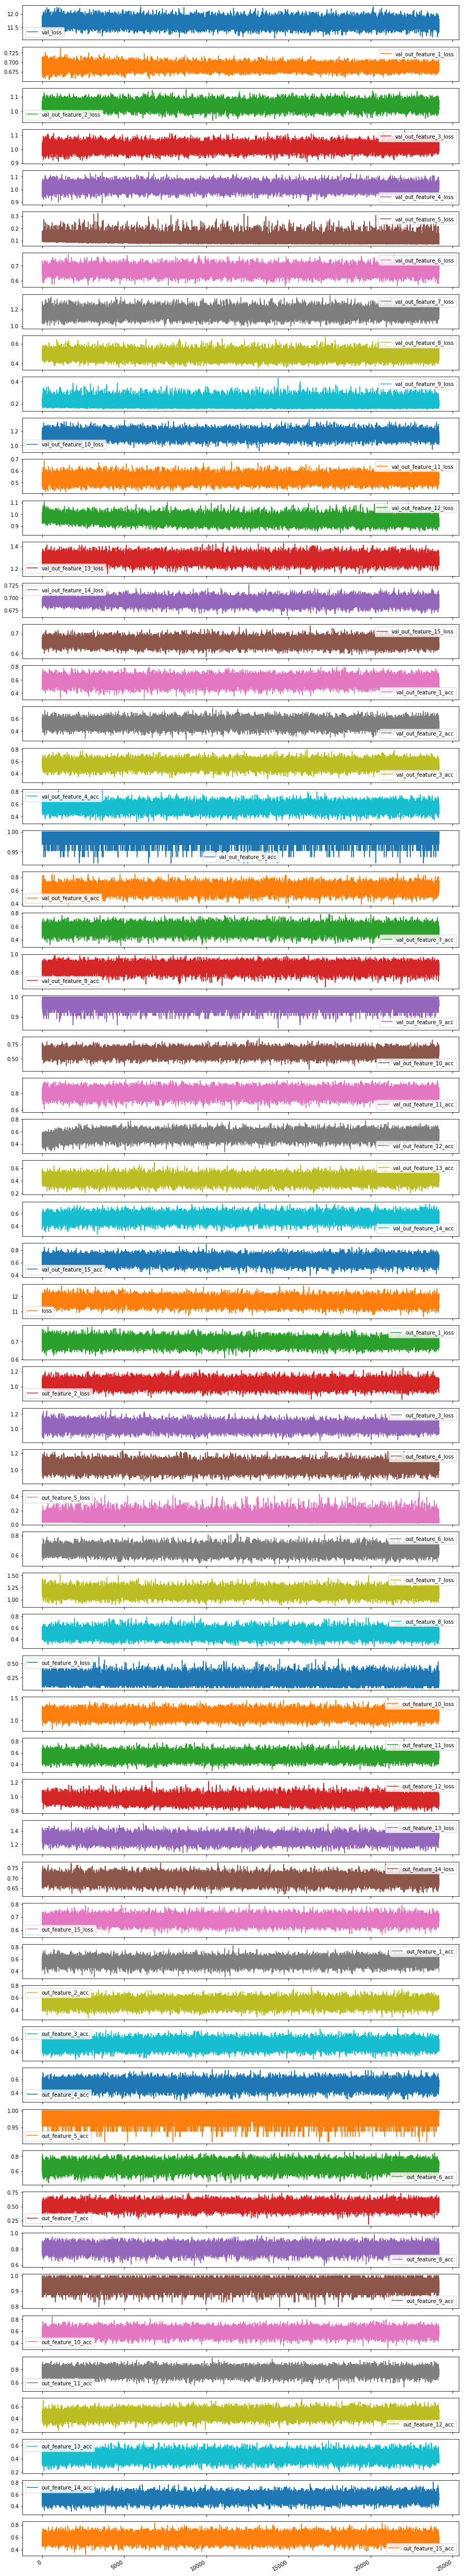

In [26]:
df_hist = pd.DataFrame(hist.history)
df_hist.plot(subplots=True, figsize=(15,100))
print(df_hist['val_loss'].min())
df_hist[df_hist['val_loss']<10.65]

In [27]:
# human_features.load_weights('human_features_weights_v2.h5')
human_features.load_weights('15_human_features_weights_seen_v1.h5')
print(np.array(o[0]).shape)
for i in range(64):
#     print(i, '\nPredicted:')
    f_probs = human_features.predict(np.expand_dims(inputs[i],0))
#     print(f_probs)
    for prob in f_probs:
#         print(prob)
        print(np.argmax(prob[0]),end=',')
#     print('\n----------')
#     print('True:')
#     for op in o:
#         print(np.argmax(op[i]),end=',')
        
    print('\n++++++++++++')

(64, 2)
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
++++++++++++
1,1,1,1,1,1,0,0,0,1,1,1,

In [32]:
# print(df_hist.columns)
for i in range(1,16):
    print('acc:',df_hist['val_out_feature_{0}_acc'.format(i)].max(),', loss:',df_hist['val_out_feature_{0}_loss'.format(i)].min())
print(np.mean([df_hist['val_out_feature_1_acc'].max(), df_hist['val_out_feature_2_acc'].max(),
       df_hist['val_out_feature_3_acc'].max(), df_hist['val_out_feature_4_acc'].max(),
       df_hist['val_out_feature_5_acc'].max(), df_hist['val_out_feature_6_acc'].max(),
       df_hist['val_out_feature_7_acc'].max(), df_hist['val_out_feature_8_acc'].max()]))
# df_hist[df_hist['val_acc']>10.2]

acc: 0.796875 , loss: 0.6552003622055054
acc: 0.765625 , loss: 0.9346984624862671
acc: 0.796875 , loss: 0.9084410071372986
acc: 0.8125 , loss: 0.8912073969841003
acc: 1.0 , loss: 0.06843385100364685
acc: 0.859375 , loss: 0.5658181309700012
acc: 0.78125 , loss: 0.9864877462387085
acc: 0.984375 , loss: 0.3510581851005554
acc: 1.0 , loss: 0.14941591024398804
acc: 0.859375 , loss: 0.9300342798233032
acc: 0.96875 , loss: 0.4200103282928467
acc: 0.78125 , loss: 0.8401095867156982
acc: 0.703125 , loss: 1.1504265069961548
acc: 0.765625 , loss: 0.663857102394104
acc: 0.890625 , loss: 0.5827913284301758
0.849609375


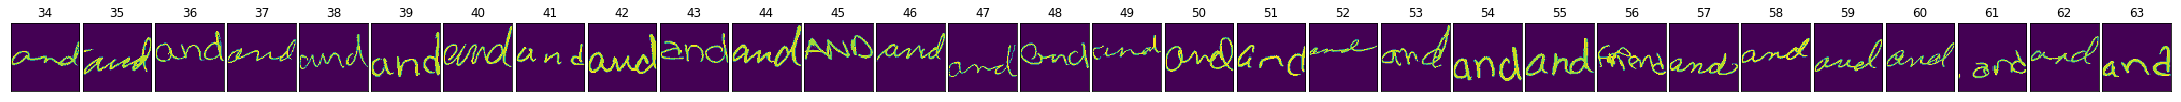

In [29]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(30):
    ax = fig.add_subplot(1, 30, i + 1, xticks=[], yticks=[])
    ax.imshow(inputs[64-30:64][i].reshape((64,64)))
    ax.set_title(i+34)

(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)
(64, 8, 8)


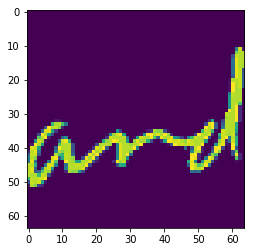

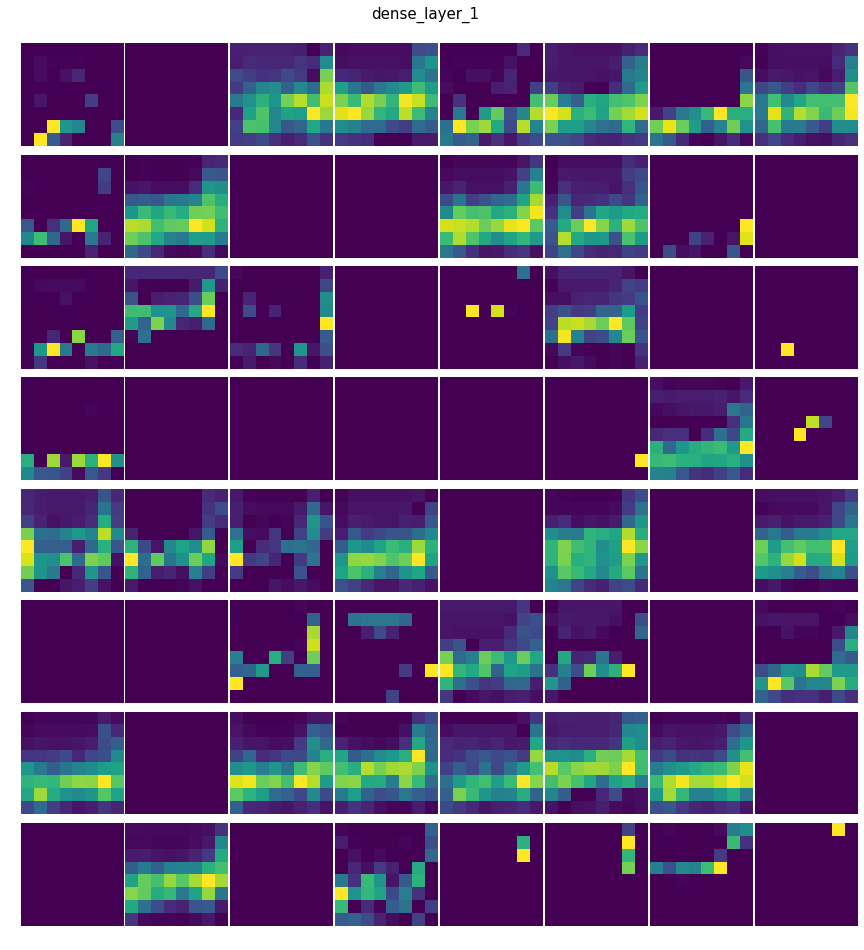

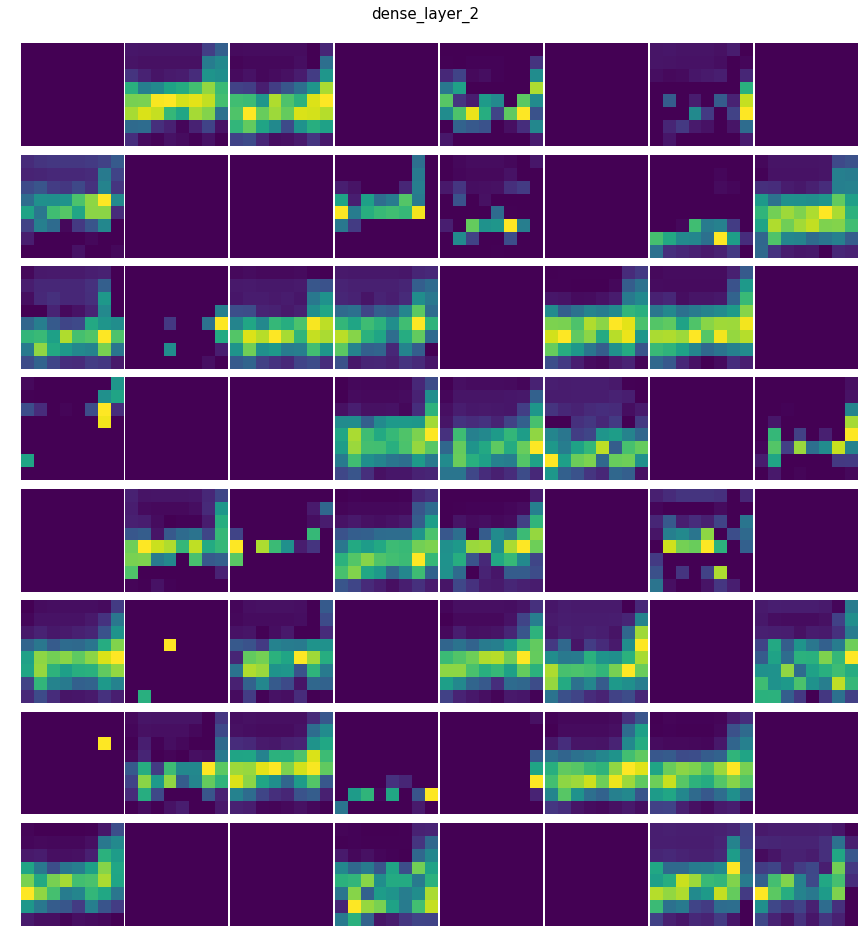

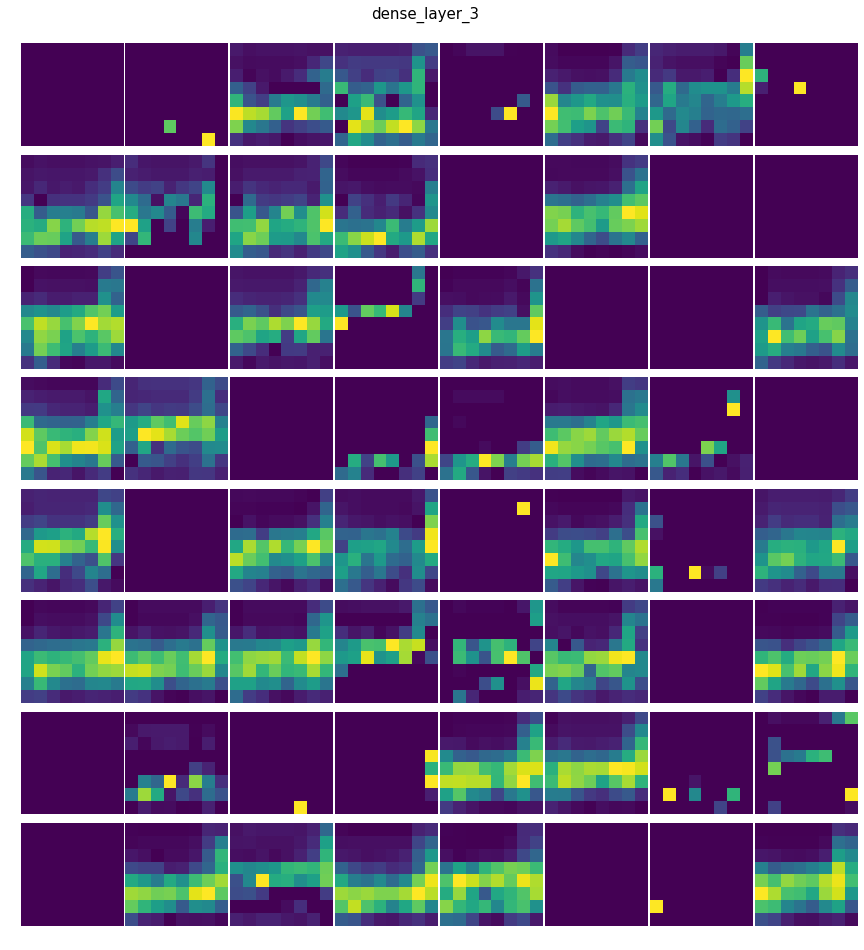

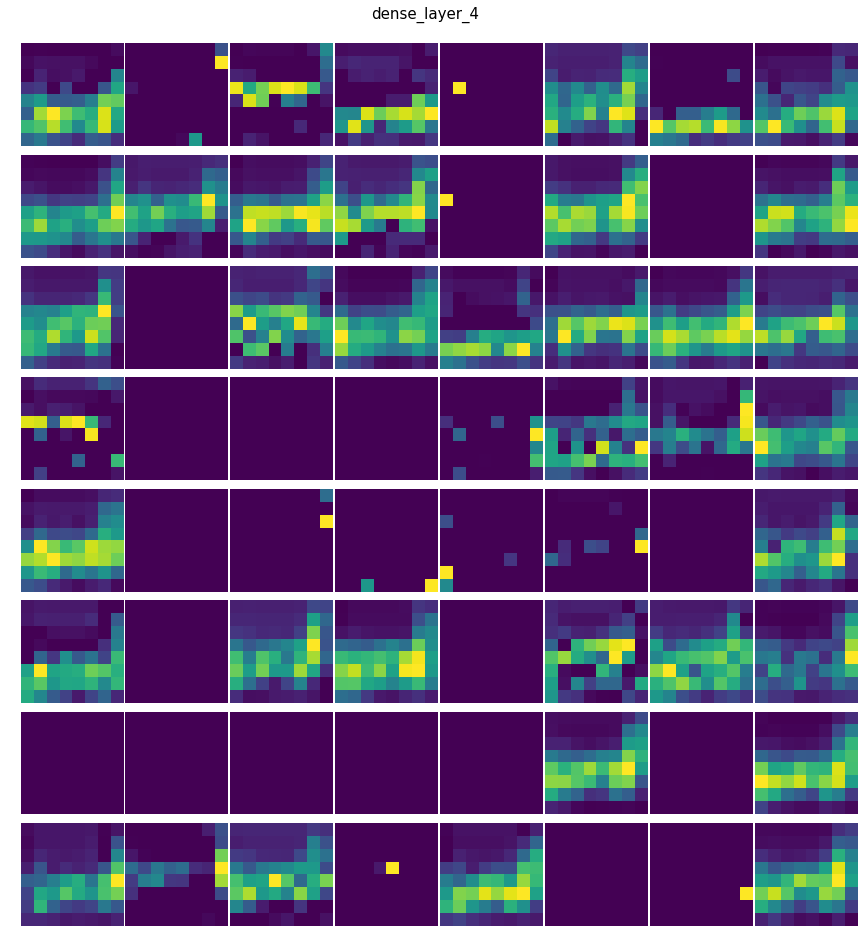

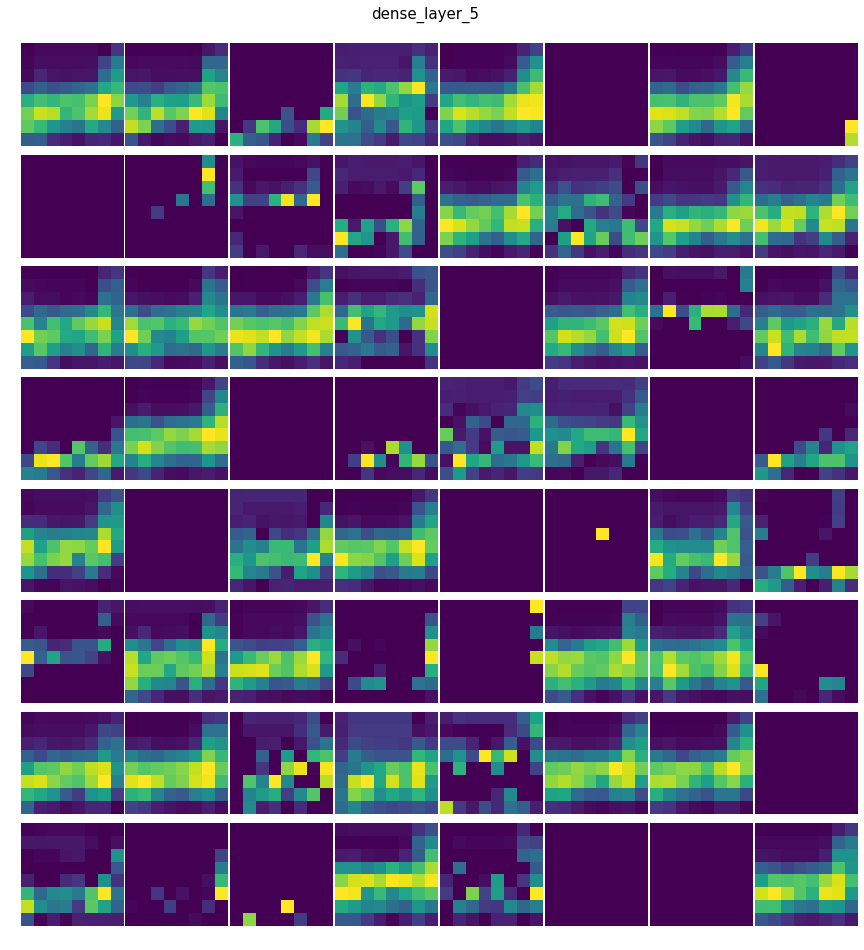

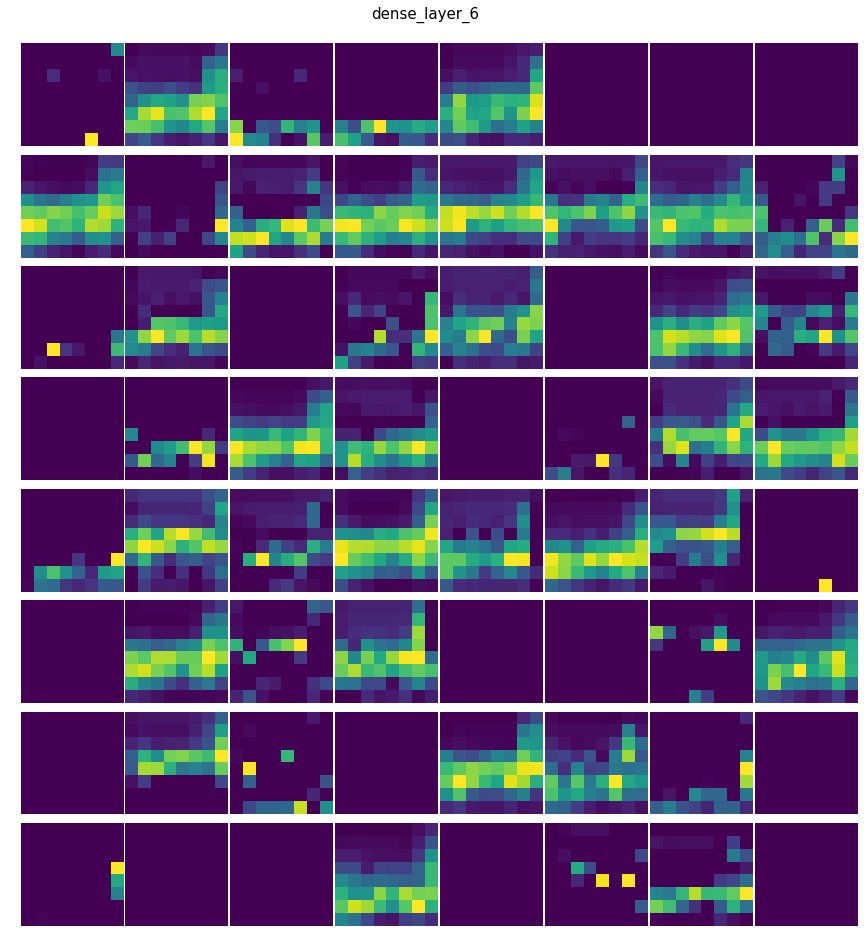

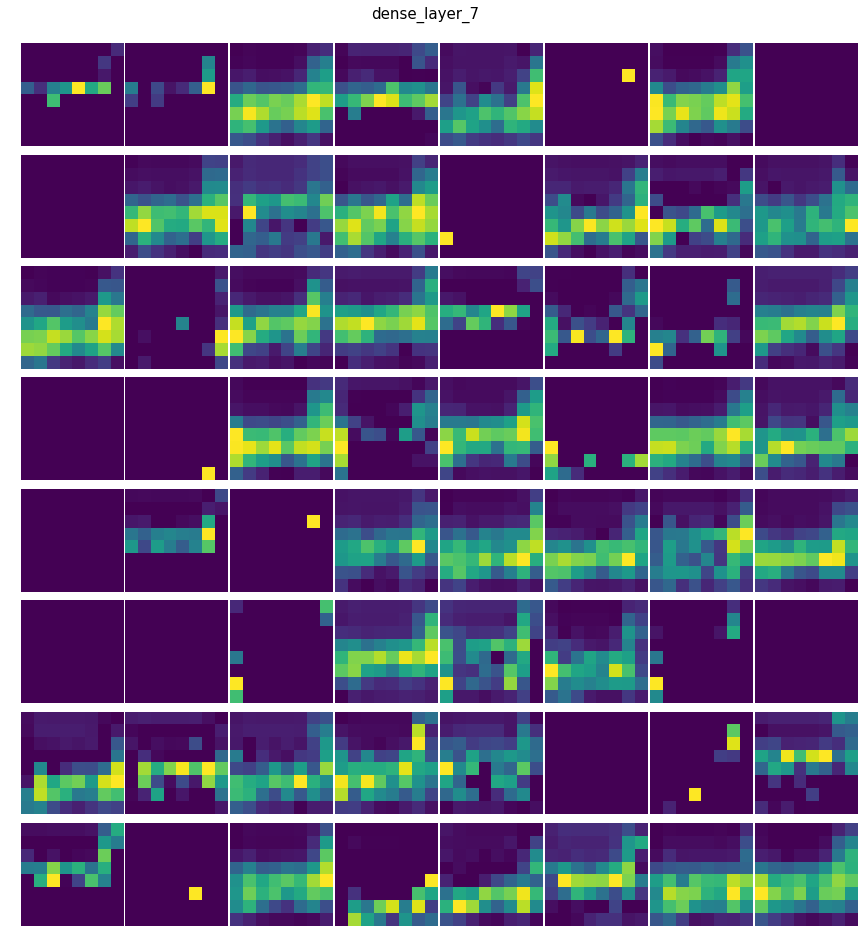

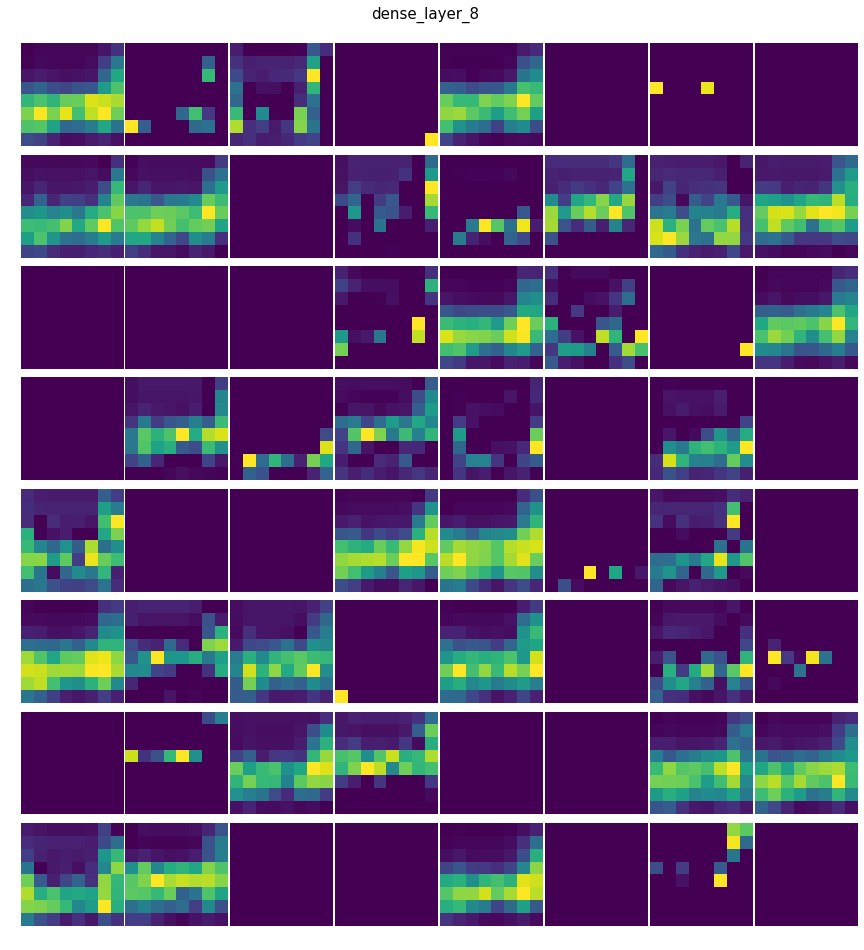

In [30]:
plt.imshow(inputs[10].reshape((64,64)))
plt.subplots_adjust(hspace = 0.1)
for i in range(1,9):
    visualize_model = Model(human_features.input, human_features.get_layer('dense_layer_'+str(i)).output)
    vis_out = visualize_model.predict(np.expand_dims(inputs[10],0))[0]
    vis_out = np.rollaxis(a=vis_out, start=0, axis=2)
    f,ax = plt.subplots(8,8)
    f.subplots_adjust(hspace = .00, wspace=.02, top=0.95)
    f.set_size_inches(15,15)
    f.suptitle('dense_layer_'+str(i), fontsize=15)
#     f.subplots_adjust(hspace = 0.1)
#     plt.title('dense_layer_'+str(i))
    print(vis_out.shape)
    for r in range(8):
        for c in range (8):
            ax[r,c].imshow(vis_out[c+r*8])
            ax[r,c].axis('off')
#     break

In [31]:
csv_data.var()

pen_pressure      0.241190
letter_spacing    0.481638
size              0.475689
dimension         0.464579
is_lowercase      0.014808
is_continuous     0.222378
slantness         0.866958
tilt              0.152430
entry_stroke_a    0.053592
staff_of_a        0.862689
formation_n       0.176950
staff_of_d        0.409782
exit_stroke_d     1.054210
word_formation    0.245240
constancy         0.239313
dtype: float64